In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import cufflinks as cf
#cf.go_offline()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.feature_selection import SelectFromModel
#from sklearn.preprocessing import StandardScaler, Imputer

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2

from sklearn.feature_selection import f_classif, f_regression

from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
from sklearn import utils

from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [26]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVR, SVC

import scipy.stats as stats 

from sklearn.preprocessing import FunctionTransformer, PowerTransformer 

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import RobustScaler

import xgboost as xgb

from sklearn.model_selection import learning_curve

from sklearn.decomposition import PCA

In [150]:
data = pd.read_excel('DEA_a.xlsx')
data.head()
#'NewData.xlsx'

,Surface_temperature,Concentration,Air_temperature,Dew_point,Grip,Precipitation,Conductivity,Chemical,Snow_height,Base_temperature,Ground_temperature
0,-3.7,5.0,-2.6,-4.3,0.8,0.1,4.3,0.5,1.0,-3.2,-3.7
1,-3.7,4.8,-2.5,-4.2,0.8,0.1,4.3,0.4,1.0,-3.3,-3.7
2,-3.6,4.8,-2.5,-4.1,0.8,0.1,4.3,0.4,1.0,-3.3,-3.7
3,-3.4,4.9,-2.4,-4.0,0.8,0.1,4.4,0.5,1.0,-3.3,-3.7
4,-3.5,5.1,-2.3,-3.9,0.8,0.1,4.5,0.5,1.0,-3.3,-3.6


In [151]:
data.tail()

,Surface_temperature,Concentration,Air_temperature,Dew_point,Grip,Precipitation,Conductivity,Chemical,Snow_height,Base_temperature,Ground_temperature
3842,4.2,0.0,4.4,-2.6,0.82,0.0,0.0,0.0,0.0,4.6,5.2
3843,4.0,0.0,4.5,-2.8,0.82,0.0,0.0,0.0,0.0,4.6,5.2
3844,4.0,0.0,4.5,-2.9,0.82,0.0,0.0,0.0,0.0,4.6,5.1
3845,4.0,0.0,4.6,-3.2,0.82,0.0,0.0,0.0,0.0,4.5,5.0
3846,3.9,0.0,4.4,-3.2,0.82,0.0,0.0,0.0,0.0,4.5,5.0


In [152]:
data.shape

(3847, 11)

In [153]:
data.columns

Index(['Surface_temperature', 'Concentration', 'Air_temperature', 'Dew_point ',
       'Grip', 'Precipitation', 'Conductivity', 'Chemical', 'Snow_height',
       'Base_temperature', 'Ground_temperature'],
      dtype='object')

In [154]:
data.isnull().sum()

Surface_temperature    2
Concentration          2
Air_temperature        0
Dew_point              0
Grip                   2
Precipitation          0
Conductivity           2
Chemical               2
Snow_height            2
Base_temperature       0
Ground_temperature     2
dtype: int64

In [155]:
data.dropna(subset=['Surface_temperature', 'Concentration', 'Air_temperature', 'Dew_point ', 'Grip',
       'Precipitation', 'Conductivity', 'Chemical', 'Snow_height',
       'Base_temperature', 'Ground_temperature'], inplace=True)

In [156]:
data.shape

(3843, 11)

In [157]:
col_mask=data.isnull().any(axis=0) 
row_mask=data.isnull().any(axis=1)
data.loc[row_mask,col_mask]

""


In [158]:
data.describe()

,Surface_temperature,Concentration,Air_temperature,Dew_point,Grip,Precipitation,Conductivity,Chemical,Snow_height,Base_temperature,Ground_temperature
count,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000
mean,0.609914,25.392584,0.823263,-2.392766,0.749883,0.448842,1.944523,0.238434,2.549310,-0.039136,0.598959
std,4.621628,77.335089,4.960772,4.860403,0.148877,0.732481,1.757556,0.900014,5.327128,2.076339,3.755212
min,-14.600000,0.000000,-20.000000,-21.900000,0.110000,0.000000,0.000000,0.000000,0.000000,-4.600000,-11.300000
25%,-1.500000,0.000000,-0.900000,-4.200000,0.780000,0.000000,0.000000,0.000000,0.000000,-1.500000,-1.200000
50%,1.100000,1.500000,1.900000,-0.900000,0.810000,0.000000,1.900000,0.100000,0.000000,-0.100000,0.800000
75%,3.300000,7.300000,3.800000,1.200000,0.820000,0.600000,3.500000,0.200000,2.000000,1.400000,3.000000
max,14.200000,352.700000,10.400000,3.700000,0.820000,5.800000,8.600000,16.900000,47.000000,4.600000,10.300000


<AxesSubplot:xlabel='Conductivity', ylabel='Density'>

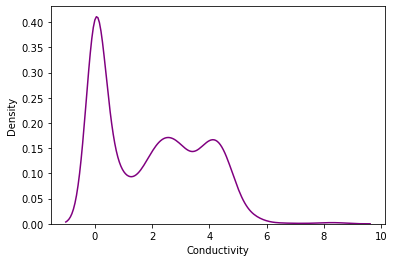

In [188]:
sns.kdeplot(data['Conductivity'],color='purple')

<AxesSubplot:xlabel='Surface_temperature', ylabel='Density'>

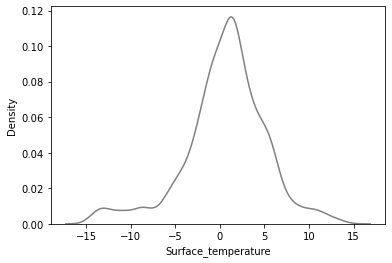

In [191]:
sns.kdeplot(data['Surface_temperature'],color='gray')

<AxesSubplot:xlabel='Base_temperature', ylabel='Density'>

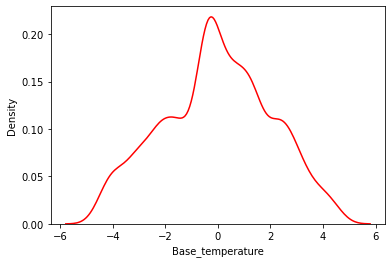

In [192]:
sns.kdeplot(data['Base_temperature'],color='red')

<AxesSubplot:xlabel='Grip', ylabel='Density'>

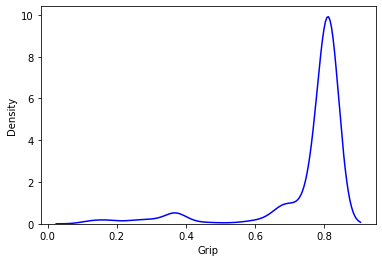

In [193]:
sns.kdeplot(data['Grip'],color='blue')

<AxesSubplot:xlabel='Chemical', ylabel='Density'>

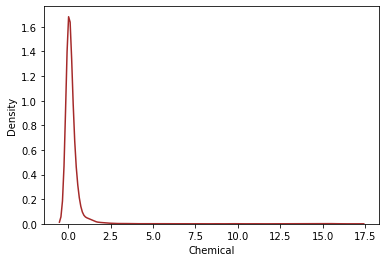

In [194]:
sns.kdeplot(data['Chemical'],color='brown')

<AxesSubplot:xlabel='Concentration', ylabel='Density'>

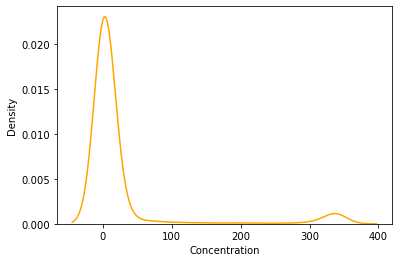

In [196]:
sns.kdeplot(data['Concentration'],color='orange')

<AxesSubplot:xlabel='Snow_height', ylabel='Density'>

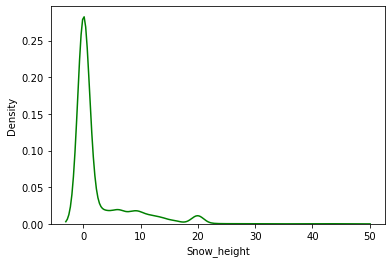

In [197]:
sns.kdeplot(data['Snow_height'],color='green')

<AxesSubplot:xlabel='Precipitation', ylabel='Density'>

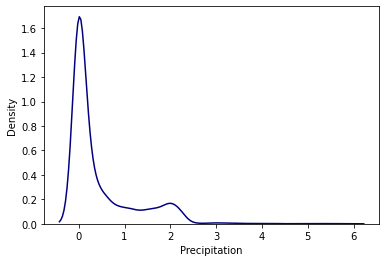

In [198]:
sns.kdeplot(data['Precipitation'],color='navy')

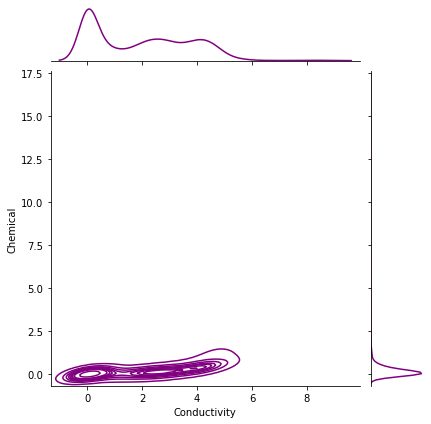

In [47]:
sns.jointplot(x='Conductivity',y='Chemical',data=data,kind='kde',color='purple')

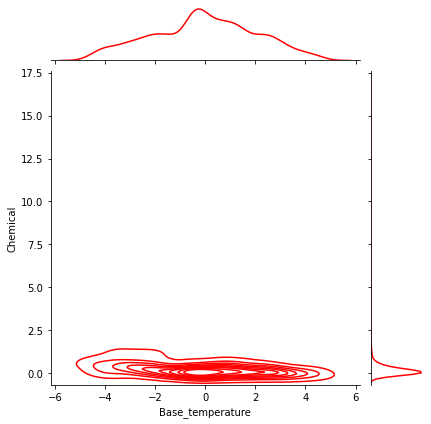

In [58]:
sns.jointplot(x='Base_temperature',y='Chemical',data=data,kind='kde',color='red')

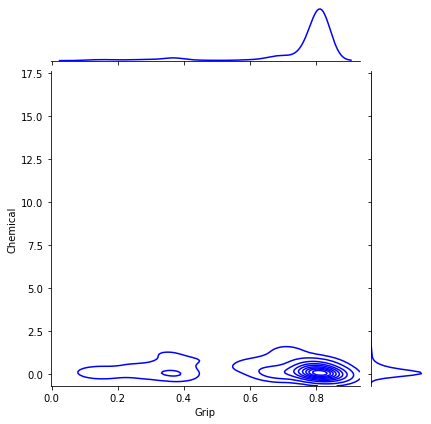

In [97]:
sns.jointplot(x='Grip',y='Chemical',data=data,kind='kde',color='blue')


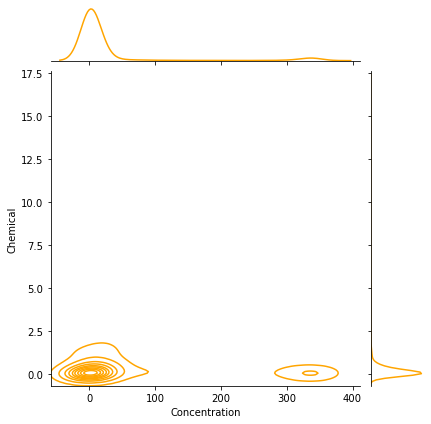

In [60]:
sns.jointplot(x='Concentration',y='Chemical',data=data,kind='kde',color='orange')

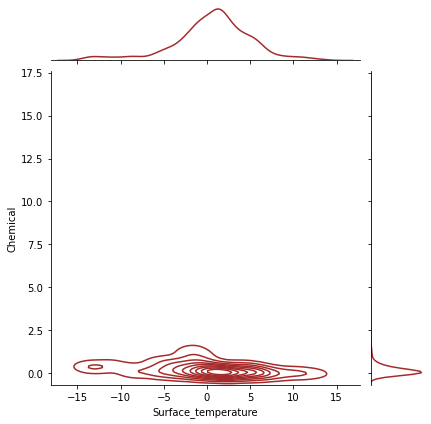

In [62]:
sns.jointplot(x='Surface_temperature',y='Chemical',data=data,kind='kde',color='brown')

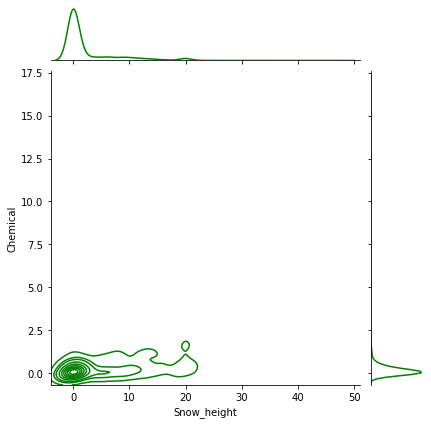

In [63]:
sns.jointplot(x='Snow_height',y='Chemical',data=data,kind='kde',color='green')

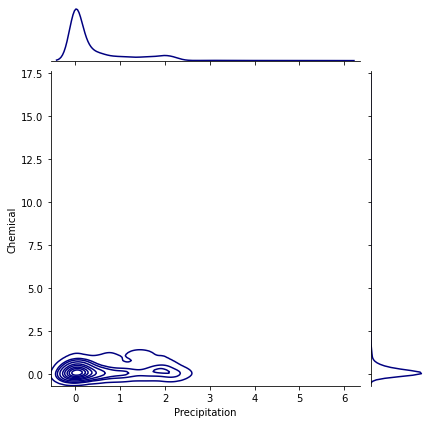

In [64]:
sns.jointplot(x='Precipitation',y='Chemical',data=data,kind='kde',color='navy')

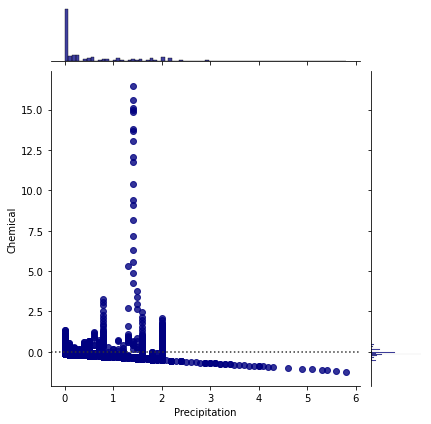

In [99]:
sns.jointplot(x='Precipitation',y='Chemical',data=data,kind='resid',color='navy')

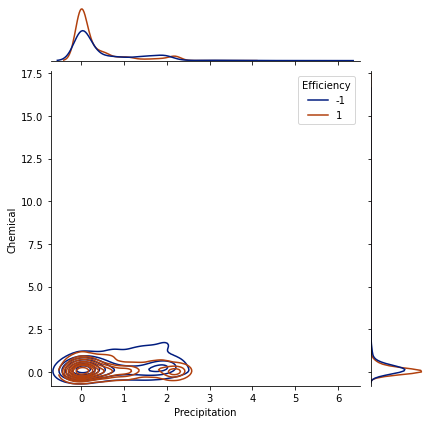

In [105]:
sns.jointplot(x='Precipitation',y='Chemical',data=data,kind='kde',color='navy', hue='Efficiency'
              ,palette='dark')

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Conductivity', ylabel='Chemical'>

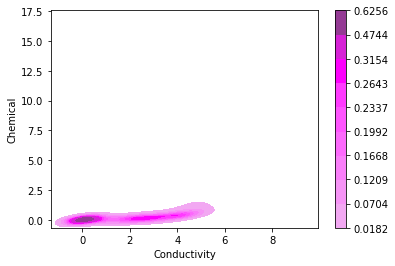

In [121]:
sns.kdeplot(data.Conductivity,data.Chemical,n_levels=10,shade=True,
            shade_lowest=False,cbar=True,color='purple')

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Base_temperature', ylabel='Chemical'>

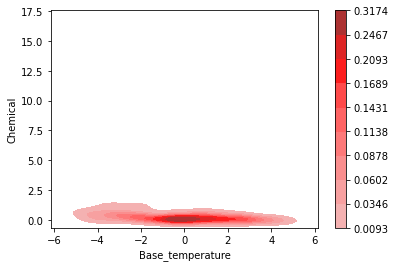

In [125]:
sns.kdeplot(data.Base_temperature,data.Chemical,n_levels=10,shade=True,
            shade_lowest=False,cbar=True,color='red')

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Grip', ylabel='Chemical'>

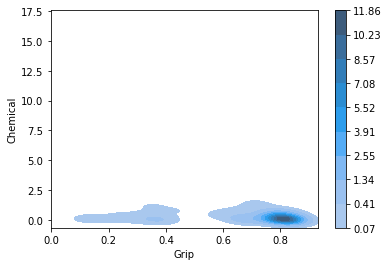

In [132]:
sns.kdeplot(data.Grip,data.Chemical,n_levels=10,shade=True,
            shade_lowest=False,cbar=True)

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Concentration', ylabel='Chemical'>

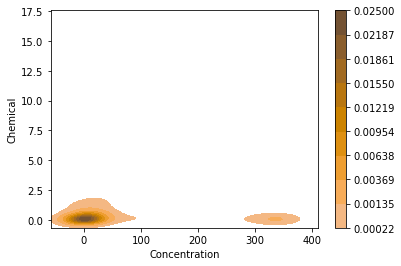

In [127]:
sns.kdeplot(data.Concentration,data.Chemical,n_levels=10,shade=True,
            shade_lowest=False,cbar=True,color='orange')

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Surface_temperature', ylabel='Chemical'>

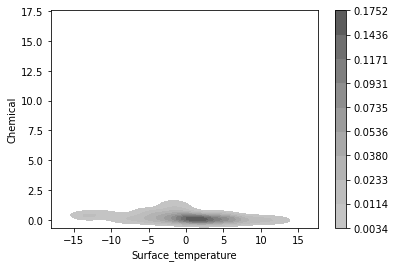

In [135]:
sns.kdeplot(data.Surface_temperature,data.Chemical,n_levels=10,shade=True,
            shade_lowest=False,cbar=True,color='black')

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Snow_height', ylabel='Chemical'>

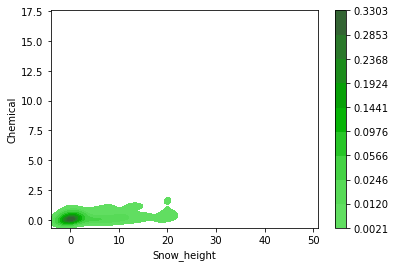

In [136]:
sns.kdeplot(data.Snow_height,data.Chemical,n_levels=10,shade=True,
            shade_lowest=False,cbar=True,color='green')

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Precipitation', ylabel='Chemical'>

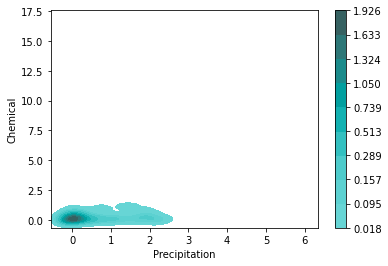

In [137]:
sns.kdeplot(data.Precipitation,data.Chemical,n_levels=10,shade=True,
            shade_lowest=False,cbar=True,color='cyan')

<AxesSubplot:xlabel='Surface_temperature', ylabel='Density'>

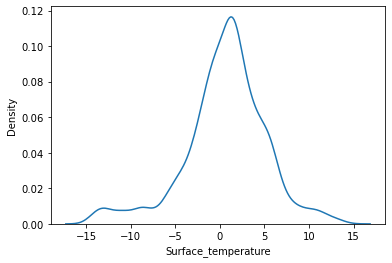

In [149]:
sns.kdeplot(data.Surface_temperature)

In [66]:
#sns.rugplot(data['Precipitation'])

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


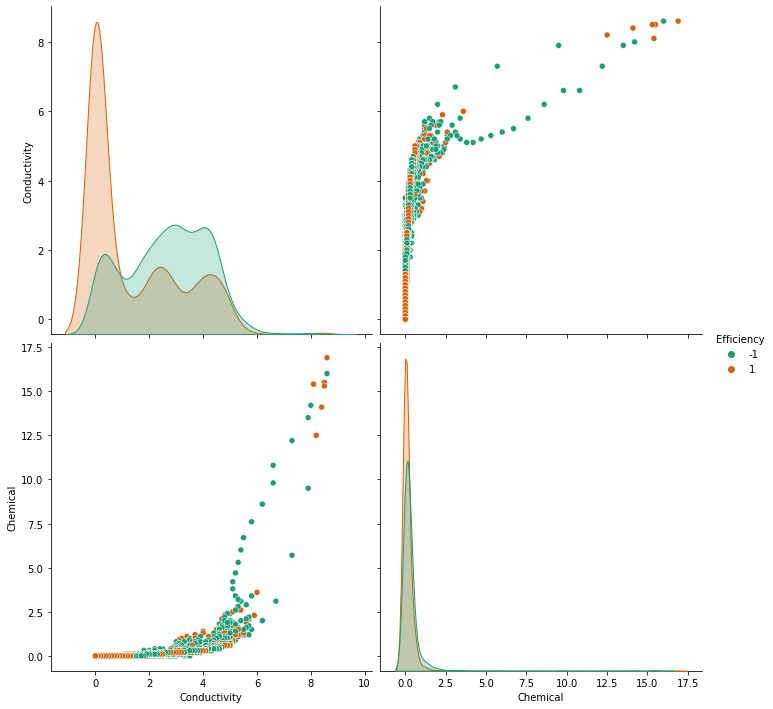

In [86]:
sns.pairplot(data[['Conductivity','Chemical','Efficiency']],hue='Efficiency',palette='Dark2',height=5,size=5)

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


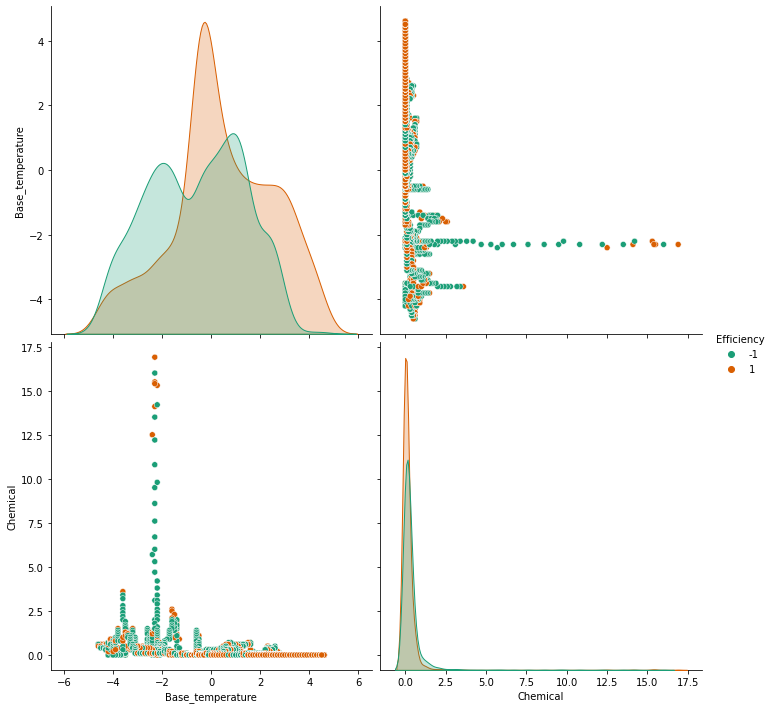

In [87]:
sns.pairplot(data[['Base_temperature','Chemical','Efficiency']],hue='Efficiency',palette='Dark2',height=5,size=5)

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


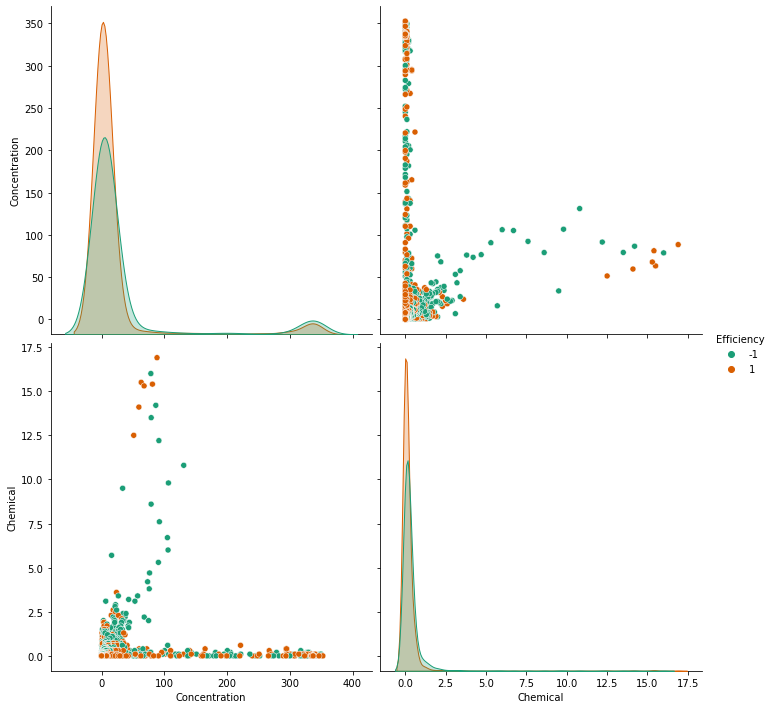

In [89]:
sns.pairplot(data[['Concentration','Chemical','Efficiency']],hue='Efficiency',palette='Dark2',height=5,size=5)

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


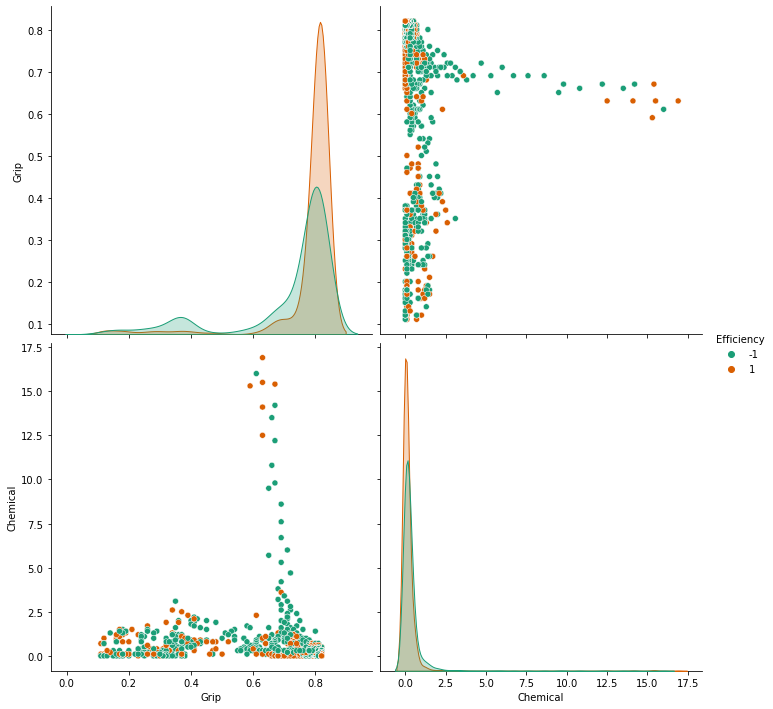

In [90]:
sns.pairplot(data[['Grip','Chemical','Efficiency']],hue='Efficiency',palette='Dark2',height=5,size=5)

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


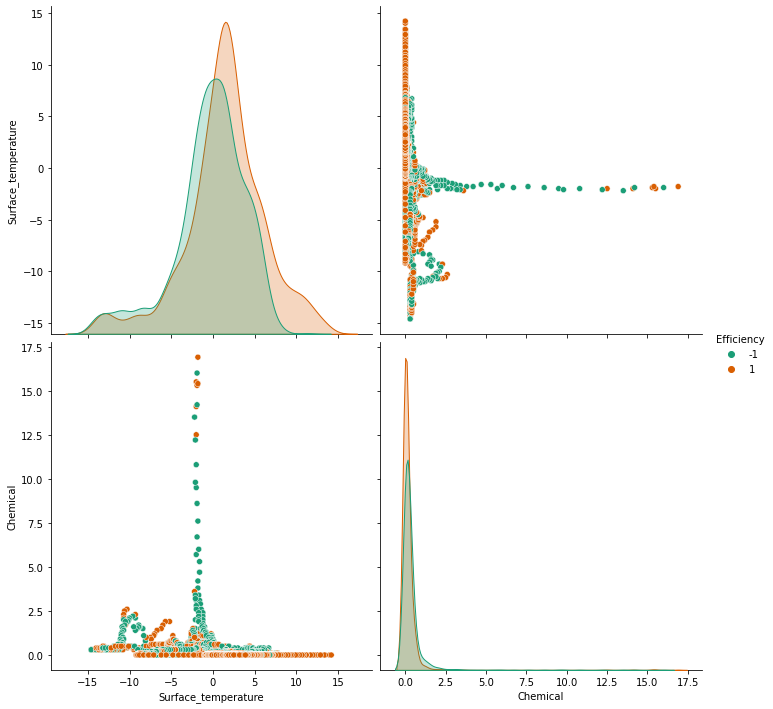

In [91]:
sns.pairplot(data[['Surface_temperature','Chemical','Efficiency']],hue='Efficiency',palette='Dark2',height=5,size=5)

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


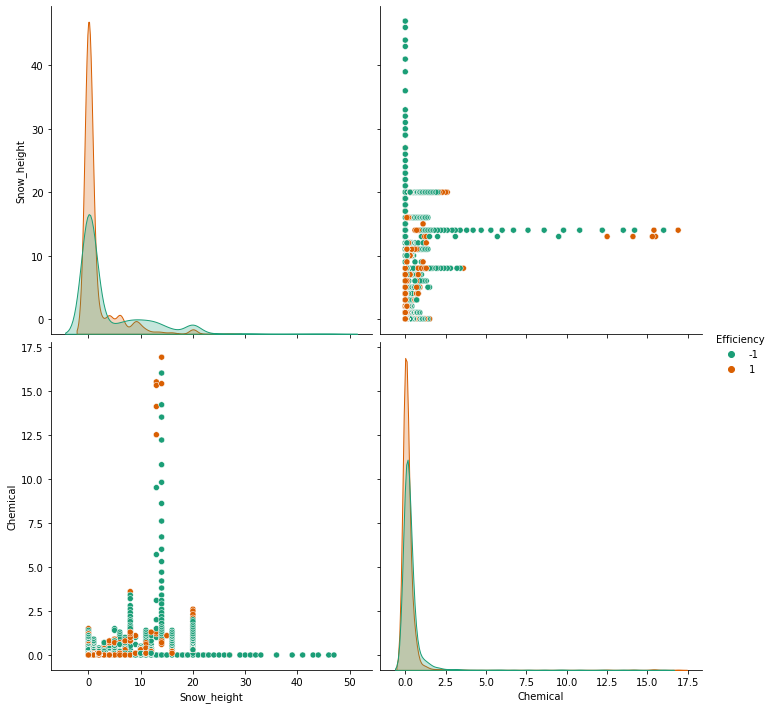

In [92]:
sns.pairplot(data[['Snow_height','Chemical','Efficiency']],hue='Efficiency',palette='Dark2',height=5,size=5)

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


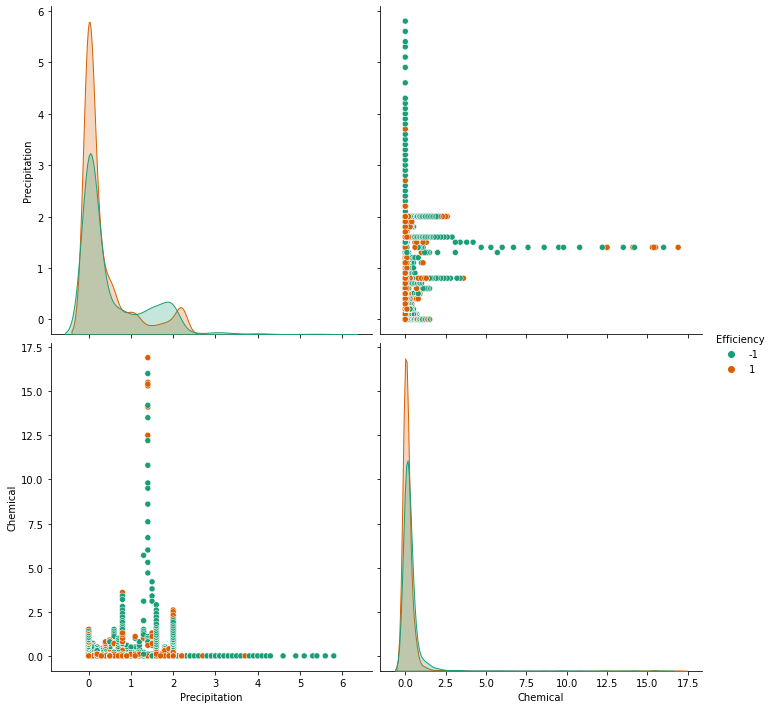

In [93]:
sns.pairplot(data[['Precipitation','Chemical','Efficiency']],hue='Efficiency',palette='Dark2',height=5,size=5)

In [12]:
scaler = MinMaxScaler(feature_range=(0.001, 1))

In [13]:
scaler.fit(data)

MinMaxScaler(feature_range=(0.001, 1))

In [14]:
data_scaled = scaler.transform(data)

In [15]:
scaler.data_max_

array([ 14.2 , 352.7 ,  10.4 ,   3.7 ,   0.82,   5.8 ,   8.6 ,  16.9 ,
        47.  ,   4.6 ,  10.3 ])

In [16]:
scaler.min_

array([ 0.5074375 ,  0.001     ,  0.65823684,  0.85561328, -0.15377465,
        0.001     ,  0.001     ,  0.001     ,  0.001     ,  0.5005    ,
        0.523625  ])

In [17]:
scaler.data_range_

array([ 28.8 , 352.7 ,  30.4 ,  25.6 ,   0.71,   5.8 ,   8.6 ,  16.9 ,
        47.  ,   9.2 ,  21.6 ])

In [18]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [19]:
np.round(data.describe(), 1)

,Surface_temp,Concentration,Air_temp,Dew_point,Grip,Precipitation_24h,Conductivity,Chemical,Snow_height,Base_temp,Ground_temp
count,3843.0,3843.0,3843.0,3843.0,3843.0,3843.0,3843.0,3843.0,3843.0,3843.0,3843.0
mean,0.6,25.4,0.8,-2.4,0.7,0.4,1.9,0.2,2.5,-0.0,0.6
std,4.6,77.3,5.0,4.9,0.1,0.7,1.8,0.9,5.3,2.1,3.8
min,-14.6,0.0,-20.0,-21.9,0.1,0.0,0.0,0.0,0.0,-4.6,-11.3
25%,-1.5,0.0,-0.9,-4.2,0.8,0.0,0.0,0.0,0.0,-1.5,-1.2
50%,1.1,1.5,1.9,-0.9,0.8,0.0,1.9,0.1,0.0,-0.1,0.8
75%,3.3,7.3,3.8,1.2,0.8,0.6,3.5,0.2,2.0,1.4,3.0
max,14.2,352.7,10.4,3.7,0.8,5.8,8.6,16.9,47.0,4.6,10.3


In [20]:
data_scaled.describe()

,Surface_temp,Concentration,Air_temp,Dew_point,Grip,Precipitation_24h,Conductivity,Chemical,Snow_height,Base_temp,Ground_temp
count,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000
mean,0.528594,0.072923,0.685291,0.762239,0.901342,0.078309,0.226881,0.015094,0.055186,0.496250,0.551327
std,0.160313,0.219047,0.163020,0.189670,0.209476,0.126164,0.204163,0.053202,0.113230,0.225463,0.173679
min,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
25%,0.455406,0.001000,0.628661,0.691715,0.943718,0.001000,0.001000,0.001000,0.001000,0.337620,0.468125
50%,0.545594,0.005249,0.720674,0.820492,0.985930,0.001000,0.221709,0.006911,0.001000,0.489641,0.560625
75%,0.621906,0.021677,0.783112,0.902441,1.000000,0.104345,0.407570,0.012822,0.043511,0.652522,0.662375
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
import statistics

In [23]:
statistics.mean(data)

TypeError: can't convert type 'str' to numerator/denominator

<AxesSubplot:>

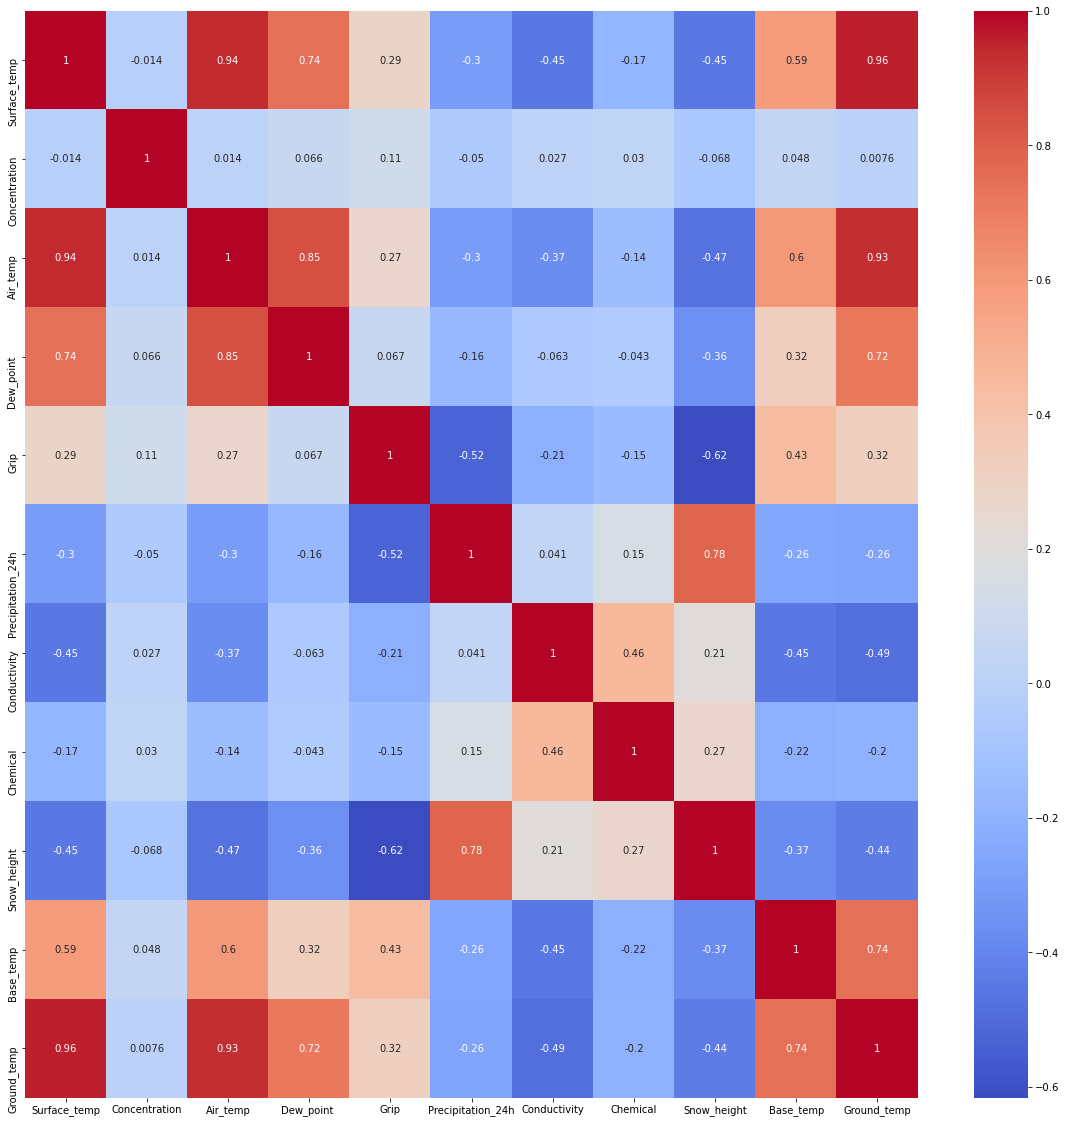

In [49]:
corrmat = data_scaled.corr()
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(corrmat,cmap ="coolwarm", annot=True)

In [50]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [51]:
corr_features = correlation(data_scaled, 0.8)
len(set(corr_features))

3

In [52]:
data_scaled.drop(labels=corr_features, axis=1, inplace=True)

In [53]:
data_scaled.columns

Index(['Surface_temp', 'Concentration', 'Grip', 'Precipitation_24h',
       'Conductivity', 'Chemical', 'Snow_height', 'Base_temp'],
      dtype='object')

In [54]:
data_scaled.shape

(3843, 8)

In [55]:
data_scaled.head()

,Surface_temp,Concentration,Grip,Precipitation_24h,Conductivity,Chemical,Snow_height,Base_temp
0,0.379094,0.015162,0.971859,0.018224,0.500500,0.030556,0.022255,0.153022
1,0.379094,0.014596,0.971859,0.018224,0.500500,0.024645,0.022255,0.142163
2,0.382562,0.014596,0.971859,0.018224,0.500500,0.024645,0.022255,0.142163
3,0.389500,0.014879,0.971859,0.018224,0.512116,0.030556,0.022255,0.142163
4,0.386031,0.015445,0.971859,0.018224,0.523733,0.030556,0.022255,0.142163


In [186]:
from openpyxl import Workbook

In [187]:
#workbook = Workbook()

In [188]:
#sheet = workbook.active

In [189]:
#sheet['A1'] = 'Surface_temp'
#sheet['B1'] = 'Concentration'
#sheet['C1'] = 'Grip'
#sheet['D1'] = 'Precipitation_24h'
#sheet['E1'] = 'Conductivity'
#sheet['F1'] = 'Chemical'
#sheet['G1'] = 'Base_temp'

In [190]:
#workbook.save(filename='DEA.xlsx')

In [191]:
writer = pd.ExcelWriter('example_C.xlsx', engine='xlsxwriter')

In [192]:
data_scaled.to_excel(writer, 'Sheet1')

In [193]:
writer.save()

In [56]:
from scipy.optimize import fmin_slsqp

In [57]:
class DEA(object):

    def __init__(self, inputs, outputs):

        # supplied data
        self.inputs = inputs
        self.outputs = outputs

        # parameters
        self.n = inputs.shape[0]
        self.m = inputs.shape[1]
        self.r = outputs.shape[1]

        # iterators
        self.unit_ = range(self.n)
        self.input_ = range(self.m)
        self.output_ = range(self.r)

        # result arrays
        self.output_w = np.zeros((self.r, 1), dtype=np.float)  # output weights
        self.input_w = np.zeros((self.m, 1), dtype=np.float)  # input weights
        self.lambdas = np.zeros((self.n, 1), dtype=np.float)  # unit efficiencies
        self.efficiency = np.zeros_like(self.lambdas)  # thetas
    def __efficiency(self, unit):
        # compute efficiency
        denominator = np.dot(self.inputs, self.input_w)
        numerator = np.dot(self.outputs, self.output_w)

        return (numerator/denominator)[unit]
    def __target(self, x, unit):

        in_w, out_w, lambdas = x[:self.m], x[self.m:(self.m+self.r)], x[(self.m+self.r):]  # unroll the weights
        denominator = np.dot(self.inputs[unit], in_w)
        numerator = np.dot(self.outputs[unit], out_w)

        return numerator/denominator

    def __constraints(self, x, unit):

        in_w, out_w, lambdas = x[:self.m], x[self.m:(self.m+self.r)], x[(self.m+self.r):]  # unroll the weights
        constr = []  # init the constraint array

        # for each input, lambdas with inputs
        for input in self.input_:
            t = self.__target(x, unit)
            lhs = np.dot(self.inputs[:, input], lambdas)
            cons = t*self.inputs[unit, input] - lhs
            constr.append(cons)

        # for each output, lambdas with outputs
        for output in self.output_:
            lhs = np.dot(self.outputs[:, output], lambdas)
            cons = lhs - self.outputs[unit, output]
            constr.append(cons)

        # for each unit
        for u in self.unit_:
            constr.append(lambdas[u])

        return np.array(constr)

    def __optimize(self):

        d0 = self.m + self.r + self.n
        # iterate over units
        for unit in self.unit_:
            # weights
            x0 = np.random.rand(d0) - 0.5
            x0 = fmin_slsqp(self.__target, x0, f_ieqcons=self.__constraints, args=(unit,))
            # unroll weights
            self.input_w, self.output_w, self.lambdas = x0[:self.m], x0[self.m:(self.m+self.r)], x0[(self.m+self.r):]
            self.efficiency[unit] = self.__efficiency(unit)

    def fit(self):
        self.__optimize()  # optimize
        return self.efficiency

In [61]:
   if __name__ == "__main__":
    X = np.array([
[0.379,0.014,0.972,0.017,0.500,0.021,0.152],
[0.378,0.014,0.972,0.017,0.500,0.021,0.141],
[0.382,0.014,0.972,0.017,0.500,0.021,0.141],
[0.389,0.014,0.972,0.017,0.512,0.021,0.141],
[0.385,0.014,0.972,0.017,0.523,0.021,0.141],
[0.385,0.014,0.972,0.017,0.512,0.021,0.141],
[0.385,0.013,0.972,0.017,0.512,0.021,0.152],
[0.382,0.013,0.972,0.017,0.512,0.021,0.152],
[0.382,0.012,0.972,0.017,0.512,0.021,0.141],
[0.385,0.013,0.972,0.017,0.512,0.021,0.141],
[0.382,0.012,0.972,0.017,0.523,0.021,0.152],
[0.385,0.012,0.972,0.017,0.512,0.021,0.152],
[0.385,0.012,0.972,0.017,0.512,0.021,0.152],
[0.385,0.012,0.972,0.017,0.512,0.021,0.152],
[0.389,0.012,0.972,0.017,0.512,0.021,0.152],
[0.389,0.013,0.972,0.017,0.523,0.021,0.152],
[0.389,0.013,0.972,0.017,0.512,0.021,0.152],
[0.392,0.013,0.972,0.017,0.512,0.021,0.152],
[0.396,0.013,0.972,0.017,0.523,0.021,0.152],
[0.396,0.013,0.972,0.017,0.512,0.021,0.163],
[0.396,0.012,0.958,0.017,0.512,0.021,0.152],
[0.392,0.013,0.958,0.017,0.523,0.021,0.152],
[0.392,0.013,0.958,0.017,0.535,0.021,0.163],
[0.385,0.014,0.958,0.017,0.535,0.021,0.163],
[0.385,0.014,0.958,0.017,0.535,0.021,0.163],
[0.385,0.016,0.972,0.017,0.535,0.021,0.152],
[0.382,0.016,0.958,0.017,0.535,0.021,0.163],
[0.385,0.016,0.972,0.017,0.535,0.021,0.163],
[0.389,0.016,0.958,0.017,0.535,0.021,0.163],
[0.389,0.016,0.958,0.017,0.535,0.021,0.163],
[0.392,0.015,0.958,0.017,0.535,0.021,0.163],
[0.389,0.016,0.972,0.017,0.535,0.021,0.163],
[0.396,0.016,0.972,0.017,0.535,0.01 ,0.63 ],
[0.399,0.017,0.972,0.017,0.547,0.021,0.163],
[0.399,0.017,0.958,0.017,0.535,0.021,0.163],
[0.403,0.016,0.972,0.017,0.547,0.021,0.163],
[0.396,0.017,0.958,0.001,0.547,0.001,0.163],
[0.406,0.018,0.972,0.001,0.547,0.001,0.174],
[0.399,0.018,0.972,0.001,0.547,0.001,0.163],
[0.403,0.017,0.972,0.001,0.547,0.001,0.163],
[0.410,0.017,0.972,0.001,0.535,0.001,0.174],
[0.406,0.017,0.972,0.001,0.535,0.001,0.163],
[0.406,0.016,0.972,0.001,0.523,0.001,0.174],
[0.406,0.014,0.972,0.001,0.523,0.001,0.174],
[0.410,0.020,0.972,0.001,0.523,0.001,0.174],
[0.413,0.025,0.972,0.001,0.523,0.001,0.163],
[0.417,0.027,0.972,0.001,0.523,0.001,0.163],
[0.420,0.027,0.972,0.001,0.512,0.001,0.174],
[0.427,0.025,0.972,0.001,0.512,0.001,0.174],
[0.431,0.025,0.972,0.001,0.512,0.001,0.185],
[0.438,0.026,0.972,0.001,0.512,0.001,0.174],
[0.438,0.026,0.972,0.001,0.512,0.001,0.174],
[0.438,0.026,0.972,0.001,0.512,0.001,0.174],
[0.441,0.024,0.972,0.001,0.512,0.001,0.174],
[0.448,0.024,0.972,0.001,0.512,0.001,0.174],
[0.448,0.025,0.972,0.001,0.512,0.001,0.185],
[0.455,0.023,0.972,0.001,0.512,0.001,0.185],
[0.451,0.023,0.972,0.001,0.512,0.001,0.185],
[0.458,0.023,0.972,0.001,0.512,0.001,0.174],
[0.462,0.021,0.972,0.001,0.512,0.001,0.185],
[0.462,0.021,0.972,0.001,0.512,0.001,0.185],
[0.469,0.022,0.972,0.001,0.512,0.001,0.185],
[0.465,0.022,0.972,0.001,0.512,0.001,0.185],
[0.476,0.024,0.972,0.001,0.512,0.001,0.174],
[0.472,0.025,0.972,0.001,0.512,0.001,0.185],
[0.476,0.025,0.972,0.001,0.512,0.001,0.185],
[0.483,0.026,0.972,0.001,0.512,0.001,0.185],
[0.483,0.027,0.972,0.001,0.512,0.001,0.185],
[0.479,0.028,0.972,0.001,0.523,0.001,0.185],
[0.483,0.028,0.972,0.001,0.523,0.001,0.185],
[0.483,0.028,0.972,0.001,0.523,0.001,0.185],
[0.479,0.027,0.972,0.001,0.523,0.001,0.185],
[0.479,0.028,0.972,0.001,0.523,0.001,0.185],
[0.479,0.028,0.972,0.001,0.512,0.001,0.185],
[0.483,0.025,0.972,0.001,0.512,0.001,0.196],
[0.486,0.025,0.972,0.001,0.523,0.001,0.196],
[0.483,0.027,0.972,0.001,0.512,0.001,0.196],
[0.479,0.025,0.958,0.001,0.512,0.001,0.196],
[0.465,0.023,0.958,0.001,0.500,0.001,0.207],
[0.458,0.022,0.944,0.000,0.500,0.001,0.196],
[0.465,0.020,0.944,0.017,0.512,0.001,0.196],
[0.469,0.012,0.803,0.034,0.488,0.021,0.196],
[0.469,0.011,0.423,0.052,0.465,0.043,0.207],
[0.469,0.008,0.366,0.052,0.442,0.064,0.196],
[0.469,0.007,0.254,0.069,0.453,0.064,0.196],
[0.469,0.006,0.296,0.069,0.465,0.064,0.207],
[0.465,0.004,0.225,0.069,0.465,0.064,0.207],
[0.462,0.004,0.169,0.069,0.453,0.085,0.196],
[0.458,0.003,0.183,0.069,0.477,0.085,0.207],
[0.458,0.003,0.239,0.069,0.453,0.085,0.207],
[0.455,0.004,0.282,0.069,0.430,0.085,0.207],
[0.451,0.006,0.324,0.069,0.430,0.085,0.207],
[0.444,0.007,0.324,0.086,0.407,0.085,0.217],
[0.438,0.008,0.310,0.086,0.384,0.085,0.217],
[0.438,0.007,0.282,0.086,0.430,0.085,0.207],
[0.434,0.004,0.183,0.086,0.465,0.085,0.207],


        
])
    
    y = np.array([
       [0.030],
[0.024],
[0.024],
[0.030],
[0.030],
[0.030],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030], 
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.030],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.018],
[0.018],
[0.018],
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)      

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000002739693
            Iterations: 13
            Function evaluations: 1272
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8146831532245166
            Iterations: 9
            Function evaluations: 950
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8146829937843487
            Iterations: 12
            Function evaluations: 1169
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9999999999355812
            Iterations: 12
            Function evaluations: 1263
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000057978415
            Iterations: 10
            Functio

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000072151202715
            Iterations: 8
            Function evaluations: 862
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000017010202023
            Iterations: 10
            Function evaluations: 1075
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000001284480934
            Iterations: 8
            Function evaluations: 849
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9999997069629859
            Iterations: 9
            Function evaluations: 949
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5.560554531894734
            Iterations: 9
            Function evaluati

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0484272714053164
            Iterations: 5
            Function evaluations: 541
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8199095923458533
            Iterations: 13
            Function evaluations: 1377
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000058624691
            Iterations: 8
            Function evaluations: 843
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9774194921406005
            Iterations: 10
            Function evaluations: 1053
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9772677298855725
            Iterations: 11
            Function ev

In [66]:
   if __name__ == "__main__":
    X = np.array([
[0.431,0.004,0.169,0.086,0.500,0.106,0.217],
[0.431,0.003,0.197,0.086,0.512,0.106,0.217],
[0.413,0.006,0.310,0.086,0.558,0.106,0.217],
[0.420,0.011,0.901,0.086,0.581,0.106,0.217],
[0.420,0.021,0.930,0.086,0.605,0.106,0.217],
[0.424,0.027,0.944,0.086,0.593,0.106,0.217],
[0.427,0.056,0.915,0.103,0.593,0.106,0.217],
[0.427,0.058,0.972,0.103,0.570,0.106,0.217],
[0.431,0.046,0.817,0.103,0.547,0.128,0.217],
[0.431,0.037,0.775,0.103,0.535,0.128,0.217],
[0.431,0.029,0.352,0.103,0.535,0.128,0.228],
[0.431,0.020,0.549,0.121,0.523,0.128,0.228],
[0.427,0.021,0.479,0.121,0.512,0.128,0.228],
[0.424,0.020,0.408,0.121,0.500,0.149,0.228],
[0.424,0.017,0.437,0.121,0.477,0.149,0.228],
[0.424,0.012,0.451,0.121,0.465,0.149,0.239],
[0.424,0.010,0.380,0.138,0.465,0.149,0.228],
[0.427,0.009,0.338,0.138,0.453,0.170,0.228],
[0.420,0.009,0.338,0.155,0.430,0.191,0.228],
[0.420,0.007,0.366,0.172,0.419,0.213,0.228],
[0.424,0.006,0.352,0.190,0.407,0.234,0.239],
[0.424,0.005,0.366,0.190,0.407,0.234,0.239],
[0.424,0.005,0.366,0.207,0.384,0.234,0.228],
[0.420,0.005,0.338,0.207,0.372,0.255,0.239],
[0.413,0.005,0.366,0.207,0.372,0.255,0.239],
[0.410,0.003,0.324,0.207,0.477,0.255,0.239],
[0.413,0.002,0.324,0.207,0.558,0.255,0.239],
[0.417,0.002,0.352,0.224,0.616,0.255,0.239],
[0.417,0.002,0.324,0.224,0.640,0.277,0.239],
[0.420,0.002,0.352,0.224,0.640,0.277,0.239],
[0.424,0.003,0.324,0.224,0.640,0.277,0.239],
[0.424,0.004,0.324,0.224,0.640,0.277,0.239],
[0.427,0.005,0.338,0.224,0.651,0.277,0.250],
[0.427,0.006,0.352,0.224,0.663,0.277,0.239],
[0.427,0.006,0.366,0.224,0.663,0.277,0.239],
[0.431,0.004,0.366,0.224,0.628,0.277,0.239],
[0.431,0.003,0.338,0.224,0.616,0.277,0.239],
[0.431,0.004,0.296,0.224,0.581,0.277,0.239],
[0.431,0.005,0.169,0.224,0.616,0.277,0.239],
[0.431,0.002,0.113,0.224,0.640,0.277,0.250],
[0.434,0.004,0.099,0.224,0.674,0.277,0.250],
[0.434,0.009,0.352,0.224,0.721,0.277,0.250],
[0.438,0.019,0.338,0.224,0.779,0.277,0.250],
[0.438,0.045,0.761,0.224,0.849,0.277,0.239],
[0.438,0.095,0.761,0.241,0.919,0.277,0.250],
[0.438,0.145,0.732,0.241,0.953,0.277,0.239],
[0.438,0.169,0.732,0.241,0.977,0.277,0.250],
[0.438,0.179,0.732,0.241,0.988,0.277,0.250],
[0.441,0.192,0.676,0.241,0.988,0.277,0.261],
[0.441,0.223,0.704,0.241,1.000,0.298,0.250],
[0.444,0.251,0.732,0.241,1.000,0.298,0.250],
[0.444,0.230,0.789,0.241,0.942,0.298,0.250],
[0.441,0.245,0.789,0.241,0.930,0.298,0.261],
[0.431,0.224,0.775,0.241,0.919,0.298,0.250],
[0.434,0.259,0.789,0.241,0.849,0.298,0.250],
[0.438,0.371,0.775,0.241,0.767,0.298,0.250],
[0.434,0.302,0.789,0.241,0.767,0.298,0.261],
[0.441,0.224,0.817,0.241,0.721,0.298,0.250],
[0.444,0.261,0.817,0.241,0.674,0.298,0.250],
[0.441,0.298,0.817,0.241,0.640,0.298,0.250],
[0.448,0.301,0.845,0.241,0.628,0.298,0.250],
[0.451,0.257,0.817,0.241,0.616,0.298,0.250],
[0.451,0.217,0.859,0.241,0.605,0.298,0.250],
[0.444,0.208,0.817,0.259,0.593,0.298,0.261],
[0.444,0.215,0.803,0.259,0.593,0.298,0.261],
[0.448,0.163,0.831,0.259,0.605,0.298,0.261],
[0.451,0.151,0.845,0.259,0.628,0.298,0.261],
[0.455,0.063,0.817,0.276,0.651,0.298,0.261],
[0.458,0.067,0.859,0.276,0.616,0.298,0.261],
[0.465,0.097,0.845,0.276,0.581,0.298,0.261],
[0.465,0.106,0.845,0.276,0.558,0.298,0.261],
[0.465,0.100,0.901,0.276,0.547,0.298,0.261],
[0.465,0.090,0.845,0.276,0.535,0.298,0.250],
[0.472,0.075,0.859,0.276,0.535,0.298,0.261],
[0.469,0.073,0.845,0.276,0.535,0.298,0.250],
[0.469,0.069,0.859,0.276,0.535,0.298,0.261],
[0.469,0.066,0.845,0.276,0.523,0.298,0.261],
[0.472,0.071,0.831,0.276,0.512,0.298,0.261],
[0.472,0.094,0.887,0.276,0.512,0.298,0.261],
[0.476,0.091,0.831,0.276,0.523,0.298,0.261],
[0.476,0.067,0.845,0.276,0.523,0.298,0.261],
[0.469,0.092,0.831,0.276,0.523,0.298,0.261],
[0.472,0.097,0.901,0.276,0.523,0.298,0.261],
[0.465,0.082,0.873,0.001,0.512,0.001,0.261],
[0.465,0.041,0.845,0.001,0.512,0.001,0.261],
[0.462,0.025,0.859,0.001,0.512,0.001,0.272],
[0.465,0.024,0.859,0.001,0.500,0.001,0.261],
[0.465,0.031,0.873,0.001,0.523,0.001,0.261],
[0.465,0.036,0.873,0.001,0.523,0.001,0.261],
[0.465,0.028,0.915,0.001,0.500,0.001,0.261],
[0.469,0.024,0.915,0.001,0.488,0.001,0.272],
[0.469,0.025,0.915,0.001,0.488,0.001,0.272],
[0.469,0.023,0.915,0.001,0.465,0.001,0.261],
[0.469,0.020,0.930,0.001,0.465,0.001,0.272],
[0.476,0.020,0.901,0.001,0.453,0.001,0.272],

        
])
    
    y = np.array([
[0.024],
[0.024],
[0.030],
[0.041],
[0.047],
[0.053],
[0.053],
[0.089],
[0.083],
[0.077],
[0.071],
[0.065],
[0.059],
[0.053],
[0.053],
[0.047],
[0.041],
[0.041],
[0.036],
[0.036],
[0.030],
[0.030],
[0.024],
[0.024],
[0.024],
[0.024],
[0.036],
[0.047],
[0.065],
[0.077],
[0.071],
[0.071],
[0.071],
[0.071],
[0.071],
[0.071],
[0.071],
[0.065],
[0.059],
[0.071],
[0.077],
[0.089],
[0.118],
[0.183],
[0.337],
[0.562],
[0.740],
[0.834],
[0.917],
[0.905],
[0.947],
[1.000],
[0.911],
[0.840],
[0.799],
[0.722],
[0.639],
[0.580],
[0.509],
[0.450],
[0.396],
[0.355],
[0.314],
[0.278],
[0.249],
[0.225],
[0.201],
[0.183],
[0.172],
[0.154],
[0.142],
[0.130],
[0.118],
[0.107],
[0.095],
[0.089],
[0.083],
[0.077],
[0.071],
[0.065],
[0.059],
[0.053],
[0.053],
[0.047],
[0.047],
[0.041],
[0.041],
[0.036],
[0.041],
[0.041],
[0.036],
[0.036],
[0.036],
[0.030],
[0.030],
[0.030],
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)  

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5483971876469232
            Iterations: 9
            Function evaluations: 945
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6099840999942765
            Iterations: 8
            Function evaluations: 844
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5708683506541619
            Iterations: 14
            Function evaluations: 1475
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5501837926429974
            Iterations: 8
            Function evaluations: 840
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.39676304314356053
            Iterations: 14
            Function eva

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000009650238488
            Iterations: 8
            Function evaluations: 846
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9999999953477982
            Iterations: 10
            Function evaluations: 948
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8280498547133838
            Iterations: 12
            Function evaluations: 1155
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7831428239260683
            Iterations: 8
            Function evaluations: 844
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6887882926168236
            Iterations: 11
            Function eva

            Iterations: 6
            Function evaluations: 630
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17399773318629305
            Iterations: 5
            Function evaluations: 526
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.11917971917950572
            Iterations: 5
            Function evaluations: 525
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.11377558270680974
            Iterations: 4
            Function evaluations: 420
            Gradient evaluations: 4
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000025920208
            Iterations: 10
            Function evaluations: 1060
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
    

In [74]:
   if __name__ == "__main__":
    X = np.array([
[0.479,0.015,0.930,0.000,0.430,0.000,0.272],
[0.483,0.017,0.915,0.000,0.453,0.000,0.272],
[0.483,0.018,0.915,0.000,0.453,0.000,0.272],
[0.486,0.016,0.915,0.000,0.465,0.000,0.272],
[0.490,0.018,0.915,0.000,0.488,0.000,0.261],
[0.493,0.017,0.930,0.000,0.477,0.000,0.272],
[0.497,0.019,0.944,0.000,0.465,0.000,0.272],
[0.500,0.019,0.930,0.000,0.442,0.000,0.272],
[0.503,0.020,0.915,0.000,0.453,0.000,0.283],
[0.510,0.020,0.915,0.000,0.453,0.000,0.272],
[0.535,0.018,0.930,0.000,0.453,0.000,0.272],
[0.538,0.016,0.930,0.000,0.453,0.000,0.283],
[0.538,0.015,0.930,0.000,0.453,0.000,0.272],
[0.549,0.017,0.915,0.000,0.453,0.000,0.283],
[0.552,0.014,0.930,0.000,0.430,0.000,0.272],
[0.563,0.017,0.915,0.000,0.453,0.000,0.272],
[0.559,0.017,0.930,0.000,0.453,0.000,0.272],
[0.556,0.017,0.930,0.000,0.453,0.000,0.272],
[0.563,0.018,0.930,0.000,0.453,0.000,0.283],
[0.566,0.014,0.944,0.000,0.419,0.000,0.283],
[0.552,0.012,0.944,0.000,0.419,0.000,0.283],
[0.559,0.011,0.944,0.000,0.395,0.000,0.283],
[0.563,0.009,0.944,0.000,0.395,0.000,0.283],
[0.556,0.008,0.944,0.000,0.372,0.000,0.283],
[0.559,0.008,0.944,0.000,0.372,0.000,0.283],
[0.559,0.007,0.944,0.000,0.360,0.000,0.283],
[0.556,0.007,0.944,0.000,0.360,0.000,0.283],
[0.556,0.006,0.944,0.000,0.349,0.000,0.283],
[0.552,0.006,0.944,0.000,0.349,0.000,0.283],
[0.556,0.005,0.944,0.000,0.349,0.000,0.293],
[0.556,0.005,0.944,0.000,0.349,0.000,0.283],
[0.552,0.005,0.944,0.000,0.349,0.000,0.283],
[0.556,0.005,0.944,0.000,0.349,0.000,0.293],
[0.559,0.005,0.944,0.000,0.349,0.000,0.293],
[0.556,0.005,0.944,0.000,0.349,0.000,0.283],
[0.556,0.004,0.958,0.000,0.337,0.000,0.283],
[0.552,0.004,0.944,0.000,0.326,0.000,0.283],
[0.545,0.004,0.944,0.000,0.326,0.000,0.293],
[0.549,0.005,0.944,0.000,0.337,0.000,0.293],
[0.545,0.004,0.944,0.000,0.337,0.000,0.293],
[0.538,0.004,0.944,0.000,0.326,0.000,0.304],
[0.538,0.004,0.944,0.000,0.326,0.000,0.293],
[0.531,0.004,0.944,0.000,0.326,0.000,0.293],
[0.535,0.004,0.944,0.000,0.326,0.000,0.304],
[0.524,0.004,0.944,0.017,0.326,0.000,0.304],
[0.524,0.004,0.944,0.017,0.326,0.000,0.304],
[0.521,0.004,0.930,0.034,0.326,0.000,0.304],
[0.517,0.004,0.930,0.052,0.326,0.000,0.304],
[0.517,0.004,0.930,0.052,0.337,0.000,0.304],
[0.510,0.005,0.915,0.069,0.349,0.021,0.304],
[0.514,0.005,0.915,0.069,0.360,0.021,0.304],
[0.517,0.006,0.915,0.069,0.384,0.021,0.304],
[0.517,0.006,0.930,0.069,0.372,0.021,0.315],
[0.507,0.005,0.930,0.086,0.360,0.021,0.304],
[0.510,0.005,0.915,0.103,0.349,0.021,0.304],
[0.514,0.005,0.930,0.103,0.326,0.021,0.315],
[0.510,0.005,0.930,0.103,0.302,0.021,0.315],
[0.507,0.004,0.944,0.103,0.291,0.021,0.315],
[0.510,0.004,0.944,0.103,0.279,0.021,0.315],
[0.510,0.004,0.944,0.103,0.267,0.021,0.315],
[0.510,0.003,0.944,0.103,0.244,0.021,0.315],
[0.503,0.003,0.944,0.121,0.233,0.021,0.315],
[0.497,0.003,0.944,0.121,0.244,0.021,0.315],
[0.500,0.003,0.930,0.121,0.256,0.021,0.315],
[0.497,0.003,0.930,0.155,0.267,0.043,0.315],
[0.493,0.004,0.901,0.155,0.302,0.043,0.326],
[0.493,0.004,0.915,0.172,0.314,0.064,0.326],
[0.493,0.003,0.873,0.190,0.302,0.085,0.315],
[0.493,0.004,0.268,0.207,0.326,0.106,0.315],
[0.490,0.004,0.113,0.207,0.291,0.106,0.315],
[0.493,0.003,0.070,0.224,0.256,0.128,0.326],
[0.493,0.003,0.042,0.224,0.233,0.128,0.315],
[0.493,0.003,0.042,0.241,0.221,0.149,0.315],
[0.493,0.003,0.028,0.241,0.233,0.149,0.326],
[0.493,0.002,0.014,0.241,0.244,0.149,0.326],
[0.493,0.001,0.028,0.259,0.221,0.170,0.326],
[0.493,0.001,0.014,0.259,0.221,0.170,0.337],
[0.493,0.001,0.028,0.276,0.186,0.191,0.337],
[0.493,0.001,0.014,0.293,0.186,0.213,0.326],
[0.493,0.001,0.014,0.293,0.163,0.213,0.326],
[0.493,0.001,0.000,0.293,0.151,0.213,0.326],
[0.493,0.001,0.000,0.310,0.140,0.234,0.326],
[0.490,0.001,0.014,0.328,0.128,0.234,0.337],
[0.493,0.001,0.014,0.345,0.116,0.255,0.326],
[0.490,0.001,0.000,0.362,0.105,0.255,0.337],
[0.493,0.001,0.014,0.379,0.116,0.255,0.326],
[0.493,0.001,0.014,0.397,0.116,0.277,0.326],
[0.490,0.001,0.014,0.414,0.105,0.277,0.337],
[0.493,0.001,0.014,0.414,0.105,0.298,0.326],
[0.490,0.001,0.014,0.414,0.105,0.298,0.326],
[0.490,0.001,0.000,0.414,0.105,0.298,0.337],
[0.486,0.001,0.014,0.414,0.105,0.298,0.337],
[0.490,0.001,0.014,0.414,0.105,0.298,0.337],
[0.486,0.001,0.014,0.414,0.105,0.298,0.337],
[0.483,0.001,0.028,0.431,0.105,0.319,0.337],
[0.483,0.001,0.056,0.448,0.093,0.319,0.337],

        
])
    
    y = np.array([
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)   

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0033600719179423
            Iterations: 23
            Function evaluations: 2474
            Gradient evaluations: 23
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000000012875
            Iterations: 23
            Function evaluations: 2424
            Gradient evaluations: 23
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0892426564617765
            Iterations: 54
            Function evaluations: 5892
            Gradient evaluations: 54
More than 3*n iterations in LSQ subproblem    (Exit mode 3)
            Current function value: 1.1183290196782816
            Iterations: 41
            Function evaluations: 4499
            Gradient evaluations: 41
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0434079902261038
            Iterations: 14
           

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8783454718235514
            Iterations: 35
            Function evaluations: 3750
            Gradient evaluations: 34
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.2282673412675096
            Iterations: 23
            Function evaluations: 2424
            Gradient evaluations: 22
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.894976527022594
            Iterations: 22
            Function evaluations: 2409
            Gradient evaluations: 22
Iteration limit reached    (Exit mode 9)
            Current function value: -0.004865658948777011
            Iterations: 100
            Function evaluations: 10901
            Gradient evaluations: 99
Iteration limit reached    (Exit mode 9)
            Current function value: -0.24871106781941302
            Iterations: 100
            Function evaluations: 1

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.111704331029679
            Iterations: 7
            Function evaluations: 761
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.001144396793439
            Iterations: 28
            Function evaluations: 3103
            Gradient evaluations: 28
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.1226523405174862
            Iterations: 6
            Function evaluations: 653
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000004310917017
            Iterations: 10
            Function evaluations: 1061
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000125875452
            Iterations: 8
            Function eval

In [79]:
   if __name__ == "__main__":
    X = np.array([
[0.479,0.001,0.169,0.466,0.093,0.362,0.337],
[0.476,0.017,0.930,0.001,0.430,0.001,0.272],
[0.479,0.001,0.085,0.483,0.093,0.383,0.337],
[0.479,0.001,0.099,0.500,0.093,0.404,0.348],
[0.479,0.001,0.070,0.500,0.081,0.404,0.337],
[0.476,0.001,0.070,0.500,0.070,0.404,0.337],
[0.472,0.001,0.085,0.500,0.070,0.404,0.348],
[0.472,0.001,0.070,0.517,0.070,0.404,0.348],
[0.472,0.001,0.070,0.517,0.070,0.426,0.348],
[0.469,0.001,0.085,0.517,0.081,0.426,0.337],
[0.469,0.001,0.099,0.534,0.081,0.426,0.348],
[0.469,0.001,0.127,0.534,0.093,0.447,0.348],
[0.465,0.001,0.338,0.534,0.093,0.447,0.337],
[0.465,0.001,0.380,0.552,0.081,0.468,0.337],
[0.465,0.001,0.380,0.552,0.070,0.468,0.348],
[0.465,0.001,0.380,0.569,0.070,0.468,0.337],
[0.465,0.001,0.366,0.569,0.058,0.489,0.348],
[0.462,0.001,0.366,0.586,0.058,0.489,0.348],
[0.462,0.001,0.366,0.586,0.058,0.511,0.348],
[0.462,0.001,0.366,0.603,0.047,0.532,0.359],
[0.458,0.001,0.366,0.621,0.047,0.553,0.348],
[0.458,0.001,0.366,0.638,0.047,0.574,0.348],
[0.458,0.001,0.366,0.655,0.047,0.574,0.337],
[0.458,0.001,0.366,0.672,0.047,0.617,0.348],
[0.458,0.001,0.366,0.690,0.058,0.617,0.348],
[0.458,0.001,0.366,0.690,0.058,0.638,0.348],
[0.458,0.001,0.366,0.707,0.047,0.660,0.348],
[0.458,0.001,0.366,0.724,0.058,0.681,0.348],
[0.455,0.001,0.366,0.741,0.058,0.702,0.348],
[0.455,0.001,0.366,0.793,0.047,0.766,0.348],
[0.451,0.001,0.366,0.845,0.058,0.830,0.348],
[0.424,0.001,0.366,0.879,0.047,0.872,0.348],
[0.424,0.001,0.366,0.914,0.047,0.915,0.359],
[0.427,0.001,0.366,0.931,0.058,0.936,0.348],
[0.431,0.001,0.366,0.966,0.058,0.979,0.359],
[0.434,0.001,0.366,1.000,0.058,1.000,0.348],
[0.438,0.001,0.366,0.000,0.058,0.000,0.348],
[0.441,0.001,0.366,0.034,0.058,0.021,0.348],
[0.441,0.001,0.366,0.069,0.058,0.064,0.348],
[0.441,0.001,0.366,0.103,0.058,0.106,0.348],
[0.441,0.001,0.366,0.121,0.058,0.149,0.348],
[0.438,0.001,0.366,0.155,0.058,0.170,0.348],
[0.438,0.001,0.366,0.172,0.058,0.191,0.359],
[0.438,0.001,0.366,0.172,0.058,0.213,0.348],
[0.434,0.001,0.366,0.190,0.058,0.213,0.348],
[0.431,0.001,0.366,0.190,0.070,0.234,0.348],
[0.420,0.001,0.366,0.190,0.058,0.234,0.359],
[0.413,0.001,0.366,0.190,0.058,0.234,0.348],
[0.413,0.001,0.366,0.190,0.070,0.234,0.348],
[0.403,0.001,0.366,0.190,0.058,0.234,0.348],
[0.392,0.001,0.366,0.207,0.070,0.234,0.348],
[0.389,0.001,0.366,0.207,0.081,0.234,0.359],
[0.392,0.001,0.366,0.207,0.081,0.234,0.359],
[0.392,0.001,0.366,0.207,0.093,0.255,0.359],
[0.392,0.001,0.366,0.207,0.093,0.255,0.359],
[0.392,0.001,0.366,0.207,0.105,0.255,0.359],
[0.385,0.001,0.366,0.207,0.105,0.255,0.348],
[0.385,0.001,0.366,0.224,0.105,0.255,0.359],
[0.378,0.001,0.366,0.224,0.105,0.255,0.348],
[0.382,0.001,0.366,0.224,0.105,0.255,0.359],
[0.368,0.001,0.366,0.224,0.116,0.277,0.359],
[0.372,0.001,0.366,0.241,0.151,0.277,0.348],
[0.368,0.001,0.366,0.241,0.151,0.277,0.348],
[0.365,0.001,0.366,0.241,0.174,0.277,0.348],
[0.365,0.001,0.366,0.241,0.198,0.277,0.348],
[0.361,0.001,0.366,0.241,0.198,0.277,0.348],
[0.361,0.001,0.366,0.241,0.198,0.298,0.359],
[0.358,0.001,0.366,0.241,0.198,0.298,0.359],
[0.358,0.001,0.366,0.241,0.198,0.298,0.348],
[0.358,0.001,0.366,0.241,0.198,0.298,0.359],
[0.361,0.001,0.366,0.259,0.198,0.319,0.348],
[0.361,0.001,0.366,0.276,0.186,0.340,0.359],
[0.378,0.001,0.366,0.293,0.186,0.362,0.348],
[0.389,0.001,0.366,0.310,0.174,0.383,0.348],
[0.403,0.001,0.366,0.328,0.186,0.383,0.348],
[0.406,0.001,0.366,0.328,0.186,0.404,0.348],
[0.403,0.001,0.366,0.345,0.186,0.404,0.337],
[0.392,0.001,0.366,0.345,0.174,0.404,0.348],
[0.396,0.001,0.366,0.345,0.151,0.404,0.359],
[0.375,0.001,0.366,0.345,0.151,0.404,0.359],
[0.347,0.001,0.366,0.345,0.186,0.404,0.348],
[0.344,0.001,0.366,0.345,0.186,0.404,0.348],
[0.344,0.001,0.366,0.345,0.221,0.426,0.348],
[0.330,0.002,0.366,0.345,0.360,0.426,0.348],
[0.333,0.001,0.366,0.345,0.372,0.426,0.348],
[0.330,0.002,0.366,0.345,0.430,0.426,0.359],
[0.340,0.003,0.366,0.345,0.419,0.426,0.348],
[0.344,0.003,0.366,0.345,0.453,0.426,0.348],
[0.347,0.003,0.366,0.345,0.453,0.426,0.359],
[0.340,0.005,0.366,0.345,0.570,0.426,0.348],
[0.326,0.009,0.352,0.345,0.651,0.426,0.348],
[0.309,0.010,0.296,0.345,0.651,0.426,0.337],
[0.299,0.011,0.211,0.345,0.593,0.426,0.348],
[0.292,0.012,0.141,0.345,0.523,0.426,0.348],
[0.274,0.014,0.113,0.345,0.465,0.426,0.337],
[0.264,0.017,0.099,0.345,0.430,0.426,0.348],

        
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.018],
[0.018],
[0.024],
[0.018],
[0.030],
[0.024],
[0.065],
[0.112],
[0.112],
[0.101],
[0.089],
[0.083],
[0.071],
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.07795698925671125
            Iterations: 9
            Function evaluations: 955
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.4662370439176073
            Iterations: 17
            Function evaluations: 1890
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.28827551870074186
            Iterations: 7
            Function evaluations: 758
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.07795717130123453
            Iterations: 8
            Function evaluations: 854
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.07933288343989442
            Iterations: 9
            Function e

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.09943364654757224
            Iterations: 11
            Function evaluations: 1175
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.09943353891566374
            Iterations: 15
            Function evaluations: 1596
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.09943314714915195
            Iterations: 6
            Function evaluations: 633
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0994331363210567
            Iterations: 9
            Function evaluations: 964
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.09943317051202617
            Iterations: 4
            Functio

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.06872044474577546
            Iterations: 8
            Function evaluations: 845
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.06872049424310576
            Iterations: 12
            Function evaluations: 1272
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.39472143223667044
            Iterations: 11
            Function evaluations: 1160
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6232475775837842
            Iterations: 14
            Function evaluations: 1485
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000001384091504
            Iterations: 11
            Func

In [85]:
   if __name__ == "__main__":
    X = np.array([
[0.260,0.015,0.085,0.345,0.395,0.426,0.348],
[0.247,0.015,0.070,0.345,0.372,0.426,0.337],
[0.250,0.016,0.070,0.345,0.360,0.426,0.359],
[0.226,0.016,0.070,0.345,0.349,0.426,0.348],
[0.229,0.024,0.014,0.345,0.430,0.426,0.337],
[0.219,0.038,0.718,0.345,0.523,0.426,0.348],
[0.215,0.052,0.606,0.345,0.605,0.426,0.348],
[0.201,0.052,0.761,0.345,0.651,0.426,0.348],
[0.198,0.053,0.662,0.345,0.663,0.426,0.348],
[0.198,0.039,0.676,0.345,0.651,0.426,0.337],
[0.191,0.033,0.211,0.345,0.640,0.426,0.337],
[0.184,0.036,0.211,0.345,0.605,0.426,0.337],
[0.177,0.041,0.338,0.345,0.616,0.426,0.337],
[0.184,0.057,0.845,0.345,0.663,0.426,0.337],
[0.184,0.044,0.704,0.345,0.686,0.426,0.337],
[0.174,0.052,0.423,0.345,0.663,0.426,0.337],
[0.160,0.057,0.437,0.345,0.651,0.426,0.337],
[0.156,0.060,0.408,0.345,0.628,0.426,0.348],
[0.153,0.060,0.423,0.345,0.593,0.426,0.337],
[0.146,0.025,0.408,0.345,0.605,0.426,0.337],
[0.142,0.025,0.423,0.345,0.570,0.426,0.326],
[0.149,0.052,0.324,0.345,0.628,0.426,0.326],
[0.139,0.063,0.366,0.345,0.593,0.426,0.326],
[0.135,0.076,0.394,0.345,0.558,0.426,0.337],
[0.135,0.090,0.423,0.345,0.547,0.426,0.326],
[0.135,0.094,0.479,0.345,0.581,0.426,0.326],
[0.142,0.090,0.521,0.345,0.581,0.426,0.326],
[0.139,0.086,0.423,0.345,0.570,0.426,0.326],
[0.128,0.079,0.451,0.345,0.547,0.426,0.326],
[0.132,0.094,0.479,0.345,0.535,0.426,0.326],
[0.135,0.075,0.592,0.345,0.547,0.426,0.315],
[0.128,0.057,0.563,0.345,0.535,0.426,0.315],
[0.125,0.062,0.577,0.345,0.523,0.426,0.315],
[0.125,0.060,0.606,0.345,0.512,0.426,0.315],
[0.132,0.060,0.648,0.345,0.523,0.426,0.315],
[0.135,0.064,0.732,0.345,0.500,0.426,0.315],
[0.122,0.056,0.704,0.345,0.488,0.426,0.304],
[0.125,0.046,0.704,0.345,0.488,0.426,0.293],
[0.128,0.048,0.746,0.345,0.488,0.426,0.293],
[0.132,0.043,0.704,0.345,0.477,0.426,0.293],
[0.132,0.033,0.676,0.345,0.477,0.426,0.293],
[0.128,0.032,0.690,0.345,0.465,0.426,0.293],
[0.125,0.040,0.676,0.345,0.488,0.426,0.283],
[0.111,0.046,0.704,0.345,0.488,0.426,0.293],
[0.108,0.039,0.704,0.345,0.477,0.426,0.283],
[0.108,0.034,0.690,0.345,0.488,0.426,0.283],
[0.101,0.025,0.718,0.345,0.477,0.426,0.283],
[0.108,0.029,0.704,0.345,0.465,0.426,0.272],
[0.094,0.029,0.648,0.345,0.477,0.426,0.261],
[0.090,0.022,0.634,0.345,0.465,0.426,0.272],
[0.087,0.020,0.648,0.345,0.453,0.426,0.261],
[0.069,0.022,0.634,0.345,0.442,0.426,0.272],
[0.069,0.027,0.662,0.345,0.442,0.426,0.261],
[0.066,0.030,0.704,0.345,0.442,0.426,0.261],
[0.066,0.030,0.704,0.345,0.442,0.426,0.250],
[0.059,0.033,0.676,0.345,0.442,0.426,0.239],
[0.056,0.024,0.676,0.345,0.430,0.426,0.239],
[0.045,0.020,0.620,0.345,0.430,0.426,0.239],
[0.042,0.024,0.634,0.345,0.453,0.426,0.228],
[0.035,0.020,0.690,0.345,0.453,0.426,0.228],
[0.035,0.031,0.704,0.345,0.442,0.426,0.228],
[0.024,0.064,0.690,0.345,0.430,0.426,0.217],
[0.021,0.050,0.718,0.345,0.419,0.426,0.217],
[0.021,0.030,0.718,0.345,0.419,0.426,0.217],
[0.017,0.027,0.690,0.345,0.430,0.426,0.207],
[0.014,0.047,0.676,0.345,0.442,0.426,0.207],
[0.024,0.122,0.732,0.345,0.442,0.426,0.196],
[0.017,0.046,0.761,0.345,0.430,0.426,0.207],
[0.028,0.054,0.775,0.345,0.430,0.426,0.196],
[0.028,0.128,0.775,0.345,0.430,0.426,0.196],
[0.017,0.057,0.775,0.345,0.430,0.426,0.196],
[0.014,0.027,0.761,0.345,0.430,0.426,0.196],
[0.010,0.026,0.746,0.345,0.430,0.426,0.185],
[0.017,0.024,0.746,0.345,0.430,0.426,0.174],
[0.014,0.020,0.775,0.345,0.419,0.426,0.174],
[0.014,0.020,0.831,0.345,0.430,0.426,0.163],
[0.010,0.029,0.845,0.345,0.442,0.426,0.163],
[0.003,0.052,0.845,0.345,0.430,0.426,0.152],
[0.001,0.030,0.761,0.345,0.430,0.426,0.152],
[0.001,0.023,0.831,0.345,0.430,0.426,0.152],
[0.001,0.023,0.873,0.345,0.430,0.426,0.141],
[0.021,0.032,0.915,0.345,0.442,0.426,0.141],
[0.028,0.031,0.944,0.345,0.453,0.426,0.141],
[0.021,0.035,0.915,0.001,0.453,0.001,0.141],
[0.035,0.068,0.930,0.001,0.465,0.001,0.120],
[0.045,0.204,0.958,0.001,0.477,0.001,0.130],
[0.052,0.170,0.958,0.001,0.477,0.001,0.120],
[0.056,0.058,0.958,0.001,0.477,0.001,0.120],
[0.059,0.067,0.887,0.001,0.477,0.001,0.109],
[0.062,0.032,0.958,0.001,0.477,0.001,0.109],
[0.066,0.022,0.958,0.001,0.465,0.001,0.109],
[0.062,0.020,0.972,0.001,0.477,0.001,0.109],
[0.056,0.019,0.972,0.001,0.477,0.001,0.109],
[0.059,0.021,0.972,0.001,0.488,0.001,0.098],
[0.056,0.029,0.986,0.001,0.477,0.001,0.087],
[0.069,0.030,0.986,0.001,0.477,0.001,0.087],
        
])
    
    y = np.array([
[0.065],
[0.059],
[0.053],
[0.047],
[0.059],
[0.065],
[0.089],
[0.095],
[0.101],
[0.095],
[0.089],
[0.083],
[0.095],
[0.124],
[0.136],
[0.130],
[0.124],
[0.118],
[0.112],
[0.107],
[0.101],
[0.154],
[0.148],
[0.136],
[0.124],
[0.118],
[0.112],
[0.101],
[0.095],
[0.089],
[0.083],
[0.077],
[0.071],
[0.065],
[0.059],
[0.053],
[0.053],
[0.047],
[0.041],
[0.041],
[0.036],
[0.036],
[0.036],
[0.036],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000019121833
            Iterations: 8
            Function evaluations: 843
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9921430608500732
            Iterations: 9
            Function evaluations: 950
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8999781173026972
            Iterations: 12
            Function evaluations: 1265
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8139050731956201
            Iterations: 11
            Function evaluations: 1158
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000004978575
            Iterations: 10
            Function ev

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3387790384970201
            Iterations: 9
            Function evaluations: 946
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3484631289019892
            Iterations: 7
            Function evaluations: 735
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.30252875101454785
            Iterations: 13
            Function evaluations: 1366
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3068921749234854
            Iterations: 7
            Function evaluations: 735
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.266581894176492
            Iterations: 11
            Function eval

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000000346345
            Iterations: 15
            Function evaluations: 1375
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000776164908
            Iterations: 11
            Function evaluations: 1166
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5362598429663155
            Iterations: 7
            Function evaluations: 742
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4613745739663609
            Iterations: 11
            Function evaluations: 1162
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000038711534924
            Iterations: 10
            Functio

In [88]:
   if __name__ == "__main__":
    X = np.array([
[0.080,0.028,0.986,0.001,0.488,0.001,0.087],
[0.073,0.022,0.986,0.001,0.488,0.001,0.087],
[0.080,0.023,0.986,0.001,0.488,0.001,0.076],
[0.083,0.027,0.986,0.001,0.488,0.001,0.065],
[0.097,0.031,0.986,0.001,0.477,0.001,0.076],
[0.101,0.028,0.986,0.001,0.465,0.001,0.065],
[0.104,0.028,0.986,0.001,0.477,0.001,0.054],
[0.125,0.029,0.986,0.001,0.477,0.001,0.054],
[0.135,0.029,1.000,0.001,0.477,0.001,0.054],
[0.149,0.027,0.986,0.001,0.477,0.001,0.054],
[0.174,0.027,0.986,0.001,0.477,0.001,0.043],
[0.188,0.027,0.986,0.001,0.488,0.001,0.054],
[0.198,0.029,0.986,0.001,0.500,0.001,0.043],
[0.201,0.030,0.986,0.001,0.512,0.001,0.033],
[0.219,0.029,0.986,0.001,0.523,0.001,0.033],
[0.229,0.030,0.986,0.001,0.535,0.001,0.033],
[0.243,0.034,0.986,0.001,0.547,0.001,0.033],
[0.250,0.037,0.986,0.001,0.558,0.001,0.033],
[0.257,0.037,0.986,0.001,0.558,0.001,0.022],
[0.267,0.042,0.986,0.001,0.558,0.001,0.022],
[0.281,0.045,0.986,0.001,0.558,0.001,0.022],
[0.285,0.041,0.986,0.001,0.558,0.001,0.022],
[0.288,0.038,0.986,0.001,0.558,0.001,0.011],
[0.295,0.039,0.986,0.001,0.558,0.001,0.011],
[0.306,0.045,0.986,0.001,0.570,0.001,0.022],
[0.302,0.041,0.986,0.001,0.570,0.001,0.011],
[0.299,0.038,0.986,0.001,0.570,0.001,0.011],
[0.316,0.036,0.986,0.001,0.570,0.001,0.001],
[0.319,0.037,0.986,0.001,0.570,0.001,0.001],
[0.333,0.035,0.986,0.001,0.570,0.001,0.011],
[0.347,0.032,0.986,0.001,0.570,0.001,0.001],
[0.344,0.028,0.986,0.001,0.558,0.001,0.011],
[0.344,0.026,0.986,0.001,0.547,0.001,0.011],
[0.354,0.027,0.972,0.001,0.547,0.001,0.011],
[0.361,0.026,0.972,0.001,0.547,0.001,0.011],
[0.368,0.026,0.972,0.001,0.547,0.001,0.001],
[0.375,0.026,0.972,0.001,0.535,0.001,0.001],
[0.361,0.024,0.986,0.001,0.523,0.001,0.001],
[0.354,0.023,0.972,0.001,0.512,0.001,0.011],
[0.351,0.022,0.972,0.001,0.512,0.001,0.011],
[0.347,0.021,0.972,0.001,0.512,0.001,0.011],
[0.354,0.021,0.972,0.001,0.512,0.001,0.001],
[0.361,0.020,0.972,0.001,0.512,0.001,0.011],
[0.361,0.019,0.972,0.001,0.512,0.001,0.011],
[0.361,0.018,0.972,0.001,0.500,0.001,0.011],
[0.361,0.018,0.972,0.001,0.500,0.001,0.011],
[0.361,0.017,0.972,0.001,0.488,0.001,0.011],
[0.361,0.016,0.972,0.001,0.488,0.001,0.011],
[0.361,0.016,0.972,0.001,0.488,0.001,0.022],
[0.361,0.016,0.972,0.001,0.477,0.001,0.022],
[0.365,0.015,0.972,0.001,0.477,0.001,0.022],
[0.361,0.015,0.972,0.001,0.477,0.001,0.022],
[0.365,0.014,0.972,0.001,0.477,0.001,0.022],
[0.368,0.014,0.972,0.001,0.488,0.001,0.022],
[0.368,0.014,0.972,0.001,0.477,0.001,0.022],
[0.372,0.013,0.972,0.001,0.477,0.001,0.033],
[0.372,0.013,0.986,0.001,0.477,0.001,0.033],
[0.372,0.012,0.986,0.001,0.465,0.001,0.043],
[0.372,0.012,0.986,0.001,0.477,0.001,0.033],
[0.375,0.010,0.986,0.001,0.465,0.001,0.033],
[0.375,0.010,0.986,0.001,0.465,0.001,0.033],
[0.382,0.010,0.986,0.001,0.465,0.001,0.033],
[0.382,0.010,0.986,0.001,0.465,0.001,0.043],
[0.378,0.010,0.986,0.001,0.453,0.001,0.043],
[0.385,0.010,0.986,0.001,0.453,0.001,0.043],
[0.389,0.009,0.507,0.001,0.453,0.001,0.043],
[0.389,0.006,0.423,0.001,0.442,0.001,0.043],
[0.392,0.005,0.352,0.001,0.430,0.001,0.054],
[0.389,0.003,0.310,0.001,0.419,0.001,0.054],
[0.396,0.002,0.296,0.001,0.430,0.001,0.054],
[0.399,0.002,0.282,0.017,0.430,0.001,0.054],
[0.392,0.002,0.296,0.017,0.384,0.021,0.054],
[0.396,0.002,0.268,0.017,0.360,0.021,0.054],
[0.396,0.002,0.268,0.017,0.337,0.021,0.054],
[0.396,0.002,0.254,0.017,0.326,0.021,0.065],
[0.396,0.002,0.225,0.034,0.314,0.021,0.065],
[0.399,0.002,0.197,0.034,0.314,0.021,0.065],
[0.399,0.002,0.211,0.034,0.302,0.021,0.065],
[0.399,0.002,0.183,0.034,0.302,0.021,0.065],
[0.399,0.002,0.197,0.034,0.302,0.021,0.076],
[0.399,0.002,0.183,0.034,0.291,0.021,0.065],
[0.403,0.002,0.183,0.034,0.279,0.021,0.076],
[0.403,0.001,0.225,0.034,0.279,0.043,0.076],
[0.399,0.001,0.211,0.034,0.291,0.043,0.076],
[0.403,0.001,0.197,0.034,0.279,0.043,0.076],
[0.406,0.001,0.197,0.052,0.279,0.043,0.087],
[0.406,0.001,0.211,0.052,0.279,0.064,0.087],
[0.406,0.001,0.366,0.052,0.267,0.064,0.076],
[0.403,0.001,0.296,0.069,0.244,0.064,0.087],
[0.403,0.001,0.352,0.069,0.221,0.085,0.087],
[0.406,0.001,0.380,0.086,0.209,0.085,0.087],
[0.410,0.001,0.380,0.086,0.209,0.106,0.087],
[0.413,0.001,0.366,0.103,0.209,0.106,0.098],
[0.417,0.001,0.380,0.103,0.209,0.128,0.087],
[0.417,0.001,0.380,0.103,0.209,0.128,0.098],
[0.420,0.001,0.380,0.121,0.198,0.128,0.098],
        
])
    
    y = np.array([
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.030],
[0.030],
[0.030],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.000],
[0.000],
[0.000],
[0.006],

        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9852335006368078
            Iterations: 9
            Function evaluations: 947
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000004287086
            Iterations: 11
            Function evaluations: 1168
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000048826259
            Iterations: 13
            Function evaluations: 1382
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0002342142501492
            Iterations: 11
            Function evaluations: 1177
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9686458937134588
            Iterations: 18
            Functio

            Current function value: 0.8852945698632108
            Iterations: 12
            Function evaluations: 1267
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9133470590785936
            Iterations: 13
            Function evaluations: 1366
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9512760999176003
            Iterations: 10
            Function evaluations: 1061
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9235610787249986
            Iterations: 10
            Function evaluations: 1061
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9559453322221808
            Iterations: 9
            Function evaluations: 949
            Gradient evaluations:

            Current function value: 0.951906838072571
            Iterations: 13
            Function evaluations: 1371
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5062620824750521
            Iterations: 15
            Function evaluations: 1588
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5132748116438574
            Iterations: 10
            Function evaluations: 1050
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6666666666679197
            Iterations: 11
            Function evaluations: 1059
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6666665049465234
            Iterations: 14
            Function evaluations: 1373
            Gradient evaluations

In [92]:
   if __name__ == "__main__":
    X = np.array([
[0.424,0.001,0.268,0.121,0.198,0.128,0.098],
[0.424,0.001,0.380,0.121,0.198,0.149,0.098],
[0.431,0.001,0.197,0.121,0.186,0.149,0.098],
[0.431,0.001,0.127,0.121,0.174,0.149,0.098],
[0.434,0.001,0.155,0.138,0.174,0.149,0.109],
[0.424,0.001,0.366,0.138,0.163,0.149,0.109],
[0.424,0.001,0.366,0.138,0.163,0.149,0.109],
[0.424,0.001,0.366,0.138,0.151,0.149,0.109],
[0.424,0.001,0.366,0.138,0.151,0.149,0.120],
[0.424,0.001,0.366,0.138,0.151,0.149,0.120],
[0.424,0.001,0.366,0.138,0.151,0.149,0.120],
[0.438,0.001,0.366,0.155,0.186,0.149,0.120],
[0.444,0.001,0.211,0.155,0.209,0.149,0.120],
[0.448,0.001,0.239,0.155,0.233,0.149,0.120],
[0.448,0.001,0.239,0.155,0.267,0.170,0.120],
[0.451,0.001,0.239,0.155,0.291,0.170,0.120],
[0.424,0.001,0.085,0.155,0.337,0.170,0.120],
[0.424,0.002,0.127,0.172,0.419,0.170,0.120],
[0.438,0.004,0.408,0.172,0.488,0.170,0.120],
[0.438,0.013,0.648,0.190,0.581,0.191,0.130],
[0.448,0.016,0.085,0.190,0.558,0.191,0.130],
[0.448,0.014,0.380,0.224,0.500,0.234,0.130],
[0.451,0.010,0.042,0.224,0.535,0.234,0.130],
[0.455,0.010,0.254,0.224,0.558,0.234,0.130],
[0.455,0.012,0.239,0.224,0.570,0.234,0.130],
[0.462,0.011,0.324,0.224,0.535,0.234,0.141],
[0.462,0.012,0.197,0.241,0.500,0.234,0.141],
[0.462,0.012,0.761,0.241,0.512,0.234,0.130],
[0.462,0.009,0.606,0.241,0.500,0.234,0.141],
[0.465,0.010,0.789,0.241,0.488,0.234,0.141],
[0.465,0.011,0.831,0.241,0.488,0.234,0.152],
[0.465,0.011,0.845,0.241,0.477,0.234,0.141],
[0.469,0.012,0.859,0.259,0.442,0.234,0.141],
[0.469,0.011,0.296,0.259,0.349,0.234,0.141],
[0.455,0.018,0.831,0.259,0.465,0.255,0.152],
[0.455,0.022,0.845,0.000,0.535,0.000,0.152],
[0.462,0.022,0.817,0.000,0.547,0.000,0.152],
[0.465,0.023,0.873,0.000,0.558,0.000,0.152],
[0.465,0.025,0.859,0.000,0.512,0.000,0.152],
[0.476,0.029,0.901,0.000,0.453,0.000,0.152],
[0.472,0.021,0.901,0.000,0.407,0.000,0.163],
[0.476,0.018,0.901,0.000,0.407,0.021,0.163],
[0.476,0.022,0.901,0.000,0.384,0.021,0.163],
[0.479,0.021,0.915,0.017,0.360,0.021,0.163],
[0.483,0.019,0.915,0.017,0.360,0.021,0.163],
[0.490,0.018,0.930,0.017,0.349,0.021,0.163],
[0.493,0.014,0.930,0.017,0.360,0.021,0.163],
[0.490,0.012,0.944,0.017,0.349,0.021,0.163],
[0.483,0.013,0.944,0.017,0.337,0.021,0.174],
[0.486,0.012,0.930,0.034,0.291,0.043,0.174],
[0.486,0.011,0.930,0.034,0.279,0.043,0.163],
[0.497,0.010,0.930,0.052,0.256,0.043,0.174],
[0.500,0.009,0.944,0.052,0.233,0.043,0.174],
[0.503,0.008,0.930,0.052,0.233,0.043,0.174],
[0.514,0.007,0.930,0.052,0.233,0.043,0.174],
[0.503,0.007,0.901,0.069,0.302,0.043,0.174],
[0.510,0.007,0.915,0.069,0.314,0.064,0.185],
[0.507,0.007,0.901,0.086,0.337,0.064,0.185],
[0.514,0.007,0.901,0.086,0.349,0.064,0.185],
[0.514,0.007,0.873,0.103,0.349,0.064,0.185],
[0.517,0.006,0.873,0.103,0.372,0.085,0.185],
[0.524,0.005,0.845,0.103,0.372,0.085,0.185],
[0.521,0.006,0.859,0.121,0.395,0.085,0.196],
[0.497,0.007,0.915,0.138,0.395,0.106,0.196],
[0.514,0.007,0.859,0.155,0.384,0.106,0.196],
[0.535,0.005,0.831,0.155,0.349,0.106,0.196],
[0.542,0.004,0.817,0.155,0.349,0.106,0.196],
[0.545,0.004,0.831,0.172,0.360,0.106,0.196],
[0.549,0.005,0.817,0.172,0.360,0.106,0.196],
[0.556,0.005,0.845,0.172,0.349,0.106,0.207],
[0.549,0.005,0.817,0.190,0.349,0.106,0.196],
[0.542,0.006,0.845,0.190,0.372,0.128,0.207],
[0.542,0.006,0.859,0.190,0.372,0.128,0.207],
[0.524,0.005,0.859,0.207,0.360,0.128,0.196],
[0.517,0.005,0.845,0.207,0.360,0.149,0.207],
[0.531,0.004,0.873,0.224,0.360,0.149,0.207],
[0.538,0.003,0.845,0.224,0.302,0.149,0.207],
[0.552,0.003,0.817,0.224,0.302,0.149,0.207],
[0.559,0.003,0.859,0.241,0.291,0.170,0.217],
[0.559,0.003,0.831,0.241,0.291,0.170,0.217],
[0.566,0.003,0.887,0.241,0.291,0.170,0.217],
[0.569,0.003,0.901,0.259,0.279,0.170,0.217],
[0.569,0.003,0.901,0.259,0.291,0.170,0.217],
[0.566,0.003,0.901,0.259,0.302,0.170,0.217],
[0.559,0.003,0.901,0.259,0.302,0.170,0.217],
[0.559,0.003,0.901,0.259,0.302,0.170,0.228],
[0.556,0.003,0.915,0.259,0.267,0.170,0.217],
[0.545,0.002,0.915,0.259,0.267,0.170,0.228],
[0.535,0.002,0.930,0.276,0.256,0.170,0.228],
[0.528,0.003,0.915,0.276,0.291,0.170,0.228],
[0.517,0.003,0.930,0.293,0.279,0.170,0.228],
[0.507,0.003,0.930,0.310,0.256,0.191,0.228],
[0.497,0.002,0.944,0.310,0.233,0.191,0.239],
[0.493,0.002,0.958,0.310,0.209,0.191,0.239],
[0.493,0.002,0.507,0.310,0.209,0.191,0.239],
[0.486,0.002,0.296,0.310,0.198,0.191,0.250],
        
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.018],
[0.030],
[0.059],
[0.065],
[0.059],
[0.077],
[0.083],
[0.077],
[0.071],
[0.065],
[0.059],
[0.053],
[0.047],
[0.047],
[0.047],
[0.041],
[0.036],
[0.077],
[0.089],
[0.089],
[0.083],
[0.077],
[0.065],
[0.059],
[0.053],
[0.047],
[0.041],
[0.041],
[0.036],
[0.030],
[0.030],
[0.030],
[0.024],
[0.024],
[0.018],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],

        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1117614982080537
            Iterations: 8
            Function evaluations: 849
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1117630712380844
            Iterations: 8
            Function evaluations: 856
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.11244834483349912
            Iterations: 10
            Function evaluations: 1060
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6788624294534027
            Iterations: 10
            Function evaluations: 1058
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6788620170190235
            Iterations: 13
            Function 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8976080640350577
            Iterations: 19
            Function evaluations: 2088
            Gradient evaluations: 19
Iteration limit reached    (Exit mode 9)
            Current function value: 0.651269895119148
            Iterations: 100
            Function evaluations: 11077
            Gradient evaluations: 100
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7828550648773637
            Iterations: 12
            Function evaluations: 1285
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7357502342373566
            Iterations: 10
            Function evaluations: 1054
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6846130184849014
            Iterations: 10
            Function evalua

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2356370665479513
            Iterations: 8
            Function evaluations: 844
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.23564416319073886
            Iterations: 8
            Function evaluations: 846
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2356368110805049
            Iterations: 10
            Function evaluations: 1060
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2361436527775099
            Iterations: 11
            Function evaluations: 1055
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.23563684487833658
            Iterations: 10
            Function

In [96]:
   if __name__ == "__main__":
    X = np.array([
[0.483,0.001,0.268,0.310,0.174,0.191,0.239],
[0.476,0.001,0.254,0.310,0.151,0.191,0.250],
[0.469,0.001,0.239,0.310,0.128,0.191,0.239],
[0.462,0.001,0.239,0.310,0.105,0.191,0.250],
[0.455,0.001,0.239,0.310,0.093,0.191,0.250],
[0.451,0.001,0.239,0.310,0.093,0.191,0.250],
[0.448,0.001,0.254,0.310,0.093,0.191,0.250],
[0.444,0.001,0.254,0.310,0.093,0.191,0.250],
[0.444,0.001,0.254,0.310,0.093,0.191,0.250],
[0.438,0.001,0.254,0.310,0.081,0.191,0.261],
[0.431,0.001,0.268,0.310,0.070,0.191,0.261],
[0.431,0.001,0.282,0.310,0.070,0.191,0.250],
[0.424,0.001,0.296,0.310,0.058,0.191,0.261],
[0.420,0.001,0.310,0.310,0.058,0.191,0.261],
[0.417,0.001,0.324,0.310,0.058,0.191,0.261],
[0.413,0.001,0.296,0.310,0.058,0.191,0.261],
[0.406,0.001,0.282,0.310,0.070,0.191,0.261],
[0.399,0.001,0.268,0.310,0.093,0.191,0.261],
[0.396,0.001,0.282,0.310,0.105,0.191,0.272],
[0.389,0.001,0.282,0.310,0.116,0.191,0.261],
[0.382,0.001,0.282,0.310,0.140,0.191,0.272],
[0.375,0.001,0.493,0.310,0.221,0.191,0.261],
[0.375,0.003,0.549,0.310,0.302,0.191,0.272],
[0.354,0.007,0.915,0.310,0.395,0.213,0.272],
[0.361,0.012,0.930,0.310,0.465,0.213,0.272],
[0.361,0.013,0.944,0.310,0.442,0.213,0.272],
[0.361,0.015,0.930,0.310,0.453,0.213,0.272],
[0.361,0.016,0.944,0.310,0.430,0.213,0.272],
[0.358,0.013,0.944,0.310,0.430,0.213,0.283],
[0.358,0.026,0.944,0.310,0.407,0.213,0.272],
[0.354,0.065,0.958,0.310,0.395,0.213,0.283],
[0.354,0.061,0.958,0.310,0.372,0.213,0.272],
[0.344,0.172,0.958,0.310,0.349,0.213,0.283],
[0.344,0.582,0.958,0.310,0.337,0.213,0.272],
[0.340,0.906,0.958,0.310,0.349,0.213,0.283],
[0.337,0.905,0.958,0.310,0.349,0.213,0.283],
[0.330,0.904,0.958,0.310,0.337,0.213,0.283],
[0.313,0.900,0.958,0.310,0.372,0.213,0.283],
[0.313,0.900,0.958,0.310,0.419,0.213,0.283],
[0.316,0.030,0.958,0.310,0.419,0.213,0.283],
[0.295,0.029,0.958,0.310,0.407,0.213,0.283],
[0.274,0.017,0.958,0.310,0.395,0.213,0.283],
[0.260,0.015,0.958,0.310,0.384,0.213,0.283],
[0.250,0.014,0.958,0.310,0.372,0.213,0.283],
[0.233,0.014,0.972,0.310,0.360,0.213,0.283],
[0.222,0.016,0.972,0.310,0.395,0.213,0.283],
[0.208,0.028,0.972,0.310,0.419,0.213,0.283],
[0.201,0.023,0.972,0.310,0.453,0.213,0.293],
[0.194,0.041,0.972,0.310,0.453,0.213,0.283],
[0.188,0.039,0.972,0.310,0.442,0.213,0.283],
[0.177,0.022,0.972,0.310,0.442,0.213,0.272],
[0.174,0.013,0.972,0.310,0.465,0.213,0.283],
[0.167,0.018,0.972,0.310,0.500,0.213,0.283],
[0.163,0.023,0.972,0.310,0.512,0.213,0.283],
[0.153,0.026,0.972,0.310,0.488,0.213,0.283],
[0.149,0.034,0.972,0.310,0.465,0.213,0.283],
[0.149,0.029,0.972,0.310,0.442,0.213,0.283],
[0.142,0.023,0.972,0.310,0.430,0.213,0.283],
[0.139,0.018,0.972,0.310,0.419,0.213,0.283],
[0.128,0.025,0.972,0.310,0.407,0.213,0.283],
[0.132,0.057,0.972,0.310,0.430,0.213,0.283],
[0.122,0.079,0.972,0.310,0.453,0.213,0.272],
[0.115,0.027,0.986,0.310,0.442,0.213,0.272],
[0.115,0.030,0.986,0.310,0.442,0.213,0.272],
[0.108,0.026,0.986,0.310,0.453,0.213,0.283],
[0.101,0.032,0.972,0.310,0.453,0.213,0.272],
[0.097,0.025,0.986,0.310,0.442,0.213,0.272],
[0.090,0.022,0.986,0.310,0.442,0.213,0.272],
[0.094,0.021,0.986,0.310,0.419,0.213,0.272],
[0.087,0.015,0.986,0.310,0.407,0.213,0.272],
[0.076,0.016,0.986,0.310,0.407,0.213,0.272],
[0.080,0.027,0.986,0.310,0.419,0.213,0.272],
[0.069,0.024,0.986,0.310,0.407,0.213,0.261],
[0.062,0.020,0.986,0.310,0.407,0.213,0.250],
[0.059,0.022,0.986,0.310,0.419,0.213,0.261],
[0.059,0.027,0.986,0.310,0.419,0.213,0.261],
[0.062,0.035,0.986,0.310,0.419,0.213,0.261],
[0.062,0.043,0.986,0.310,0.430,0.213,0.250],
[0.049,0.096,0.986,0.310,0.430,0.213,0.250],
[0.045,0.286,0.986,0.310,0.442,0.213,0.239],
[0.042,0.568,0.986,0.310,0.453,0.213,0.239],
[0.042,0.758,0.986,0.310,0.453,0.213,0.239],
[0.031,0.836,0.986,0.310,0.477,0.213,0.239],
[0.038,0.837,0.986,0.001,0.488,0.001,0.228],
[0.021,0.834,0.986,0.001,0.488,0.001,0.228],
[0.031,0.836,0.986,0.001,0.488,0.001,0.228],
[0.042,0.105,0.986,0.001,0.488,0.001,0.217],
[0.038,0.204,0.986,0.001,0.500,0.001,0.228],
[0.042,0.468,0.986,0.001,0.500,0.001,0.217],
[0.028,0.084,1.000,0.001,0.500,0.001,0.217],
[0.035,0.038,0.986,0.001,0.512,0.001,0.207],
[0.042,0.050,0.986,0.001,0.512,0.001,0.207],
[0.038,0.051,1.000,0.001,0.512,0.001,0.196],
[0.045,0.058,0.986,0.001,0.500,0.001,0.196],
[0.056,0.108,0.986,0.001,0.500,0.001,0.196],
[0.052,0.116,0.986,0.001,0.512,0.001,0.185],
        
])
    
    y = np.array([
[0.001],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.018],
[0.024],
[0.024],
[0.024],
[0.024],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.018],
[0.018],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.024],
[0.030],
[0.030],
[0.030],
[0.024],
[0.024],
[0.024],
[0.024],
[0.018],
[0.018],
[0.024],
[0.024],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17178116670530283
            Iterations: 8
            Function evaluations: 853
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000011926850133
            Iterations: 12
            Function evaluations: 1279
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1926398229759411
            Iterations: 10
            Function evaluations: 1067
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.22826855071292632
            Iterations: 9
            Function evaluations: 976
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.25268756658287495
            Iterations: 13
            Function

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7194106672434286
            Iterations: 6
            Function evaluations: 633
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7519620123505534
            Iterations: 13
            Function evaluations: 1269
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5185731857388458
            Iterations: 9
            Function evaluations: 945
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5363873061039277
            Iterations: 8
            Function evaluations: 843
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.553280840283368
            Iterations: 12
            Function evalu

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7984807290741485
            Iterations: 12
            Function evaluations: 1268
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7752329059646981
            Iterations: 9
            Function evaluations: 955
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7724769593096344
            Iterations: 9
            Function evaluations: 953
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7520343064348604
            Iterations: 8
            Function evaluations: 845
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000361806936
            Iterations: 11
            Function eval

In [101]:
   if __name__ == "__main__":
    X = np.array([
[0.059,0.058,0.986,0.001,0.512,0.001,0.185],
[0.052,0.056,0.986,0.001,0.512,0.001,0.174],
[0.052,0.050,0.986,0.001,0.512,0.001,0.174],
[0.052,0.054,1.000,0.001,0.512,0.001,0.163],
[0.049,0.045,1.000,0.001,0.500,0.001,0.163],
[0.049,0.030,1.000,0.001,0.477,0.001,0.163],
[0.049,0.028,1.000,0.001,0.477,0.001,0.152],
[0.059,0.028,1.000,0.001,0.477,0.001,0.152],
[0.073,0.033,0.986,0.001,0.477,0.001,0.141],
[0.083,0.036,0.986,0.001,0.488,0.001,0.141],
[0.083,0.037,1.000,0.001,0.488,0.001,0.130],
[0.101,0.046,0.986,0.001,0.512,0.001,0.130],
[0.115,0.048,0.986,0.001,0.523,0.001,0.130],
[0.132,0.041,0.986,0.001,0.535,0.001,0.130],
[0.125,0.029,1.000,0.001,0.512,0.001,0.120],
[0.156,0.022,1.000,0.001,0.488,0.001,0.120],
[0.181,0.019,1.000,0.001,0.453,0.001,0.109],
[0.194,0.011,1.000,0.001,0.430,0.001,0.109],
[0.208,0.001,1.000,0.001,0.407,0.001,0.098],
[0.222,0.000,1.000,0.001,0.384,0.001,0.098],
[0.229,0.000,1.000,0.001,0.349,0.001,0.098],
[0.233,0.000,1.000,0.001,0.326,0.001,0.098],
[0.229,0.000,1.000,0.001,0.291,0.001,0.087],
[0.236,0.000,1.000,0.001,0.267,0.001,0.087],
[0.250,0.000,1.000,0.001,0.233,0.001,0.076],
[0.278,0.000,1.000,0.001,0.198,0.001,0.065],
[0.295,0.000,1.000,0.017,0.163,0.001,0.076],
[0.306,0.000,1.000,0.017,0.128,0.021,0.076],
[0.309,0.000,1.000,0.034,0.093,0.043,0.065],
[0.309,0.000,1.000,0.052,0.058,0.043,0.065],
[0.306,0.000,1.000,0.052,0.047,0.043,0.065],
[0.330,0.000,1.000,0.052,0.035,0.064,0.054],
[0.340,0.000,1.000,0.069,0.023,0.064,0.054],
[0.319,0.000,1.000,0.069,0.012,0.064,0.054],
[0.302,0.000,1.000,0.069,0.012,0.064,0.065],
[0.292,0.000,1.000,0.069,0.012,0.064,0.054],
[0.299,0.000,1.000,0.069,0.001,0.064,0.054],
[0.292,0.000,1.000,0.069,0.001,0.064,0.054],
[0.292,0.000,1.000,0.069,0.001,0.064,0.054],
[0.278,0.000,1.000,0.069,0.001,0.064,0.043],
[0.271,0.000,1.000,0.069,0.001,0.064,0.043],
[0.292,0.000,1.000,0.069,0.001,0.064,0.043],
[0.299,0.000,1.000,0.069,0.001,0.064,0.043],
[0.306,0.000,1.000,0.069,0.001,0.064,0.043],
[0.309,0.000,1.000,0.069,0.001,0.064,0.043],
[0.313,0.000,1.000,0.069,0.001,0.064,0.043],
[0.309,0.000,1.000,0.069,0.001,0.064,0.043],
[0.302,0.000,1.000,0.069,0.001,0.064,0.043],
[0.302,0.314,1.000,0.069,0.001,0.064,0.043],
[0.302,0.614,1.000,0.069,0.012,0.064,0.043],
[0.299,0.838,1.000,0.069,0.023,0.064,0.043],
[0.302,0.898,1.000,0.069,0.058,0.064,0.043],
[0.309,0.899,1.000,0.069,0.140,0.064,0.043],
[0.313,0.900,0.986,0.069,0.221,0.064,0.054],
[0.313,0.160,0.986,0.069,0.337,0.064,0.043],
[0.316,0.024,0.986,0.069,0.407,0.064,0.054],
[0.319,0.034,0.986,0.069,0.465,0.064,0.043],
[0.319,0.089,0.986,0.069,0.512,0.064,0.054],
[0.319,0.299,0.986,0.069,0.535,0.064,0.054],
[0.319,0.628,0.986,0.069,0.558,0.064,0.054],
[0.319,0.115,0.986,0.069,0.570,0.064,0.043],
[0.319,0.101,0.986,0.069,0.570,0.064,0.054],
[0.323,0.084,0.986,0.069,0.570,0.064,0.054],
[0.330,0.086,0.986,0.069,0.581,0.064,0.043],
[0.323,0.074,0.986,0.069,0.581,0.064,0.043],
[0.323,0.057,0.972,0.069,0.581,0.085,0.054],
[0.323,0.042,0.972,0.069,0.581,0.085,0.054],
[0.326,0.022,0.746,0.069,0.581,0.085,0.054],
[0.330,0.005,0.521,0.069,0.593,0.085,0.054],
[0.333,0.004,0.577,0.069,0.581,0.085,0.054],
[0.340,0.005,0.507,0.086,0.581,0.085,0.054],
[0.340,0.002,0.451,0.086,0.593,0.106,0.054],
[0.344,0.002,0.423,0.086,0.581,0.106,0.054],
[0.344,0.003,0.423,0.086,0.581,0.106,0.065],
[0.351,0.003,0.479,0.086,0.547,0.106,0.065],
[0.354,0.003,0.451,0.086,0.535,0.106,0.065],
[0.351,0.005,0.408,0.086,0.547,0.106,0.065],
[0.358,0.005,0.437,0.103,0.523,0.106,0.065],
[0.358,0.003,0.394,0.103,0.512,0.128,0.065],
[0.361,0.001,0.408,0.121,0.477,0.128,0.054],
[0.368,0.001,0.423,0.121,0.442,0.128,0.065],
[0.368,0.002,0.394,0.121,0.419,0.149,0.065],
[0.372,0.003,0.408,0.121,0.395,0.149,0.065],
[0.378,0.003,0.366,0.121,0.384,0.149,0.065],
[0.396,0.003,0.239,0.121,0.360,0.149,0.065],
[0.396,0.005,0.169,0.121,0.349,0.149,0.076],
[0.399,0.005,0.085,0.121,0.337,0.149,0.065],
[0.399,0.001,0.070,0.138,0.337,0.149,0.076],
[0.403,0.006,0.056,0.138,0.326,0.149,0.065],
[0.406,0.000,0.056,0.138,0.326,0.149,0.065],
[0.410,0.007,0.042,0.138,0.337,0.149,0.065],
[0.406,0.006,0.028,0.138,0.395,0.149,0.076],
[0.403,0.013,0.000,0.138,0.500,0.149,0.076],
[0.406,0.011,0.014,0.138,0.535,0.149,0.076],
[0.410,0.015,0.014,0.138,0.535,0.149,0.076],
[0.413,0.030,0.070,0.138,0.581,0.149,0.076],
        
])
    
    y = np.array([
[0.024],
[0.030],
[0.030],
[0.030],
[0.030],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.018],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.012],
[0.018],
[0.024],
[0.030],
[0.036],
[0.036],
[0.036],
[0.041],
[0.041],
[0.041],
[0.041],
[0.041],
[0.041],
[0.041],
[0.047],
[0.047],
[0.047],
[0.053],
[0.053],
[0.053],
[0.047],
[0.047],
[0.047],
[0.041],
[0.041],
[0.036],
[0.036],
[0.030],
[0.030],
[0.024],
[0.024],
[0.024],
[0.018],
[0.001],
[0.018],
[0.001],
[0.012],
[0.018],
[0.041],
[0.041],
[0.041],
[0.047],

        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7999999246684668
            Iterations: 11
            Function evaluations: 1170
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9999999988520402
            Iterations: 10
            Function evaluations: 1053
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000017723807
            Iterations: 14
            Function evaluations: 1486
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000002101627405
            Iterations: 7
            Function evaluations: 739
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000002371882195
            Iterations: 15
            Functio

Iteration limit reached    (Exit mode 9)
            Current function value: -0.0009097656424762623
            Iterations: 100
            Function evaluations: 11010
            Gradient evaluations: 99
Iteration limit reached    (Exit mode 9)
            Current function value: -0.0005800874663077143
            Iterations: 100
            Function evaluations: 11180
            Gradient evaluations: 99
Iteration limit reached    (Exit mode 9)
            Current function value: -0.007945009140985561
            Iterations: 100
            Function evaluations: 11063
            Gradient evaluations: 100
Iteration limit reached    (Exit mode 9)
            Current function value: -0.0003541570317922692
            Iterations: 100
            Function evaluations: 10948
            Gradient evaluations: 99
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.303956657621892
            Iterations: 75
            Function evaluations: 8066
      

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.783230137445508
            Iterations: 8
            Function evaluations: 840
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8300542706561751
            Iterations: 12
            Function evaluations: 1262
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6836077572312892
            Iterations: 7
            Function evaluations: 737
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.737387571934349
            Iterations: 9
            Function evaluations: 952
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7802679612962677
            Iterations: 13
            Function evalua

In [105]:
   if __name__ == "__main__":
    X = np.array([
[0.417,0.043,0.394,0.138,0.570,0.149,0.076],
[0.420,0.035,0.183,0.138,0.535,0.149,0.076],
[0.417,0.019,0.127,0.138,0.535,0.149,0.087],
[0.420,0.012,0.099,0.138,0.512,0.149,0.076],
[0.417,0.012,0.070,0.138,0.570,0.170,0.087],
[0.424,0.012,0.085,0.138,0.616,0.170,0.087],
[0.424,0.010,0.113,0.138,0.581,0.170,0.087],
[0.427,0.009,0.099,0.138,0.581,0.170,0.087],
[0.431,0.012,0.183,0.138,0.547,0.170,0.087],
[0.431,0.013,0.183,0.138,0.512,0.170,0.087],
[0.434,0.016,0.239,0.138,0.488,0.170,0.087],
[0.438,0.029,0.338,0.138,0.442,0.170,0.087],
[0.434,0.057,0.366,0.138,0.419,0.170,0.087],
[0.434,0.038,0.183,0.138,0.430,0.170,0.098],
[0.438,0.019,0.296,0.138,0.453,0.170,0.098],
[0.438,0.025,0.310,0.138,0.430,0.170,0.098],
[0.444,0.029,0.662,0.138,0.512,0.170,0.098],
[0.444,0.032,0.507,0.138,0.512,0.170,0.098],
[0.444,0.041,0.507,0.138,0.512,0.170,0.109],
[0.431,0.038,0.732,0.138,0.558,0.170,0.109],
[0.431,0.067,0.817,0.138,0.698,0.170,0.109],
[0.434,0.076,0.831,0.138,0.674,0.170,0.109],
[0.434,0.122,0.803,0.138,0.616,0.170,0.109],
[0.438,0.061,0.859,0.138,0.616,0.170,0.109],
[0.438,0.068,0.817,0.138,0.605,0.170,0.109],
[0.448,0.111,0.887,0.138,0.570,0.170,0.109],
[0.448,0.193,0.845,0.138,0.558,0.170,0.109],
[0.448,0.213,0.817,0.138,0.558,0.170,0.109],
[0.448,0.126,0.831,0.138,0.570,0.170,0.120],
[0.462,0.120,0.887,0.138,0.547,0.170,0.120],
[0.462,0.122,0.817,0.138,0.547,0.170,0.120],
[0.469,0.086,0.873,0.138,0.535,0.170,0.120],
[0.479,0.085,0.887,0.138,0.535,0.170,0.120],
[0.476,0.106,0.873,0.138,0.535,0.170,0.130],
[0.472,0.100,0.803,0.138,0.558,0.170,0.120],
[0.483,0.047,0.873,0.001,0.535,0.001,0.130],
[0.486,0.051,0.859,0.001,0.558,0.001,0.130],
[0.486,0.045,0.859,0.001,0.581,0.001,0.120],
[0.497,0.049,0.859,0.001,0.605,0.001,0.130],
[0.500,0.031,0.873,0.001,0.605,0.001,0.130],
[0.503,0.040,0.901,0.001,0.581,0.001,0.141],
[0.500,0.053,0.901,0.001,0.570,0.001,0.130],
[0.500,0.056,0.915,0.001,0.570,0.001,0.130],
[0.503,0.060,0.930,0.001,0.558,0.001,0.141],
[0.507,0.070,0.915,0.001,0.547,0.001,0.141],
[0.507,0.062,0.944,0.001,0.512,0.001,0.141],
[0.510,0.048,0.930,0.001,0.477,0.001,0.141],
[0.514,0.039,0.944,0.001,0.430,0.001,0.141],
[0.510,0.032,0.944,0.001,0.407,0.001,0.141],
[0.514,0.028,0.944,0.001,0.372,0.001,0.152],
[0.517,0.024,0.944,0.001,0.360,0.001,0.152],
[0.514,0.022,0.944,0.001,0.349,0.001,0.152],
[0.514,0.020,0.958,0.001,0.337,0.001,0.152],
[0.514,0.018,0.944,0.001,0.349,0.001,0.152],
[0.517,0.018,0.958,0.001,0.337,0.001,0.163],
[0.517,0.016,0.958,0.001,0.326,0.001,0.163],
[0.517,0.013,0.958,0.001,0.326,0.001,0.163],
[0.521,0.012,0.958,0.001,0.326,0.001,0.163],
[0.528,0.010,0.958,0.001,0.314,0.001,0.163],
[0.535,0.008,0.958,0.001,0.314,0.001,0.163],
[0.538,0.007,0.958,0.001,0.326,0.001,0.163],
[0.542,0.007,0.958,0.001,0.337,0.001,0.163],
[0.545,0.006,0.958,0.001,0.326,0.001,0.174],
[0.549,0.005,0.958,0.001,0.326,0.001,0.174],
[0.549,0.005,0.958,0.001,0.326,0.001,0.174],
[0.552,0.005,0.958,0.001,0.326,0.001,0.174],
[0.556,0.005,0.958,0.001,0.326,0.001,0.185],
[0.559,0.004,0.958,0.001,0.326,0.001,0.185],
[0.563,0.004,0.944,0.001,0.337,0.001,0.185],
[0.563,0.004,0.958,0.001,0.349,0.001,0.185],
[0.566,0.004,0.958,0.001,0.337,0.001,0.185],
[0.569,0.004,0.958,0.001,0.326,0.001,0.185],
[0.573,0.004,0.958,0.001,0.337,0.001,0.196],
[0.566,0.004,0.958,0.001,0.326,0.001,0.196],
[0.569,0.004,0.958,0.001,0.326,0.001,0.196],
[0.566,0.004,0.958,0.001,0.326,0.001,0.196],
[0.566,0.004,0.944,0.001,0.326,0.001,0.196],
[0.569,0.004,0.958,0.001,0.326,0.001,0.196],
[0.566,0.004,0.958,0.001,0.326,0.001,0.196],
[0.569,0.004,0.958,0.001,0.326,0.001,0.196],
[0.573,0.004,0.958,0.001,0.326,0.001,0.207],
[0.576,0.004,0.958,0.001,0.326,0.001,0.207],
[0.576,0.004,0.958,0.001,0.337,0.001,0.207],
[0.573,0.004,0.958,0.001,0.314,0.001,0.207],
[0.569,0.003,0.958,0.001,0.314,0.001,0.207],
[0.566,0.003,0.958,0.001,0.314,0.001,0.207],
[0.566,0.003,0.958,0.001,0.314,0.001,0.207],
[0.563,0.003,0.958,0.001,0.314,0.001,0.217],
[0.563,0.003,0.958,0.001,0.314,0.001,0.217],
[0.563,0.003,0.958,0.001,0.314,0.001,0.217],
[0.559,0.002,0.958,0.001,0.291,0.001,0.217],
[0.556,0.003,0.958,0.001,0.279,0.001,0.228],
[0.552,0.005,0.958,0.001,0.279,0.001,0.228],
[0.545,0.008,0.958,0.001,0.267,0.001,0.228],
[0.545,0.010,0.958,0.001,0.267,0.001,0.228],
[0.542,0.009,0.958,0.001,0.267,0.001,0.228],
        
])
    
    y = np.array([
[0.059],
[0.053],
[0.047],
[0.047],
[0.071],
[0.089],
[0.083],
[0.077],
[0.071],
[0.065],
[0.059],
[0.053],
[0.047],
[0.047],
[0.047],
[0.047],
[0.047],
[0.047],
[0.047],
[0.059],
[0.213],
[0.201],
[0.189],
[0.166],
[0.154],
[0.142],
[0.130],
[0.118],
[0.112],
[0.101],
[0.095],
[0.089],
[0.077],
[0.071],
[0.077],
[0.071],
[0.065],
[0.065],
[0.071],
[0.071],
[0.065],
[0.065],
[0.059],
[0.059],
[0.053],
[0.053],
[0.047],
[0.041],
[0.036],
[0.036],
[0.030],
[0.030],
[0.024],
[0.024],
[0.024],
[0.018],
[0.018],
[0.018],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.47803342811973043
            Iterations: 6
            Function evaluations: 630
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5681734982134365
            Iterations: 12
            Function evaluations: 1260
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5492421865106077
            Iterations: 11
            Function evaluations: 1156
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6005220524104323
            Iterations: 7
            Function evaluations: 736
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.968699839685257
            Iterations: 13
            Function e

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.915493011953905
            Iterations: 12
            Function evaluations: 1262
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9154929580394209
            Iterations: 14
            Function evaluations: 1370
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8309857729447945
            Iterations: 9
            Function evaluations: 948
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8309859185072466
            Iterations: 8
            Function evaluations: 842
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7464788777362736
            Iterations: 10
            Function ev

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5766446732424116
            Iterations: 9
            Function evaluations: 956
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.573502582998617
            Iterations: 11
            Function evaluations: 1167
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5735193036443309
            Iterations: 10
            Function evaluations: 1077
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5735025206586483
            Iterations: 12
            Function evaluations: 1272
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5735065854747649
            Iterations: 9
            Function 

In [109]:
   if __name__ == "__main__":
    X = np.array([
[0.552,0.003,0.958,0.001,0.081,0.001,0.326],
[0.545,0.009,0.958,0.001,0.267,0.001,0.228],
[0.542,0.008,0.958,0.001,0.267,0.001,0.228],
[0.538,0.008,0.958,0.001,0.267,0.001,0.239],
[0.538,0.008,0.958,0.001,0.267,0.001,0.239],
[0.538,0.008,0.958,0.001,0.267,0.001,0.239],
[0.535,0.007,0.958,0.001,0.267,0.001,0.239],
[0.538,0.006,0.958,0.001,0.267,0.001,0.239],
[0.538,0.006,0.958,0.001,0.267,0.001,0.239],
[0.535,0.007,0.958,0.001,0.267,0.001,0.239],
[0.531,0.007,0.958,0.001,0.256,0.001,0.250],
[0.528,0.007,0.958,0.001,0.244,0.001,0.250],
[0.531,0.026,0.958,0.001,0.244,0.001,0.250],
[0.535,0.094,0.958,0.001,0.244,0.001,0.250],
[0.531,0.014,0.958,0.001,0.244,0.001,0.250],
[0.531,0.020,0.958,0.001,0.233,0.001,0.250],
[0.528,0.008,0.958,0.001,0.233,0.001,0.250],
[0.531,0.010,0.958,0.001,0.233,0.001,0.250],
[0.531,0.023,0.958,0.001,0.221,0.001,0.261],
[0.524,0.011,0.930,0.001,0.221,0.001,0.261],
[0.521,0.003,0.930,0.017,0.233,0.001,0.261],
[0.517,0.004,0.859,0.017,0.279,0.001,0.261],
[0.503,0.005,0.803,0.034,0.314,0.001,0.272],
[0.500,0.006,0.803,0.052,0.314,0.021,0.272],
[0.497,0.006,0.803,0.069,0.326,0.021,0.261],
[0.497,0.006,0.789,0.086,0.314,0.021,0.261],
[0.500,0.005,0.887,0.086,0.291,0.043,0.272],
[0.500,0.005,0.831,0.103,0.267,0.043,0.272],
[0.500,0.005,0.873,0.121,0.279,0.043,0.272],
[0.497,0.006,0.817,0.121,0.244,0.064,0.272],
[0.497,0.005,0.803,0.138,0.279,0.064,0.272],
[0.497,0.006,0.831,0.155,0.244,0.085,0.272],
[0.500,0.005,0.789,0.155,0.244,0.106,0.272],
[0.500,0.005,0.775,0.172,0.233,0.106,0.283],
[0.500,0.004,0.789,0.190,0.198,0.106,0.283],
[0.497,0.004,0.761,0.207,0.209,0.128,0.283],
[0.500,0.004,0.775,0.224,0.221,0.128,0.283],
[0.500,0.003,0.732,0.224,0.221,0.149,0.283],
[0.500,0.003,0.662,0.241,0.279,0.170,0.283],
[0.500,0.003,0.746,0.259,0.233,0.191,0.293],
[0.500,0.003,0.746,0.276,0.221,0.191,0.283],
[0.500,0.004,0.746,0.276,0.198,0.191,0.283],
[0.500,0.004,0.732,0.293,0.209,0.213,0.293],
[0.500,0.004,0.704,0.328,0.209,0.234,0.293],
[0.500,0.013,0.521,0.328,0.326,0.234,0.293],
[0.497,0.010,0.690,0.328,0.372,0.255,0.293],
[0.500,0.008,0.859,0.345,0.349,0.255,0.293],
[0.500,0.010,0.930,0.345,0.256,0.255,0.293],
[0.503,0.013,0.775,0.345,0.209,0.255,0.293],
[0.503,0.013,0.775,0.345,0.209,0.255,0.293],
[0.507,0.010,0.746,0.345,0.209,0.255,0.293],
[0.503,0.010,0.775,0.345,0.256,0.255,0.293],
[0.503,0.012,0.761,0.345,0.326,0.255,0.304],
[0.507,0.017,0.789,0.345,0.349,0.255,0.293],
[0.493,0.028,0.803,0.345,0.372,0.255,0.293],
[0.486,0.014,0.930,0.345,0.302,0.255,0.293],
[0.486,0.009,0.944,0.345,0.279,0.255,0.304],
[0.483,0.009,0.831,0.345,0.326,0.255,0.304],
[0.486,0.008,0.845,0.345,0.326,0.255,0.304],
[0.490,0.007,0.873,0.345,0.326,0.255,0.304],
[0.493,0.007,0.845,0.345,0.337,0.255,0.304],
[0.503,0.008,0.887,0.345,0.291,0.255,0.304],
[0.500,0.009,0.831,0.345,0.291,0.255,0.304],
[0.507,0.009,0.915,0.345,0.267,0.255,0.304],
[0.507,0.006,0.831,0.345,0.221,0.255,0.304],
[0.507,0.014,0.803,0.345,0.256,0.255,0.304],
[0.514,0.020,0.803,0.345,0.279,0.255,0.315],
[0.514,0.026,0.873,0.345,0.267,0.255,0.304],
[0.507,0.031,0.803,0.345,0.291,0.255,0.315],
[0.514,0.037,0.887,0.345,0.291,0.255,0.315],
[0.510,0.027,0.831,0.345,0.302,0.255,0.315],
[0.514,0.029,0.859,0.345,0.291,0.255,0.315],
[0.514,0.031,0.817,0.345,0.279,0.255,0.315],
[0.514,0.024,0.789,0.345,0.349,0.255,0.315],
[0.517,0.037,0.803,0.345,0.395,0.255,0.304],
[0.517,0.052,0.803,0.345,0.430,0.255,0.315],
[0.517,0.053,0.859,0.345,0.419,0.255,0.304],
[0.524,0.044,0.873,0.345,0.419,0.255,0.326],
[0.517,0.020,0.817,0.345,0.430,0.255,0.315],
[0.521,0.012,0.803,0.345,0.442,0.255,0.315],
[0.524,0.014,0.901,0.345,0.407,0.255,0.315],
[0.531,0.016,0.887,0.345,0.395,0.255,0.315],
[0.531,0.014,0.901,0.345,0.395,0.255,0.315],
[0.535,0.010,0.873,0.345,0.372,0.255,0.315],
[0.538,0.012,0.887,0.001,0.384,0.001,0.326],
[0.535,0.013,0.915,0.001,0.337,0.001,0.326],
[0.535,0.008,0.930,0.001,0.291,0.001,0.315],
[0.542,0.006,0.930,0.001,0.279,0.001,0.326],
[0.542,0.004,0.930,0.001,0.256,0.001,0.326],
[0.549,0.003,0.944,0.001,0.209,0.001,0.326],
[0.545,0.002,0.944,0.001,0.174,0.001,0.326],
[0.545,0.002,0.944,0.001,0.151,0.001,0.315],
[0.545,0.001,0.944,0.001,0.128,0.001,0.326],
[0.545,0.001,0.958,0.001,0.116,0.001,0.326],
[0.552,0.002,0.958,0.001,0.105,0.001,0.326],
[0.549,0.002,0.958,0.001,0.093,0.001,0.315],
])
    
    y = np.array([
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.000],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.024],
[0.024],
[0.024],
[0.024],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.018],
[0.018],
[0.012],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.9531440938367914
            Iterations: 7
            Function evaluations: 763
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.9395028771008533
            Iterations: 5
            Function evaluations: 540
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000004853189788
            Iterations: 15
            Function evaluations: 1493
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000157758531434
            Iterations: 9
            Function evaluations: 959
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.218906933786821
            Iterations: 8
            Function evalua

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.33333344845575047
            Iterations: 10
            Function evaluations: 1060
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3333333338276288
            Iterations: 13
            Function evaluations: 1378
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2887917109980789
            Iterations: 11
            Function evaluations: 1168
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2710602730957016
            Iterations: 9
            Function evaluations: 954
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000000003351
            Iterations: 14
            Functio

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7228972132800775
            Iterations: 12
            Function evaluations: 1273
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4784725781719291
            Iterations: 12
            Function evaluations: 1163
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4759112939178355
            Iterations: 11
            Function evaluations: 1061
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.47347453594017275
            Iterations: 10
            Function evaluations: 1059
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.473474162690744
            Iterations: 13
            Func

In [113]:
   if __name__ == "__main__":
    X = np.array([
[0.556,0.009,0.958,0.001,0.081,0.001,0.326],
[0.552,0.030,0.958,0.001,0.070,0.001,0.326],
[0.556,0.105,0.958,0.001,0.070,0.001,0.326],
[0.559,0.341,0.958,0.001,0.070,0.001,0.326],
[0.566,0.714,0.958,0.001,0.070,0.001,0.326],
[0.566,0.958,0.958,0.001,0.070,0.001,0.326],
[0.569,0.012,0.915,0.001,0.116,0.001,0.326],
[0.576,0.006,0.845,0.017,0.221,0.001,0.326],
[0.576,0.011,0.789,0.017,0.279,0.001,0.337],
[0.583,0.012,0.845,0.017,0.279,0.001,0.337],
[0.590,0.011,0.817,0.017,0.302,0.001,0.337],
[0.590,0.010,0.831,0.017,0.302,0.001,0.337],
[0.597,0.010,0.817,0.017,0.279,0.001,0.337],
[0.597,0.006,0.817,0.017,0.291,0.001,0.326],
[0.601,0.005,0.831,0.017,0.267,0.001,0.337],
[0.618,0.004,0.845,0.034,0.256,0.001,0.337],
[0.611,0.003,0.845,0.034,0.221,0.001,0.337],
[0.625,0.003,0.859,0.052,0.221,0.001,0.337],
[0.625,0.003,0.873,0.052,0.221,0.001,0.337],
[0.615,0.003,0.887,0.052,0.209,0.001,0.337],
[0.628,0.003,0.831,0.052,0.221,0.001,0.337],
[0.632,0.003,0.845,0.052,0.209,0.001,0.337],
[0.639,0.003,0.817,0.052,0.221,0.001,0.348],
[0.653,0.003,0.873,0.052,0.198,0.001,0.348],
[0.646,0.002,0.887,0.052,0.186,0.001,0.348],
[0.635,0.002,0.901,0.052,0.174,0.001,0.337],
[0.639,0.002,0.930,0.052,0.140,0.001,0.348],
[0.635,0.001,0.930,0.052,0.140,0.001,0.348],
[0.632,0.001,0.930,0.052,0.128,0.001,0.348],
[0.628,0.001,0.887,0.052,0.151,0.001,0.337],
[0.615,0.003,0.887,0.052,0.209,0.001,0.348],
[0.615,0.003,0.915,0.052,0.198,0.001,0.337],
[0.611,0.003,0.915,0.052,0.186,0.001,0.348],
[0.611,0.002,0.930,0.052,0.163,0.001,0.348],
[0.608,0.002,0.944,0.052,0.128,0.001,0.348],
[0.604,0.001,0.944,0.052,0.105,0.001,0.348],
[0.597,0.001,0.944,0.052,0.105,0.001,0.348],
[0.594,0.001,0.958,0.052,0.081,0.001,0.348],
[0.594,0.001,0.944,0.052,0.070,0.001,0.359],
[0.583,0.001,0.944,0.052,0.070,0.001,0.348],
[0.573,0.001,0.958,0.052,0.058,0.001,0.348],
[0.573,0.001,0.958,0.052,0.047,0.001,0.359],
[0.573,0.001,0.958,0.052,0.047,0.001,0.359],
[0.569,0.001,0.958,0.052,0.047,0.001,0.359],
[0.573,0.000,0.972,0.052,0.035,0.001,0.359],
[0.545,0.001,0.972,0.052,0.035,0.001,0.359],
[0.549,0.003,0.972,0.052,0.035,0.001,0.359],
[0.549,0.011,0.972,0.052,0.035,0.001,0.359],
[0.535,0.041,0.972,0.052,0.035,0.001,0.370],
[0.524,0.144,0.972,0.052,0.035,0.001,0.370],
[0.517,0.387,0.972,0.052,0.035,0.001,0.359],
[0.514,0.695,0.972,0.052,0.047,0.001,0.370],
[0.524,0.874,0.972,0.052,0.047,0.001,0.370],
[0.517,0.002,0.972,0.052,0.047,0.001,0.359],
[0.517,0.002,0.972,0.052,0.047,0.001,0.370],
[0.514,0.005,0.972,0.052,0.047,0.001,0.370],
[0.507,0.007,0.972,0.052,0.047,0.001,0.370],
[0.514,0.001,0.972,0.052,0.047,0.001,0.370],
[0.510,0.001,0.972,0.052,0.047,0.001,0.370],
[0.517,0.002,0.972,0.052,0.047,0.001,0.370],
[0.531,0.003,0.972,0.052,0.058,0.001,0.370],
[0.538,0.012,0.972,0.052,0.047,0.001,0.370],
[0.545,0.046,0.972,0.052,0.047,0.001,0.370],
[0.552,0.158,0.972,0.052,0.058,0.001,0.370],
[0.549,0.597,0.972,0.052,0.058,0.001,0.370],
[0.552,0.955,0.972,0.052,0.058,0.001,0.380],
[0.549,0.003,0.972,0.052,0.058,0.001,0.380],
[0.552,0.002,0.972,0.052,0.058,0.001,0.370],
[0.556,0.006,0.972,0.052,0.058,0.001,0.370],
[0.552,0.029,0.972,0.052,0.058,0.001,0.370],
[0.556,0.198,0.972,0.052,0.105,0.001,0.370],
[0.556,0.855,0.958,0.052,0.186,0.001,0.380],
[0.552,0.955,0.958,0.052,0.244,0.001,0.380],
[0.552,0.955,0.958,0.052,0.279,0.001,0.380],
[0.556,0.955,0.972,0.052,0.291,0.001,0.380],
[0.556,0.955,0.972,0.052,0.302,0.001,0.370],
[0.549,0.954,0.958,0.052,0.302,0.001,0.370],
[0.549,0.954,0.972,0.052,0.314,0.001,0.380],
[0.545,0.954,0.972,0.052,0.314,0.001,0.380],
[0.549,0.954,0.958,0.052,0.314,0.001,0.380],
[0.542,0.021,0.958,0.052,0.314,0.001,0.370],
[0.542,0.041,0.958,0.052,0.314,0.001,0.380],
[0.531,0.141,0.972,0.052,0.302,0.001,0.380],
[0.531,0.390,0.972,0.052,0.302,0.001,0.380],
[0.524,0.949,0.972,0.052,0.302,0.001,0.380],
[0.528,0.950,0.972,0.052,0.302,0.001,0.380],
[0.531,0.950,0.972,0.052,0.291,0.001,0.380],
[0.528,0.950,0.972,0.052,0.291,0.001,0.380],
[0.531,0.950,0.972,0.052,0.279,0.001,0.380],
[0.531,0.950,0.972,0.052,0.279,0.001,0.380],
[0.538,0.951,0.972,0.052,0.279,0.001,0.380],
[0.535,0.951,0.972,0.052,0.267,0.001,0.380],
[0.535,0.024,0.958,0.069,0.244,0.001,0.380],
[0.535,0.003,0.915,0.069,0.209,0.001,0.380],
[0.538,0.004,0.873,0.086,0.256,0.001,0.391],
[0.538,0.009,0.817,0.086,0.291,0.001,0.380],
        
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000289254147723
            Iterations: 12
            Function evaluations: 1303
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.740732634534789
            Iterations: 10
            Function evaluations: 1098
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000574248835
            Iterations: 10
            Function evaluations: 1068
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000482927400476
            Iterations: 12
            Function evaluations: 1166
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000099833613145
            Iterations: 15
            Funct

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4749416627579664
            Iterations: 13
            Function evaluations: 1437
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5689489813998645
            Iterations: 14
            Function evaluations: 1506
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7020671061134922
            Iterations: 14
            Function evaluations: 1402
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7022888237604419
            Iterations: 8
            Function evaluations: 865
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.0327338095683753
            Iterations: 8
            Function

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000026247684
            Iterations: 14
            Function evaluations: 1384
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.5753335468998606
            Iterations: 7
            Function evaluations: 762
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11.962822853218887
            Iterations: 5
            Function evaluations: 546
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000010460344992
            Iterations: 11
            Function evaluations: 1186
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000003953410255
            Iterations: 13
            Function e

In [116]:
   if __name__ == "__main__":
    X = np.array([
[0.538,0.007,0.775,0.103,0.302,0.001,0.391],
[0.538,0.007,0.775,0.121,0.291,0.001,0.380],
[0.542,0.003,0.803,0.121,0.302,0.001,0.380],
[0.538,0.005,0.775,0.138,0.267,0.001,0.391],
[0.538,0.006,0.775,0.138,0.209,0.001,0.391],
[0.538,0.006,0.789,0.155,0.174,0.001,0.391],
[0.538,0.004,0.789,0.155,0.140,0.001,0.391],
[0.538,0.003,0.789,0.155,0.105,0.001,0.380],
[0.538,0.002,0.789,0.172,0.093,0.001,0.391],
[0.542,0.001,0.789,0.190,0.070,0.001,0.391],
[0.542,0.001,0.789,0.190,0.058,0.001,0.391],
[0.542,0.001,0.789,0.190,0.047,0.001,0.391],
[0.538,0.000,0.789,0.190,0.035,0.001,0.391],
[0.542,0.001,0.817,0.190,0.035,0.001,0.391],
[0.545,0.001,0.789,0.207,0.023,0.001,0.391],
[0.545,0.001,0.789,0.207,0.023,0.001,0.391],
[0.545,0.001,0.789,0.224,0.023,0.001,0.391],
[0.545,0.001,0.803,0.224,0.023,0.001,0.391],
[0.549,0.001,0.831,0.224,0.023,0.001,0.391],
[0.545,0.001,0.803,0.241,0.023,0.001,0.391],
[0.549,0.001,0.817,0.241,0.023,0.001,0.391],
[0.549,0.001,0.817,0.241,0.023,0.001,0.402],
[0.549,0.001,0.803,0.259,0.023,0.001,0.391],
[0.552,0.001,0.803,0.259,0.023,0.001,0.402],
[0.552,0.001,0.789,0.276,0.012,0.001,0.402],
[0.549,0.001,0.789,0.276,0.012,0.001,0.391],
[0.549,0.001,0.775,0.293,0.012,0.001,0.391],
[0.552,0.001,0.789,0.310,0.012,0.001,0.391],
[0.552,0.001,0.789,0.310,0.012,0.001,0.391],
[0.556,0.001,0.775,0.328,0.012,0.001,0.402],
[0.556,0.001,0.775,0.328,0.001,0.001,0.402],
[0.556,0.001,0.775,0.345,0.001,0.001,0.391],
[0.559,0.001,0.775,0.345,0.001,0.001,0.391],
[0.559,0.001,0.775,0.345,0.001,0.001,0.402],
[0.563,0.001,0.803,0.345,0.001,0.001,0.391],
[0.559,0.001,0.775,0.001,0.001,0.001,0.402],
[0.556,0.001,0.789,0.001,0.001,0.001,0.391],
[0.559,0.001,0.803,0.001,0.001,0.001,0.402],
[0.559,0.001,0.817,0.001,0.001,0.001,0.402],
[0.559,0.001,0.817,0.001,0.001,0.001,0.391],
[0.563,0.001,0.817,0.001,0.001,0.001,0.402],
[0.563,0.001,0.887,0.001,0.001,0.001,0.402],
[0.563,0.001,0.930,0.001,0.001,0.001,0.402],
[0.563,0.001,0.901,0.001,0.001,0.001,0.391],
[0.563,0.001,0.873,0.001,0.001,0.001,0.402],
[0.563,0.001,0.915,0.001,0.001,0.001,0.402],
[0.569,0.001,0.915,0.001,0.001,0.001,0.402],
[0.566,0.001,0.944,0.001,0.001,0.001,0.413],
[0.566,0.001,0.944,0.001,0.001,0.001,0.391],
[0.569,0.001,0.930,0.017,0.001,0.001,0.413],
[0.573,0.001,0.915,0.017,0.001,0.001,0.402],
[0.573,0.001,0.873,0.017,0.001,0.001,0.402],
[0.576,0.001,0.817,0.034,0.023,0.001,0.402],
[0.576,0.001,0.789,0.034,0.035,0.001,0.402],
[0.580,0.001,0.817,0.052,0.023,0.001,0.402],
[0.580,0.001,0.803,0.052,0.023,0.001,0.402],
[0.583,0.001,0.831,0.069,0.023,0.001,0.413],
[0.590,0.001,0.831,0.069,0.012,0.001,0.413],
[0.590,0.001,0.803,0.086,0.012,0.001,0.413],
[0.594,0.001,0.789,0.086,0.035,0.001,0.413],
[0.597,0.001,0.817,0.086,0.023,0.001,0.413],
[0.608,0.001,0.831,0.086,0.023,0.001,0.402],
[0.608,0.001,0.859,0.086,0.012,0.001,0.413],
[0.608,0.001,0.859,0.103,0.012,0.001,0.402],
[0.604,0.001,0.831,0.103,0.023,0.001,0.402],
[0.604,0.001,0.817,0.103,0.023,0.001,0.402],
[0.608,0.001,0.831,0.121,0.012,0.001,0.402],
[0.611,0.001,0.817,0.121,0.023,0.001,0.413],
[0.611,0.001,0.831,0.121,0.012,0.001,0.413],
[0.615,0.001,0.831,0.138,0.012,0.001,0.413],
[0.615,0.001,0.803,0.138,0.012,0.001,0.413],
[0.618,0.001,0.803,0.138,0.023,0.001,0.413],
[0.618,0.001,0.789,0.155,0.023,0.001,0.413],
[0.622,0.001,0.831,0.155,0.012,0.001,0.413],
[0.618,0.001,0.859,0.155,0.012,0.001,0.413],
[0.618,0.001,0.845,0.155,0.012,0.001,0.413],
[0.611,0.001,0.817,0.172,0.012,0.001,0.413],
[0.618,0.001,0.803,0.172,0.023,0.001,0.424],
[0.615,0.001,0.831,0.172,0.012,0.001,0.413],
[0.615,0.001,0.817,0.190,0.012,0.001,0.413],
[0.615,0.001,0.803,0.190,0.012,0.001,0.413],
[0.622,0.001,0.817,0.190,0.012,0.001,0.413],
[0.622,0.001,0.859,0.190,0.012,0.001,0.413],
[0.622,0.001,0.887,0.190,0.001,0.001,0.413],
[0.618,0.001,0.915,0.190,0.001,0.001,0.413],
[0.622,0.001,0.930,0.190,0.001,0.001,0.413],
[0.622,0.001,0.944,0.190,0.001,0.001,0.424],
[0.615,0.001,0.944,0.190,0.001,0.001,0.424],
[0.611,0.001,0.944,0.190,0.001,0.001,0.424],
[0.611,0.001,0.958,0.190,0.001,0.001,0.424],
[0.608,0.001,0.958,0.190,0.001,0.001,0.424],
[0.611,0.001,0.958,0.190,0.001,0.001,0.424],
[0.608,0.001,0.958,0.190,0.001,0.001,0.424],
[0.601,0.001,0.958,0.190,0.001,0.001,0.424],
[0.594,0.001,0.958,0.190,0.001,0.001,0.424],
[0.590,0.001,0.958,0.190,0.001,0.001,0.424],
        
])
    
    y = np.array([
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.0487865594306442
            Iterations: 6
            Function evaluations: 652
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.379904814852131
            Iterations: 7
            Function evaluations: 766
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.2723590691893347
            Iterations: 7
            Function evaluations: 761
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000002186687252
            Iterations: 15
            Function evaluations: 1607
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000020541968
            Iterations: 11
            Function evalua

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0029615528368594
            Iterations: 8
            Function evaluations: 877
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000003710966427
            Iterations: 10
            Function evaluations: 1071
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.5006212930889098
            Iterations: 8
            Function evaluations: 878
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000020929350142
            Iterations: 19
            Function evaluations: 1950
            Gradient evaluations: 18
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000231195458865
            Iterations: 14
            Function ev

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8618090766884512
            Iterations: 18
            Function evaluations: 1840
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.0785913131878866
            Iterations: 9
            Function evaluations: 980
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.613740937077475
            Iterations: 10
            Function evaluations: 1091
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.86181097964921
            Iterations: 8
            Function evaluations: 857
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000001606308
            Iterations: 16
            Function evalu

In [120]:
 if __name__ == "__main__":
    X = np.array([
[0.587,0.001,0.958,0.190,0.001,0.001,0.424],
[0.573,0.001,0.958,0.190,0.001,0.001,0.424],
[0.563,0.001,0.958,0.190,0.001,0.001,0.435],
[0.563,0.001,0.972,0.190,0.001,0.001,0.435],
[0.563,0.001,0.972,0.190,0.001,0.001,0.435],
[0.563,0.001,0.958,0.190,0.001,0.001,0.435],
[0.559,0.001,0.972,0.190,0.001,0.001,0.435],
[0.545,0.001,0.958,0.190,0.001,0.001,0.435],
[0.549,0.001,0.958,0.190,0.001,0.001,0.435],
[0.552,0.001,0.972,0.190,0.001,0.001,0.435],
[0.549,0.001,0.972,0.190,0.001,0.001,0.435],
[0.559,0.001,0.958,0.190,0.012,0.001,0.435],
[0.563,0.084,0.958,0.190,0.128,0.001,0.435],
[0.566,0.224,0.958,0.190,0.221,0.001,0.435],
[0.559,0.287,0.958,0.190,0.279,0.001,0.435],
[0.549,0.170,0.958,0.190,0.302,0.001,0.435],
[0.549,0.022,0.958,0.190,0.314,0.001,0.435],
[0.559,0.025,0.958,0.190,0.314,0.001,0.435],
[0.559,0.077,0.958,0.190,0.314,0.001,0.435],
[0.556,0.276,0.958,0.190,0.302,0.001,0.435],
[0.552,0.199,0.958,0.190,0.302,0.001,0.435],
[0.538,0.370,0.958,0.190,0.291,0.001,0.435],
[0.521,0.948,0.958,0.190,0.279,0.001,0.435],
[0.517,0.947,0.958,0.190,0.267,0.001,0.446],
[0.514,0.946,0.958,0.190,0.267,0.001,0.435],
[0.507,0.000,0.958,0.190,0.256,0.001,0.446],
[0.500,0.000,0.958,0.190,0.256,0.001,0.435],
[0.493,0.332,0.958,0.190,0.244,0.001,0.446],
[0.486,0.014,0.958,0.190,0.244,0.001,0.435],
[0.490,0.008,0.958,0.190,0.233,0.001,0.446],
[0.490,0.006,0.958,0.190,0.233,0.001,0.446],
[0.507,0.006,0.958,0.190,0.233,0.001,0.446],
[0.517,0.014,0.958,0.190,0.233,0.001,0.435],
[0.521,0.047,0.958,0.190,0.233,0.001,0.435],
[0.524,0.144,0.958,0.190,0.233,0.001,0.446],
[0.524,0.052,0.958,0.190,0.233,0.001,0.446],
[0.517,0.073,0.958,0.190,0.233,0.001,0.446],
[0.521,0.116,0.958,0.190,0.221,0.001,0.446],
[0.521,0.172,0.958,0.190,0.221,0.001,0.446],
[0.528,0.102,0.958,0.190,0.221,0.001,0.446],
[0.531,0.115,0.958,0.190,0.233,0.001,0.446],
[0.535,0.083,0.958,0.190,0.233,0.001,0.446],
[0.535,0.012,0.944,0.190,0.221,0.001,0.446],
[0.538,0.005,0.873,0.207,0.233,0.001,0.446],
[0.542,0.007,0.761,0.224,0.267,0.001,0.446],
[0.538,0.010,0.775,0.224,0.302,0.001,0.435],
[0.542,0.007,0.789,0.224,0.291,0.001,0.446],
[0.542,0.005,0.775,0.224,0.279,0.001,0.446],
[0.545,0.004,0.803,0.224,0.256,0.001,0.446],
[0.542,0.003,0.789,0.241,0.221,0.001,0.446],
[0.545,0.003,0.803,0.241,0.198,0.001,0.435],
[0.545,0.001,0.789,0.259,0.163,0.001,0.446],
[0.542,0.001,0.803,0.259,0.140,0.001,0.446],
[0.545,0.001,0.803,0.259,0.128,0.001,0.446],
[0.545,0.001,0.803,0.259,0.105,0.001,0.446],
[0.549,0.001,0.817,0.259,0.105,0.001,0.446],
[0.545,0.001,0.817,0.259,0.093,0.001,0.435],
[0.549,0.001,0.817,0.276,0.081,0.001,0.435],
[0.549,0.001,0.845,0.276,0.070,0.001,0.446],
[0.549,0.001,0.803,0.276,0.070,0.001,0.446],
[0.549,0.001,0.817,0.276,0.070,0.001,0.446],
[0.549,0.001,0.817,0.276,0.070,0.001,0.446],
[0.549,0.001,0.817,0.276,0.058,0.001,0.446],
[0.552,0.001,0.845,0.276,0.047,0.001,0.446],
[0.552,0.001,0.845,0.276,0.047,0.001,0.446],
[0.552,0.001,0.831,0.276,0.047,0.001,0.446],
[0.552,0.001,0.817,0.276,0.035,0.001,0.446],
[0.552,0.001,0.915,0.276,0.035,0.001,0.446],
[0.552,0.001,0.845,0.276,0.023,0.001,0.446],
[0.552,0.001,0.831,0.276,0.023,0.001,0.446],
[0.559,0.001,0.901,0.276,0.023,0.001,0.446],
[0.556,0.001,0.817,0.276,0.035,0.001,0.446],
[0.556,0.001,0.803,0.276,0.035,0.001,0.446],
[0.556,0.001,0.803,0.276,0.047,0.001,0.446],
[0.563,0.001,0.803,0.276,0.047,0.001,0.457],
[0.559,0.001,0.817,0.276,0.047,0.001,0.446],
[0.563,0.001,0.817,0.276,0.047,0.001,0.446],
[0.563,0.001,0.817,0.276,0.047,0.001,0.446],
[0.566,0.001,0.817,0.276,0.047,0.001,0.446],
[0.569,0.001,0.817,0.276,0.047,0.001,0.457],
[0.569,0.001,0.803,0.276,0.047,0.001,0.446],
[0.569,0.001,0.817,0.276,0.047,0.001,0.457],
[0.573,0.001,0.803,0.276,0.047,0.001,0.446],
[0.573,0.001,0.789,0.000,0.035,0.001,0.446],
[0.573,0.001,0.803,0.000,0.035,0.001,0.446],
[0.573,0.001,0.803,0.000,0.035,0.001,0.446],
[0.576,0.001,0.817,0.000,0.035,0.001,0.446],
[0.576,0.001,0.817,0.000,0.023,0.001,0.446],
[0.576,0.001,0.803,0.017,0.023,0.001,0.457],
[0.576,0.001,0.817,0.017,0.023,0.001,0.446],
[0.580,0.001,0.817,0.017,0.023,0.001,0.446],
[0.580,0.001,0.803,0.034,0.023,0.001,0.446],
[0.580,0.001,0.803,0.034,0.023,0.001,0.446],
[0.587,0.001,0.803,0.052,0.023,0.001,0.457],
[0.583,0.001,0.803,0.052,0.023,0.001,0.446],
[0.583,0.001,0.845,0.052,0.023,0.001,0.457],
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000001623332824
            Iterations: 9
            Function evaluations: 967
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.3682402356851864
            Iterations: 8
            Function evaluations: 882
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000886353468
            Iterations: 16
            Function evaluations: 1612
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.1030301027684748
            Iterations: 9
            Function evaluations: 982
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0038350316361164
            Iterations: 16
            Function eval

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000021815815694
            Iterations: 15
            Function evaluations: 1612
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000001429529086
            Iterations: 15
            Function evaluations: 1495
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000012672483
            Iterations: 17
            Function evaluations: 1704
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.9035691019161813
            Iterations: 7
            Function evaluations: 764
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000000037121
            Iterations: 11
            Function

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5879617516447246
            Iterations: 10
            Function evaluations: 1093
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.1672386528905494
            Iterations: 8
            Function evaluations: 873
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5783650813794767
            Iterations: 13
            Function evaluations: 1416
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.107541113667923
            Iterations: 13
            Function evaluations: 1414
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.012660895776254
            Iterations: 14
            Function 

In [124]:
 if __name__ == "__main__":
    X = np.array([
[0.587,0.001,0.831,0.052,0.023,0.001,0.446],
[0.587,0.001,0.831,0.052,0.012,0.001,0.446],
[0.594,0.001,0.859,0.052,0.012,0.001,0.457],
[0.594,0.001,0.873,0.052,0.012,0.001,0.457],
[0.597,0.001,0.915,0.052,0.012,0.001,0.457],
[0.601,0.001,0.901,0.052,0.012,0.001,0.457],
[0.601,0.001,0.915,0.052,0.012,0.001,0.457],
[0.604,0.001,0.915,0.052,0.001,0.001,0.457],
[0.608,0.001,0.930,0.052,0.001,0.001,0.457],
[0.604,0.001,0.944,0.052,0.001,0.001,0.457],
[0.608,0.001,0.944,0.052,0.001,0.001,0.457],
[0.611,0.001,0.944,0.052,0.001,0.001,0.457],
[0.615,0.001,0.944,0.052,0.001,0.001,0.457],
[0.618,0.001,0.958,0.052,0.001,0.001,0.457],
[0.628,0.001,0.958,0.052,0.001,0.001,0.457],
[0.628,0.001,0.958,0.052,0.001,0.001,0.457],
[0.632,0.001,0.958,0.052,0.001,0.001,0.457],
[0.639,0.001,0.972,0.052,0.001,0.001,0.457],
[0.646,0.001,0.972,0.052,0.001,0.001,0.457],
[0.649,0.001,0.972,0.052,0.001,0.001,0.467],
[0.649,0.001,0.986,0.052,0.001,0.001,0.467],
[0.646,0.606,0.986,0.052,0.012,0.001,0.467],
[0.653,0.900,0.986,0.052,0.012,0.001,0.467],
[0.656,0.681,1.000,0.052,0.012,0.001,0.467],
[0.681,0.001,1.000,0.052,0.012,0.001,0.467],
[0.694,0.001,1.000,0.052,0.012,0.001,0.467],
[0.681,0.001,1.000,0.052,0.001,0.001,0.467],
[0.674,0.001,1.000,0.052,0.001,0.001,0.467],
[0.681,0.001,1.000,0.052,0.001,0.001,0.467],
[0.684,0.001,1.000,0.052,0.001,0.001,0.467],
[0.684,0.001,1.000,0.052,0.001,0.001,0.467],
[0.688,0.001,1.000,0.052,0.001,0.001,0.478],
[0.691,0.001,1.000,0.052,0.001,0.001,0.467],
[0.691,0.001,1.000,0.052,0.001,0.001,0.478],
[0.691,0.001,1.000,0.052,0.001,0.001,0.467],
[0.691,0.001,1.000,0.052,0.001,0.001,0.478],
[0.694,0.001,1.000,0.052,0.001,0.001,0.467],
[0.691,0.001,1.000,0.052,0.001,0.001,0.478],
[0.691,0.001,1.000,0.052,0.001,0.001,0.478],
[0.681,0.001,1.000,0.052,0.001,0.001,0.478],
[0.677,0.001,1.000,0.052,0.001,0.001,0.478],
[0.660,0.001,1.000,0.052,0.001,0.001,0.478],
[0.653,0.001,1.000,0.052,0.001,0.001,0.478],
[0.649,0.001,1.000,0.052,0.001,0.001,0.478],
[0.642,0.001,1.000,0.052,0.001,0.001,0.478],
[0.639,0.001,1.000,0.052,0.001,0.001,0.489],
[0.639,0.001,1.000,0.052,0.001,0.001,0.489],
[0.635,0.001,1.000,0.052,0.001,0.001,0.489],
[0.632,0.001,1.000,0.052,0.001,0.001,0.478],
[0.628,0.001,1.000,0.052,0.001,0.001,0.489],
[0.618,0.001,1.000,0.052,0.001,0.001,0.489],
[0.615,0.001,1.000,0.052,0.001,0.001,0.489],
[0.611,0.001,1.000,0.052,0.001,0.001,0.500],
[0.608,0.001,1.000,0.052,0.023,0.001,0.489],
[0.604,0.967,1.000,0.052,0.081,0.001,0.489],
[0.611,0.968,1.000,0.052,0.081,0.001,0.500],
[0.601,0.966,1.000,0.052,0.081,0.001,0.500],
[0.608,0.967,1.000,0.052,0.093,0.001,0.500],
[0.604,0.967,1.000,0.052,0.081,0.001,0.500],
[0.601,0.003,1.000,0.052,0.093,0.001,0.500],
[0.601,0.002,1.000,0.052,0.081,0.001,0.500],
[0.601,0.002,1.000,0.052,0.081,0.001,0.500],
[0.601,0.001,1.000,0.052,0.093,0.001,0.511],
[0.601,0.001,1.000,0.052,0.093,0.001,0.500],
[0.597,0.001,1.000,0.052,0.093,0.001,0.511],
[0.597,0.002,1.000,0.052,0.105,0.001,0.500],
[0.594,0.002,1.000,0.052,0.116,0.001,0.511],
[0.590,0.002,1.000,0.052,0.116,0.001,0.511],
[0.587,0.002,1.000,0.052,0.128,0.001,0.511],
[0.583,0.002,1.000,0.052,0.140,0.001,0.511],
[0.576,0.002,1.000,0.052,0.151,0.001,0.511],
[0.576,0.002,1.000,0.052,0.174,0.001,0.500],
[0.573,0.003,1.000,0.052,0.209,0.001,0.511],
[0.566,0.005,1.000,0.052,0.221,0.001,0.511],
[0.569,0.009,1.000,0.052,0.244,0.001,0.511],
[0.569,0.013,1.000,0.052,0.267,0.001,0.511],
[0.563,0.025,1.000,0.052,0.279,0.001,0.511],
[0.559,0.013,1.000,0.052,0.291,0.001,0.511],
[0.563,0.008,1.000,0.052,0.302,0.001,0.511],
[0.559,0.007,1.000,0.052,0.302,0.001,0.511],
[0.563,0.007,1.000,0.052,0.302,0.001,0.511],
[0.556,0.007,1.000,0.052,0.314,0.001,0.511],
[0.552,0.007,1.000,0.052,0.302,0.001,0.511],
[0.549,0.010,1.000,0.052,0.314,0.001,0.511],
[0.556,0.010,1.000,0.052,0.326,0.001,0.511],
[0.556,0.013,1.000,0.052,0.326,0.001,0.522],
[0.556,0.010,1.000,0.052,0.337,0.001,0.522],
[0.556,0.008,1.000,0.052,0.337,0.001,0.511],
[0.549,0.009,1.000,0.052,0.337,0.001,0.511],
[0.549,0.009,1.000,0.052,0.349,0.001,0.511],
[0.552,0.009,1.000,0.052,0.337,0.001,0.511],
[0.549,0.012,1.000,0.052,0.326,0.001,0.511],
[0.549,0.022,0.986,0.052,0.337,0.001,0.511],
[0.545,0.020,0.986,0.052,0.337,0.001,0.511],
[0.545,0.014,0.986,0.052,0.337,0.001,0.511],
[0.545,0.012,0.986,0.052,0.326,0.001,0.511],
        
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9075642778624295
            Iterations: 20
            Function evaluations: 2070
            Gradient evaluations: 19
Inequality constraints incompatible    (Exit mode 4)
            Current function value: 66.80488896387254
            Iterations: 9
            Function evaluations: 975
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9515974854467503
            Iterations: 18
            Function evaluations: 1849
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9572676249676484
            Iterations: 29
            Function evaluations: 3239
            Gradient evaluations: 29
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9525303756573028
            Iterations: 15
            Function 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000001586925
            Iterations: 20
            Function evaluations: 2059
            Gradient evaluations: 19
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.08746124625604
            Iterations: 10
            Function evaluations: 1084
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0005022013629052
            Iterations: 17
            Function evaluations: 1623
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.3801297039851876
            Iterations: 7
            Function evaluations: 771
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000012118900177
            Iterations: 8
            Function ev

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000141674086
            Iterations: 9
            Function evaluations: 946
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000001910876206
            Iterations: 12
            Function evaluations: 1177
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9999999999004741
            Iterations: 12
            Function evaluations: 1173
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000149151906
            Iterations: 9
            Function evaluations: 964
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0009232810507995
            Iterations: 8
            Function eva

In [128]:
 if __name__ == "__main__":
    X = np.array([
[0.545,0.007,0.986,0.052,0.314,0.001,0.511],
[0.542,0.006,0.986,0.052,0.314,0.001,0.511],
[0.542,0.010,0.986,0.052,0.314,0.001,0.511],
[0.538,0.023,0.986,0.052,0.314,0.001,0.511],
[0.535,0.016,0.986,0.052,0.314,0.001,0.511],
[0.535,0.009,0.986,0.052,0.326,0.001,0.511],
[0.535,0.008,0.986,0.052,0.326,0.001,0.500],
[0.531,0.008,0.986,0.052,0.326,0.001,0.511],
[0.528,0.009,0.986,0.052,0.337,0.001,0.511],
[0.524,0.008,0.986,0.052,0.337,0.001,0.511],
[0.521,0.007,0.986,0.052,0.326,0.001,0.500],
[0.510,0.006,0.986,0.052,0.314,0.001,0.511],
[0.500,0.008,0.986,0.052,0.314,0.001,0.500],
[0.476,0.007,0.986,0.052,0.314,0.001,0.511],
[0.458,0.006,0.986,0.052,0.302,0.001,0.500],
[0.455,0.006,0.986,0.052,0.314,0.001,0.500],
[0.448,0.007,0.986,0.052,0.326,0.001,0.511],
[0.434,0.006,0.986,0.052,0.314,0.001,0.511],
[0.431,0.008,0.986,0.052,0.326,0.001,0.500],
[0.427,0.009,0.986,0.052,0.314,0.001,0.500],
[0.420,0.007,1.000,0.052,0.302,0.001,0.500],
[0.420,0.005,0.986,0.052,0.291,0.001,0.500],
[0.417,0.006,0.986,0.052,0.314,0.001,0.500],
[0.410,0.008,0.986,0.052,0.326,0.001,0.500],
[0.406,0.013,0.986,0.052,0.337,0.001,0.500],
[0.413,0.016,0.986,0.052,0.349,0.001,0.500],
[0.420,0.014,1.000,0.052,0.360,0.001,0.500],
[0.431,0.014,1.000,0.052,0.360,0.001,0.500],
[0.434,0.014,1.000,0.052,0.372,0.001,0.489],
[0.441,0.010,1.000,0.052,0.360,0.001,0.500],
[0.444,0.009,1.000,0.052,0.349,0.001,0.489],
[0.448,0.009,1.000,0.052,0.349,0.001,0.489],
[0.444,0.008,1.000,0.052,0.337,0.001,0.489],
[0.444,0.008,1.000,0.052,0.337,0.001,0.489],
[0.444,0.008,1.000,0.001,0.326,0.001,0.489],
[0.451,0.007,0.986,0.001,0.326,0.001,0.489],
[0.462,0.007,0.986,0.001,0.326,0.001,0.489],
[0.472,0.008,0.986,0.001,0.326,0.001,0.489],
[0.486,0.008,0.986,0.001,0.337,0.001,0.489],
[0.497,0.008,0.986,0.001,0.337,0.001,0.478],
[0.503,0.007,0.986,0.001,0.349,0.001,0.478],
[0.510,0.008,0.972,0.001,0.349,0.001,0.478],
[0.517,0.008,0.986,0.001,0.349,0.001,0.478],
[0.524,0.007,0.986,0.001,0.349,0.001,0.478],
[0.521,0.007,0.986,0.001,0.349,0.001,0.478],
[0.521,0.007,0.986,0.001,0.360,0.001,0.467],
[0.524,0.009,0.986,0.001,0.372,0.001,0.467],
[0.528,0.011,0.986,0.001,0.384,0.001,0.467],
[0.528,0.013,0.986,0.001,0.395,0.001,0.467],
[0.531,0.015,0.986,0.001,0.395,0.001,0.467],
[0.531,0.018,0.986,0.001,0.395,0.001,0.467],
[0.535,0.024,0.986,0.001,0.395,0.001,0.467],
[0.538,0.034,1.000,0.001,0.372,0.001,0.467],
[0.542,0.111,1.000,0.001,0.349,0.001,0.467],
[0.549,0.334,1.000,0.001,0.326,0.001,0.467],
[0.549,0.024,1.000,0.001,0.291,0.001,0.467],
[0.549,0.005,1.000,0.001,0.256,0.001,0.467],
[0.549,0.003,1.000,0.001,0.233,0.001,0.467],
[0.556,0.002,1.000,0.001,0.198,0.001,0.467],
[0.563,0.001,1.000,0.001,0.163,0.001,0.467],
[0.566,0.001,1.000,0.001,0.128,0.001,0.467],
[0.566,0.001,1.000,0.001,0.105,0.001,0.467],
[0.569,0.001,1.000,0.001,0.081,0.001,0.467],
[0.569,0.001,1.000,0.001,0.070,0.001,0.467],
[0.563,0.001,1.000,0.001,0.058,0.001,0.467],
[0.552,0.001,1.000,0.001,0.047,0.001,0.467],
[0.559,0.003,1.000,0.001,0.047,0.001,0.467],
[0.569,0.011,1.000,0.001,0.035,0.001,0.467],
[0.615,0.001,1.000,0.001,0.023,0.001,0.467],
[0.642,0.001,1.000,0.001,0.023,0.001,0.467],
[0.656,0.001,1.000,0.001,0.012,0.001,0.478],
[0.635,0.001,1.000,0.001,0.012,0.001,0.467],
[0.642,0.001,1.000,0.017,0.001,0.001,0.467],
[0.656,0.001,1.000,0.017,0.001,0.021,0.467],
[0.670,0.001,1.000,0.052,0.001,0.043,0.478],
[0.667,0.001,1.000,0.052,0.001,0.064,0.478],
[0.667,0.001,1.000,0.069,0.001,0.064,0.467],
[0.670,0.001,1.000,0.086,0.001,0.085,0.467],
[0.677,0.001,1.000,0.086,0.001,0.106,0.478],
[0.670,0.001,1.000,0.103,0.001,0.106,0.478],
[0.663,0.001,1.000,0.103,0.001,0.128,0.478],
[0.660,0.001,1.000,0.103,0.001,0.128,0.478],
[0.646,0.001,1.000,0.103,0.001,0.128,0.478],
[0.646,0.001,1.000,0.103,0.001,0.128,0.478],
[0.639,0.001,1.000,0.103,0.001,0.128,0.478],
[0.635,0.001,1.000,0.103,0.001,0.128,0.478],
[0.628,0.001,1.000,0.103,0.001,0.128,0.478],
[0.618,0.001,1.000,0.103,0.001,0.128,0.489],
[0.601,0.001,1.000,0.103,0.001,0.128,0.478],
[0.594,0.001,1.000,0.103,0.001,0.128,0.489],
[0.587,0.001,1.000,0.103,0.001,0.128,0.500],
[0.580,0.001,1.000,0.103,0.001,0.128,0.489],
[0.566,0.001,1.000,0.103,0.001,0.128,0.489],
[0.552,0.001,1.000,0.103,0.001,0.128,0.489],
[0.535,0.001,1.000,0.103,0.001,0.128,0.500],
[0.521,0.001,1.000,0.103,0.001,0.128,0.500],
      
])
    
    y = np.array([
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.1640763031804635
            Iterations: 8
            Function evaluations: 867
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0694225072813912
            Iterations: 8
            Function evaluations: 877
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.2243517031069766
            Iterations: 10
            Function evaluations: 1093
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5642263513809287
            Iterations: 10
            Function evaluations: 1065
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5654558164437018
            Iterations: 8
            Function ev

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6621926882430159
            Iterations: 9
            Function evaluations: 956
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.698444284699151
            Iterations: 13
            Function evaluations: 1275
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.2722381836933023
            Iterations: 6
            Function evaluations: 655
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6484028478160974
            Iterations: 9
            Function evaluations: 960
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6823727128286359
            Iterations: 11
            Function evalu

In [131]:
 if __name__ == "__main__":
    X = np.array([
[0.503,0.001,1.000,0.103,0.001,0.128,0.500],
[0.493,0.001,1.000,0.103,0.001,0.128,0.500],
[0.483,0.001,1.000,0.103,0.001,0.128,0.500],
[0.476,0.001,1.000,0.103,0.001,0.128,0.511],
[0.469,0.001,1.000,0.103,0.001,0.128,0.500],
[0.458,0.001,1.000,0.103,0.001,0.128,0.511],
[0.455,0.001,1.000,0.103,0.001,0.128,0.511],
[0.444,0.001,1.000,0.103,0.001,0.128,0.511],
[0.444,0.001,1.000,0.103,0.001,0.128,0.511],
[0.438,0.001,1.000,0.103,0.001,0.128,0.511],
[0.431,0.001,1.000,0.103,0.001,0.128,0.511],
[0.427,0.001,1.000,0.103,0.001,0.128,0.511],
[0.424,0.001,1.000,0.103,0.001,0.128,0.511],
[0.417,0.001,1.000,0.103,0.001,0.128,0.511],
[0.410,0.001,1.000,0.103,0.001,0.128,0.511],
[0.406,0.001,1.000,0.103,0.012,0.128,0.511],
[0.406,0.001,1.000,0.103,0.012,0.128,0.511],
[0.403,0.001,1.000,0.103,0.012,0.128,0.511],
[0.399,0.001,1.000,0.103,0.012,0.128,0.500],
[0.399,0.001,1.000,0.103,0.012,0.128,0.511],
[0.396,0.001,1.000,0.103,0.012,0.128,0.511],
[0.392,0.001,1.000,0.103,0.012,0.128,0.511],
[0.392,0.001,1.000,0.103,0.012,0.128,0.511],
[0.389,0.001,1.000,0.103,0.012,0.128,0.511],
[0.382,0.001,1.000,0.103,0.012,0.128,0.500],
[0.378,0.001,1.000,0.103,0.012,0.128,0.500],
[0.375,0.001,1.000,0.103,0.012,0.128,0.500],
[0.372,0.001,1.000,0.103,0.012,0.128,0.500],
[0.372,0.001,1.000,0.103,0.012,0.128,0.500],
[0.365,0.001,1.000,0.103,0.023,0.128,0.489],
[0.365,0.001,1.000,0.103,0.012,0.128,0.489],
[0.361,0.001,1.000,0.103,0.012,0.128,0.500],
[0.361,0.001,1.000,0.103,0.012,0.128,0.489],
[0.354,0.001,1.000,0.103,0.012,0.128,0.489],
[0.354,0.001,1.000,0.103,0.012,0.128,0.489],
[0.354,0.001,1.000,0.103,0.012,0.128,0.478],
[0.354,0.001,1.000,0.103,0.012,0.128,0.489],
[0.354,0.001,1.000,0.103,0.012,0.128,0.478],
[0.351,0.001,1.000,0.103,0.012,0.128,0.478],
[0.351,0.001,1.000,0.103,0.012,0.128,0.478],
[0.354,0.001,1.000,0.103,0.012,0.128,0.478],
[0.354,0.001,1.000,0.103,0.012,0.128,0.467],
[0.351,0.001,1.000,0.103,0.012,0.128,0.467],
[0.347,0.001,1.000,0.103,0.012,0.128,0.467],
[0.347,0.001,1.000,0.103,0.012,0.128,0.467],
[0.340,0.001,1.000,0.103,0.012,0.128,0.467],
[0.340,0.001,1.000,0.103,0.012,0.128,0.467],
[0.347,0.001,1.000,0.103,0.012,0.128,0.467],
[0.344,0.001,1.000,0.103,0.012,0.128,0.467],
[0.347,0.001,1.000,0.103,0.012,0.128,0.467],
[0.340,0.001,1.000,0.103,0.012,0.128,0.457],
[0.340,0.001,1.000,0.103,0.012,0.128,0.467],
[0.337,0.001,1.000,0.103,0.012,0.128,0.457],
[0.337,0.001,1.000,0.103,0.012,0.128,0.457],
[0.344,0.001,1.000,0.103,0.012,0.128,0.457],
[0.340,0.001,1.000,0.103,0.012,0.128,0.457],
[0.333,0.001,1.000,0.103,0.012,0.128,0.446],
[0.333,0.001,1.000,0.103,0.012,0.128,0.457],
[0.330,0.001,1.000,0.103,0.012,0.128,0.446],
[0.323,0.001,1.000,0.103,0.012,0.128,0.446],
[0.326,0.001,1.000,0.103,0.023,0.128,0.446],
[0.323,0.001,1.000,0.103,0.023,0.128,0.457],
[0.316,0.901,1.000,0.103,0.023,0.128,0.457],
[0.313,0.900,1.000,0.103,0.023,0.128,0.446],
[0.313,0.900,1.000,0.103,0.023,0.128,0.446],
[0.313,0.001,1.000,0.103,0.023,0.128,0.457],
[0.313,0.001,1.000,0.103,0.023,0.128,0.446],
[0.309,0.001,1.000,0.103,0.023,0.128,0.457],
[0.309,0.899,1.000,0.103,0.081,0.128,0.457],
[0.299,0.897,0.986,0.103,0.209,0.128,0.446],
[0.299,0.897,0.986,0.103,0.267,0.128,0.446],
[0.299,0.897,0.986,0.103,0.302,0.128,0.457],
[0.295,0.076,1.000,0.103,0.337,0.128,0.446],
[0.295,0.026,1.000,0.103,0.360,0.128,0.446],
[0.292,0.026,1.000,0.103,0.360,0.128,0.446],
[0.295,0.020,1.000,0.103,0.360,0.128,0.446],
[0.295,0.015,1.000,0.103,0.360,0.128,0.446],
[0.302,0.017,1.000,0.103,0.349,0.128,0.446],
[0.313,0.029,1.000,0.103,0.337,0.128,0.446],
[0.309,0.093,1.000,0.103,0.337,0.128,0.446],
[0.309,0.017,1.000,0.103,0.326,0.128,0.446],
[0.316,0.014,1.000,0.001,0.314,0.001,0.446],
[0.313,0.018,1.000,0.001,0.302,0.001,0.446],
[0.319,0.040,1.000,0.001,0.302,0.001,0.446],
[0.319,0.135,1.000,0.001,0.291,0.001,0.446],
[0.323,0.026,1.000,0.001,0.291,0.001,0.435],
[0.323,0.015,1.000,0.001,0.291,0.001,0.446],
[0.323,0.028,1.000,0.001,0.291,0.001,0.446],
[0.323,0.014,1.000,0.001,0.279,0.001,0.446],
[0.323,0.010,1.000,0.001,0.279,0.001,0.446],
[0.330,0.007,1.000,0.001,0.256,0.001,0.435],
[0.330,0.005,1.000,0.001,0.244,0.001,0.435],
[0.330,0.005,1.000,0.001,0.233,0.001,0.446],
[0.337,0.005,1.000,0.001,0.221,0.001,0.435],
[0.337,0.005,1.000,0.001,0.186,0.001,0.446],
[0.351,0.005,1.000,0.001,0.163,0.001,0.446],
        
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001], 
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000031540848
            Iterations: 15
            Function evaluations: 1500
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000512047592
            Iterations: 16
            Function evaluations: 1717
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.259714724225742
            Iterations: 9
            Function evaluations: 983
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0028697371826323
            Iterations: 15
            Function evaluations: 1649
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000000885025
            Iterations: 18
            Function ev

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9363368325890008
            Iterations: 11
            Function evaluations: 1200
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.934911271631051
            Iterations: 13
            Function evaluations: 1411
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9349669723898256
            Iterations: 15
            Function evaluations: 1523
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9.867530618168324
            Iterations: 9
            Function evaluations: 981
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9349114303557341
            Iterations: 21
            Function 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5032366824559524
            Iterations: 14
            Function evaluations: 1487
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5308380353076605
            Iterations: 17
            Function evaluations: 1808
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000001626262667
            Iterations: 11
            Function evaluations: 1169
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.009782973859742
            Iterations: 8
            Function evaluations: 862
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000040296994
            Iterations: 8
            Function e

In [135]:
 if __name__ == "__main__":
    X = np.array([
[0.354,0.002,1.000,0.001,0.128,0.001,0.435],
[0.358,0.004,1.000,0.001,0.116,0.001,0.435],
[0.361,0.005,1.000,0.001,0.093,0.001,0.446],
[0.378,0.006,1.000,0.001,0.093,0.001,0.446],
[0.392,0.001,1.000,0.001,0.070,0.001,0.435],
[0.389,0.001,1.000,0.001,0.058,0.001,0.446],
[0.382,0.001,1.000,0.001,0.035,0.001,0.435],
[0.410,0.001,1.000,0.001,0.035,0.001,0.435],
[0.434,0.001,1.000,0.001,0.023,0.001,0.435],
[0.448,0.001,1.000,0.001,0.012,0.001,0.435],
[0.458,0.001,1.000,0.001,0.012,0.001,0.446],
[0.472,0.001,1.000,0.001,0.001,0.001,0.435],
[0.472,0.001,1.000,0.001,0.001,0.001,0.435],
[0.476,0.001,1.000,0.001,0.001,0.001,0.446],
[0.503,0.001,1.000,0.001,0.001,0.001,0.435],
[0.514,0.001,1.000,0.001,0.001,0.001,0.435],
[0.531,0.001,1.000,0.001,0.001,0.001,0.435],
[0.542,0.001,1.000,0.001,0.001,0.001,0.435],
[0.552,0.001,1.000,0.001,0.001,0.001,0.446],
[0.563,0.001,1.000,0.001,0.001,0.001,0.435],
[0.569,0.001,1.000,0.017,0.001,0.001,0.435],
[0.576,0.001,1.000,0.017,0.001,0.021,0.435],
[0.583,0.001,1.000,0.017,0.001,0.021,0.435],
[0.590,0.001,1.000,0.034,0.001,0.043,0.435],
[0.594,0.001,1.000,0.052,0.001,0.064,0.435],
[0.601,0.001,1.000,0.069,0.001,0.085,0.435],
[0.601,0.001,1.000,0.086,0.001,0.106,0.435],
[0.601,0.001,1.000,0.103,0.001,0.128,0.435],
[0.604,0.001,1.000,0.121,0.001,0.149,0.424],
[0.611,0.001,1.000,0.138,0.001,0.149,0.435],
[0.608,0.001,1.000,0.138,0.001,0.170,0.435],
[0.611,0.001,1.000,0.155,0.001,0.170,0.424],
[0.608,0.001,1.000,0.155,0.001,0.191,0.435],
[0.601,0.001,1.000,0.155,0.001,0.191,0.435],
[0.601,0.001,1.000,0.155,0.001,0.191,0.435],
[0.597,0.001,1.000,0.155,0.001,0.191,0.424],
[0.590,0.001,1.000,0.155,0.001,0.191,0.435],
[0.583,0.001,1.000,0.155,0.001,0.191,0.435],
[0.563,0.001,1.000,0.155,0.001,0.191,0.424],
[0.559,0.001,1.000,0.155,0.001,0.191,0.435],
[0.556,0.001,1.000,0.155,0.001,0.191,0.435],
[0.531,0.001,1.000,0.155,0.001,0.191,0.435],
[0.514,0.001,1.000,0.155,0.001,0.191,0.435],
[0.503,0.001,1.000,0.155,0.001,0.191,0.435],
[0.493,0.001,1.000,0.155,0.001,0.191,0.435],
[0.490,0.001,1.000,0.155,0.001,0.191,0.435],
[0.493,0.001,1.000,0.155,0.001,0.191,0.435],
[0.500,0.001,1.000,0.155,0.001,0.191,0.435],
[0.490,0.001,1.000,0.155,0.001,0.191,0.435],
[0.476,0.001,1.000,0.155,0.001,0.191,0.435],
[0.479,0.001,1.000,0.155,0.001,0.191,0.446],
[0.476,0.001,1.000,0.155,0.001,0.191,0.435],
[0.476,0.001,1.000,0.155,0.001,0.191,0.435],
[0.465,0.001,1.000,0.155,0.001,0.191,0.435],
[0.465,0.001,1.000,0.155,0.001,0.191,0.446],
[0.458,0.001,1.000,0.155,0.001,0.191,0.435],
[0.458,0.001,1.000,0.155,0.001,0.191,0.435],
[0.448,0.001,1.000,0.155,0.001,0.191,0.435],
[0.444,0.001,1.000,0.155,0.001,0.191,0.435],
[0.444,0.001,1.000,0.155,0.001,0.191,0.435],
[0.448,0.001,1.000,0.155,0.001,0.191,0.435],
[0.451,0.001,1.000,0.155,0.001,0.191,0.435],
[0.455,0.001,1.000,0.155,0.001,0.191,0.446],
[0.458,0.001,1.000,0.155,0.001,0.191,0.435],
[0.462,0.001,1.000,0.155,0.001,0.191,0.435],
[0.462,0.001,1.000,0.155,0.001,0.191,0.435],
[0.462,0.001,1.000,0.155,0.001,0.191,0.435],
[0.458,0.001,1.000,0.155,0.001,0.191,0.435],
[0.458,0.001,1.000,0.155,0.001,0.191,0.446],
[0.462,0.001,1.000,0.155,0.001,0.191,0.435],
[0.465,0.001,1.000,0.155,0.001,0.191,0.435],
[0.469,0.001,1.000,0.155,0.001,0.191,0.435],
[0.469,0.001,1.000,0.155,0.001,0.191,0.435],
[0.472,0.001,1.000,0.155,0.001,0.191,0.435],
[0.476,0.001,1.000,0.155,0.001,0.191,0.435],
[0.476,0.001,1.000,0.155,0.001,0.191,0.435],
[0.469,0.007,0.986,0.155,0.116,0.191,0.446],
[0.462,0.008,0.986,0.172,0.186,0.191,0.435],
[0.462,0.003,0.859,0.172,0.256,0.191,0.435],
[0.462,0.002,0.366,0.172,0.279,0.213,0.435],
[0.465,0.002,0.268,0.172,0.279,0.213,0.435],
[0.469,0.002,0.239,0.172,0.267,0.213,0.435],
[0.469,0.002,0.183,0.190,0.256,0.213,0.446],
[0.465,0.001,0.211,0.190,0.233,0.234,0.435],
[0.465,0.001,0.169,0.190,0.221,0.234,0.435],
[0.465,0.001,0.127,0.190,0.221,0.234,0.435],
[0.469,0.002,0.113,0.207,0.209,0.234,0.435],
[0.469,0.002,0.070,0.207,0.198,0.234,0.435],
[0.469,0.005,0.099,0.207,0.198,0.234,0.435],
[0.472,0.008,0.085,0.207,0.221,0.234,0.435],
[0.469,0.003,0.099,0.207,0.221,0.234,0.435],
[0.472,0.001,0.099,0.207,0.221,0.234,0.446],
[0.465,0.001,0.099,0.224,0.233,0.255,0.435],
[0.455,0.005,0.211,0.241,0.419,0.298,0.435],        
[0.462,0.004,0.887,0.259,0.477,0.298,0.446],
[0.462,0.012,0.887,0.259,0.488,0.319,0.435],
])
    
    y = np.array([
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.036],        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000004843555894
            Iterations: 12
            Function evaluations: 1292
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000012274579022
            Iterations: 9
            Function evaluations: 978
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2015455173589322
            Iterations: 12
            Function evaluations: 1280
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20021711892127536
            Iterations: 10
            Function evaluations: 1065
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3326210826241969
            Iterations: 11
            Functi

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000027217391063
            Iterations: 12
            Function evaluations: 1174
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0010845116279552
            Iterations: 10
            Function evaluations: 1084
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000004608411799
            Iterations: 17
            Function evaluations: 1860
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.2451666693587153
            Iterations: 5
            Function evaluations: 554
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0003788882689715
            Iterations: 9
            Function 

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 31.20808787209512
            Iterations: 5
            Function evaluations: 105
            Gradient evaluations: 1
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.216063798651285
            Iterations: 7
            Function evaluations: 757
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7195294498491183
            Iterations: 13
            Function evaluations: 1369
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7206609776660657
            Iterations: 9
            Function evaluations: 962
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000175293395
            Iterations: 7
            Functi

In [138]:
 if __name__ == "__main__":
    X = np.array([
[0.469,0.022,0.746,0.276,0.535,0.319,0.446],
[0.469,0.016,0.085,0.276,0.605,0.340,0.435],
[0.476,0.014,0.817,0.276,0.581,0.340,0.435],
[0.476,0.016,0.831,0.276,0.581,0.340,0.435],
[0.479,0.027,0.859,0.276,0.535,0.340,0.435],
[0.479,0.048,0.803,0.276,0.535,0.340,0.435],
[0.490,0.039,0.845,0.276,0.523,0.340,0.435],
[0.493,0.028,0.803,0.276,0.512,0.340,0.446],
[0.500,0.022,0.789,0.276,0.488,0.340,0.435],
[0.497,0.019,0.789,0.276,0.477,0.340,0.435],
[0.503,0.018,0.789,0.276,0.500,0.340,0.435],
[0.510,0.020,0.775,0.276,0.512,0.340,0.446],
[0.507,0.021,0.775,0.276,0.512,0.340,0.446],
[0.510,0.020,0.789,0.276,0.512,0.340,0.446],
[0.510,0.022,0.789,0.276,0.512,0.340,0.435],
[0.517,0.019,0.775,0.276,0.500,0.340,0.446],
[0.517,0.015,0.775,0.276,0.488,0.340,0.435],
[0.524,0.012,0.803,0.276,0.488,0.340,0.446],
[0.531,0.009,0.789,0.276,0.477,0.340,0.435],
[0.535,0.010,0.803,0.276,0.465,0.340,0.446],
[0.542,0.009,0.845,0.276,0.453,0.340,0.435],
[0.542,0.009,0.873,0.276,0.453,0.340,0.446],
[0.545,0.012,0.831,0.276,0.442,0.340,0.446],
[0.549,0.014,0.845,0.276,0.430,0.340,0.435],
[0.549,0.014,0.845,0.276,0.430,0.340,0.435],
[0.556,0.010,0.873,0.276,0.442,0.340,0.446],
[0.556,0.010,0.887,0.276,0.419,0.340,0.435],
[0.552,0.010,0.915,0.276,0.407,0.340,0.446],
[0.563,0.010,0.901,0.276,0.395,0.340,0.446],
[0.569,0.009,0.901,0.276,0.372,0.340,0.446],
[0.569,0.007,0.901,0.276,0.349,0.340,0.446],
[0.559,0.006,0.915,0.276,0.337,0.340,0.446],
[0.552,0.006,0.915,0.001,0.326,0.001,0.446],
[0.545,0.006,0.901,0.001,0.337,0.001,0.446],
[0.545,0.005,0.915,0.001,0.314,0.001,0.446],
[0.545,0.004,0.915,0.001,0.291,0.001,0.435],
[0.559,0.004,0.915,0.001,0.279,0.001,0.446],
[0.556,0.003,0.915,0.001,0.267,0.001,0.446],
[0.556,0.003,0.930,0.001,0.256,0.001,0.446],
[0.556,0.002,0.930,0.001,0.233,0.001,0.446],
[0.549,0.002,0.930,0.001,0.221,0.001,0.446],
[0.552,0.002,0.930,0.001,0.209,0.001,0.446],
[0.552,0.002,0.944,0.001,0.198,0.001,0.446],
[0.556,0.002,0.944,0.001,0.186,0.001,0.446],
[0.552,0.001,0.944,0.001,0.186,0.001,0.446],
[0.549,0.002,0.930,0.001,0.198,0.001,0.446],
[0.549,0.002,0.944,0.001,0.198,0.001,0.446],
[0.549,0.001,0.958,0.001,0.186,0.001,0.446],
[0.563,0.001,0.944,0.001,0.174,0.001,0.446],
[0.566,0.001,0.944,0.001,0.174,0.001,0.446],
[0.576,0.001,0.958,0.001,0.174,0.001,0.446],
[0.583,0.001,0.958,0.001,0.174,0.001,0.446],
[0.566,0.001,0.958,0.001,0.174,0.001,0.446],
[0.556,0.001,0.958,0.001,0.163,0.001,0.446],
[0.583,0.001,0.958,0.001,0.174,0.001,0.446],
[0.601,0.001,0.958,0.001,0.174,0.001,0.457],
[0.615,0.001,0.958,0.001,0.186,0.001,0.446],
[0.622,0.001,0.958,0.001,0.198,0.001,0.446],
[0.632,0.002,0.958,0.001,0.244,0.001,0.446],
[0.632,0.003,0.958,0.001,0.267,0.001,0.457],
[0.635,0.003,0.972,0.001,0.279,0.001,0.446],
[0.660,0.003,0.972,0.001,0.302,0.001,0.446],
[0.674,0.004,0.972,0.001,0.326,0.001,0.446],
[0.688,0.005,0.986,0.001,0.337,0.001,0.457],
[0.698,0.007,0.986,0.001,0.349,0.001,0.457],
[0.708,0.007,0.986,0.001,0.326,0.001,0.446],
[0.719,0.005,0.986,0.001,0.267,0.001,0.457],
[0.729,0.004,1.000,0.001,0.198,0.001,0.457],
[0.736,0.001,1.000,0.001,0.140,0.001,0.457],
[0.750,0.001,1.000,0.001,0.093,0.001,0.446],
[0.764,0.001,1.000,0.001,0.058,0.001,0.457],
[0.764,0.001,1.000,0.001,0.035,0.001,0.457],
[0.753,0.001,1.000,0.001,0.023,0.001,0.457],
[0.750,0.001,1.000,0.001,0.012,0.001,0.457],
[0.743,0.001,1.000,0.001,0.012,0.001,0.457],
[0.729,0.001,1.000,0.001,0.001,0.001,0.457],
[0.729,0.001,1.000,0.001,0.001,0.001,0.467],
[0.722,0.001,1.000,0.001,0.001,0.001,0.457],
[0.729,0.001,1.000,0.001,0.001,0.001,0.467],
[0.736,0.001,1.000,0.001,0.001,0.001,0.467],
[0.726,0.001,1.000,0.001,0.001,0.001,0.467],
[0.726,0.001,1.000,0.001,0.001,0.001,0.467],
[0.722,0.001,1.000,0.001,0.001,0.001,0.467],
[0.722,0.001,1.000,0.001,0.001,0.001,0.467],
[0.719,0.001,1.000,0.001,0.001,0.001,0.478],
[0.712,0.001,1.000,0.001,0.001,0.001,0.478],
[0.705,0.001,1.000,0.001,0.001,0.001,0.478],
[0.712,0.001,1.000,0.001,0.001,0.001,0.467],
[0.719,0.001,1.000,0.001,0.001,0.001,0.478],
[0.712,0.001,1.000,0.001,0.001,0.001,0.478],
[0.708,0.001,1.000,0.001,0.001,0.001,0.489],
[0.698,0.001,1.000,0.001,0.001,0.001,0.489],
[0.688,0.001,1.000,0.001,0.001,0.001,0.489],
[0.677,0.001,1.000,0.001,0.001,0.001,0.489],
[0.674,0.001,1.000,0.001,0.001,0.001,0.489],
[0.667,0.001,1.000,0.001,0.001,0.001,0.489],        
])
    
    y = np.array([
[0.041],
[0.065],
[0.065],
[0.083],
[0.077],
[0.077],
[0.071],
[0.065],
[0.059],
[0.053],
[0.053],
[0.047],
[0.047],
[0.041],
[0.041],
[0.041],
[0.036],
[0.036],
[0.030],
[0.030],
[0.024],
[0.018],
[0.018],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001], 
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001], 
[0.001],
[0.001],
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5401765532759273
            Iterations: 9
            Function evaluations: 946
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000405465481
            Iterations: 7
            Function evaluations: 738
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.89416582735982
            Iterations: 13
            Function evaluations: 1368
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000015246557
            Iterations: 11
            Function evaluations: 1158
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9999999094171724
            Iterations: 15
            Function eva

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.003679470699553
            Iterations: 9
            Function evaluations: 980
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.6891637373882036
            Iterations: 7
            Function evaluations: 768
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000004159198437
            Iterations: 13
            Function evaluations: 1382
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000003197914762
            Iterations: 13
            Function evaluations: 1282
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1699658010872331
            Iterations: 13
            Function ev

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000025941390744
            Iterations: 14
            Function evaluations: 1538
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0144756135161328
            Iterations: 14
            Function evaluations: 1532
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.6474491644037177
            Iterations: 6
            Function evaluations: 654
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0022778986889431
            Iterations: 10
            Function evaluations: 965
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000613962723
            Iterations: 16
            Function 

In [141]:
 if __name__ == "__main__":
    X = np.array([
[0.656,0.001,1.000,0.001,0.001,0.001,0.489],
[0.653,0.001,1.000,0.001,0.001,0.001,0.500],
[0.649,0.001,1.000,0.001,0.001,0.001,0.500],
[0.646,0.001,1.000,0.001,0.001,0.001,0.500],
[0.639,0.001,1.000,0.001,0.001,0.001,0.511],
[0.642,0.001,1.000,0.001,0.001,0.001,0.500],
[0.639,0.001,1.000,0.001,0.001,0.001,0.511],
[0.635,0.001,1.000,0.001,0.001,0.001,0.511],
[0.628,0.001,1.000,0.001,0.001,0.001,0.511],
[0.625,0.001,1.000,0.001,0.001,0.001,0.511],
[0.625,0.001,1.000,0.001,0.001,0.001,0.522],
[0.615,0.001,1.000,0.001,0.001,0.001,0.522],
[0.611,0.001,1.000,0.001,0.001,0.001,0.522],
[0.601,0.001,1.000,0.001,0.012,0.001,0.522],
[0.594,0.001,1.000,0.001,0.012,0.001,0.522],
[0.583,0.001,1.000,0.001,0.012,0.001,0.522],
[0.580,0.001,1.000,0.001,0.012,0.001,0.522],
[0.573,0.001,1.000,0.001,0.012,0.001,0.533],
[0.569,0.001,1.000,0.001,0.012,0.001,0.533],
[0.563,0.001,1.000,0.001,0.012,0.001,0.522],
[0.559,0.001,1.000,0.001,0.012,0.001,0.533],
[0.549,0.001,1.000,0.001,0.012,0.001,0.522],
[0.549,0.001,1.000,0.001,0.012,0.001,0.533],
[0.552,0.001,1.000,0.001,0.012,0.001,0.533],
[0.563,0.001,1.000,0.001,0.012,0.001,0.533],
[0.559,0.001,1.000,0.001,0.012,0.001,0.533],
[0.563,0.001,1.000,0.001,0.012,0.001,0.533],
[0.556,0.001,1.000,0.001,0.012,0.001,0.533],
[0.552,0.001,1.000,0.001,0.012,0.001,0.533],
[0.556,0.001,1.000,0.001,0.012,0.001,0.533],
[0.552,0.001,1.000,0.001,0.012,0.001,0.543],
[0.549,0.001,1.000,0.001,0.012,0.001,0.533],
[0.549,0.001,1.000,0.001,0.012,0.001,0.533],
[0.549,0.001,1.000,0.001,0.012,0.001,0.533],
[0.545,0.001,1.000,0.001,0.012,0.001,0.533],
[0.545,0.001,1.000,0.001,0.012,0.001,0.533],
[0.552,0.001,1.000,0.001,0.012,0.001,0.533],
[0.545,0.001,1.000,0.001,0.012,0.001,0.533],
[0.538,0.001,1.000,0.001,0.012,0.001,0.533],
[0.531,0.001,1.000,0.001,0.012,0.001,0.533],
[0.528,0.001,1.000,0.001,0.012,0.001,0.533],
[0.517,0.001,1.000,0.001,0.012,0.001,0.533],
[0.514,0.001,1.000,0.001,0.023,0.001,0.533],
[0.507,0.001,1.000,0.001,0.023,0.001,0.533],
[0.500,0.001,1.000,0.001,0.023,0.001,0.533],
[0.497,0.001,1.000,0.001,0.023,0.001,0.533],
[0.490,0.001,1.000,0.001,0.023,0.001,0.533],
[0.490,0.001,1.000,0.001,0.023,0.001,0.533],
[0.483,0.001,1.000,0.001,0.023,0.001,0.533],
[0.476,0.937,0.986,0.001,0.081,0.001,0.533],
[0.469,0.935,0.986,0.001,0.174,0.001,0.533],
[0.455,0.933,0.986,0.001,0.256,0.001,0.533],
[0.462,0.934,0.986,0.001,0.314,0.001,0.533],
[0.465,0.935,0.986,0.001,0.337,0.001,0.522],
[0.462,0.934,0.986,0.001,0.349,0.001,0.533],
[0.462,0.934,0.986,0.001,0.360,0.001,0.522],
[0.458,0.933,0.986,0.001,0.372,0.001,0.522],
[0.458,0.933,0.986,0.001,0.384,0.001,0.533],
[0.451,0.932,0.986,0.001,0.372,0.001,0.522],
[0.444,0.930,0.986,0.001,0.372,0.001,0.522],
[0.441,0.930,0.986,0.001,0.360,0.001,0.522],
[0.455,0.933,0.986,0.001,0.360,0.001,0.522],
[0.469,0.936,0.986,0.001,0.360,0.001,0.522],
[0.476,0.937,0.986,0.001,0.360,0.001,0.522],
[0.465,0.935,0.986,0.001,0.360,0.001,0.511],
[0.465,0.935,0.986,0.001,0.360,0.001,0.522],
[0.462,0.934,0.986,0.001,0.360,0.001,0.511],
[0.458,0.024,0.986,0.001,0.372,0.001,0.522],
[0.458,0.020,0.986,0.001,0.372,0.001,0.511],
[0.462,0.021,0.986,0.001,0.372,0.001,0.522],
[0.458,0.014,0.986,0.001,0.360,0.001,0.511],
[0.451,0.012,0.986,0.001,0.360,0.001,0.511],
[0.444,0.018,0.986,0.001,0.372,0.001,0.511],
[0.438,0.024,0.986,0.001,0.372,0.001,0.500],
[0.448,0.026,0.986,0.001,0.384,0.001,0.500],
[0.451,0.022,0.986,0.001,0.395,0.001,0.511],
[0.444,0.018,0.986,0.001,0.407,0.001,0.500],
[0.448,0.017,0.986,0.001,0.407,0.001,0.500],
[0.458,0.016,0.986,0.001,0.419,0.001,0.500],
[0.465,0.018,0.986,0.001,0.430,0.001,0.500],
[0.472,0.017,0.986,0.001,0.430,0.001,0.500],
[0.486,0.018,0.986,0.001,0.442,0.001,0.500],
[0.486,0.017,0.986,0.001,0.442,0.001,0.489],
[0.493,0.019,0.986,0.001,0.453,0.001,0.489],
[0.497,0.018,0.986,0.001,0.453,0.001,0.489],
[0.493,0.019,0.986,0.001,0.465,0.001,0.489],
[0.497,0.018,0.986,0.001,0.465,0.001,0.489],
[0.500,0.017,0.972,0.001,0.465,0.001,0.489],
[0.507,0.017,0.972,0.001,0.477,0.001,0.489],
[0.517,0.018,0.972,0.001,0.477,0.001,0.489],
[0.528,0.019,0.972,0.001,0.477,0.001,0.489],
[0.535,0.017,0.972,0.001,0.465,0.001,0.478],
[0.542,0.016,0.972,0.001,0.465,0.001,0.478],
[0.552,0.014,0.972,0.001,0.453,0.001,0.478],
[0.563,0.014,0.972,0.001,0.465,0.001,0.478],
[0.569,0.014,0.972,0.001,0.465,0.001,0.478],        
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000002086740149
            Iterations: 18
            Function evaluations: 1837
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.5049145657778253
            Iterations: 9
            Function evaluations: 984
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.6951575626107793
            Iterations: 9
            Function evaluations: 989
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.496805117839633
            Iterations: 8
            Function evaluations: 885
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000006799135936
            Iterations: 15
            Function evalua

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9091721842557008
            Iterations: 12
            Function evaluations: 1313
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.917384546569884
            Iterations: 14
            Function evaluations: 1540
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9089030953516272
            Iterations: 20
            Function evaluations: 2064
            Gradient evaluations: 19
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8330182628657901
            Iterations: 16
            Function evaluations: 1721
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8330173031489877
            Iterations: 18
            Funct

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7361909550696686
            Iterations: 10
            Function evaluations: 1063
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.718426908804104
            Iterations: 10
            Function evaluations: 1071
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7164400335889545
            Iterations: 8
            Function evaluations: 849
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6967721718774535
            Iterations: 15
            Function evaluations: 1592
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6967721781395145
            Iterations: 8
            Function 

In [144]:
 if __name__ == "__main__":
    X = np.array([
[0.576,0.014,0.972,0.001,0.465,0.001,0.478],
[0.583,0.014,0.972,0.001,0.465,0.001,0.478],
[0.587,0.014,0.972,0.001,0.465,0.001,0.478],
[0.597,0.014,0.972,0.001,0.465,0.001,0.478],
[0.604,0.015,0.972,0.001,0.465,0.001,0.478],
[0.608,0.016,0.972,0.001,0.465,0.001,0.478],
[0.615,0.016,0.972,0.001,0.477,0.001,0.478],
[0.615,0.016,0.972,0.001,0.465,0.001,0.478],
[0.618,0.019,0.972,0.001,0.465,0.001,0.478],
[0.625,0.024,0.972,0.001,0.477,0.001,0.478],
[0.632,0.024,0.972,0.001,0.477,0.001,0.478],
[0.642,0.043,0.972,0.001,0.477,0.001,0.478],
[0.649,0.024,0.972,0.001,0.477,0.001,0.478],
[0.646,0.019,0.986,0.001,0.477,0.001,0.478],
[0.649,0.016,0.986,0.001,0.477,0.001,0.478],
[0.660,0.015,0.986,0.001,0.477,0.001,0.478],
[0.663,0.015,0.986,0.001,0.477,0.001,0.478],
[0.667,0.016,0.986,0.001,0.477,0.001,0.489],
[0.674,0.016,0.986,0.001,0.477,0.001,0.478],
[0.677,0.017,0.986,0.001,0.477,0.001,0.489],
[0.677,0.018,0.986,0.001,0.465,0.001,0.489],
[0.681,0.020,0.986,0.001,0.465,0.001,0.489],
[0.684,0.018,0.986,0.001,0.465,0.001,0.489],
[0.688,0.014,0.986,0.001,0.465,0.001,0.489],
[0.688,0.012,0.986,0.001,0.465,0.001,0.489],
[0.688,0.012,0.986,0.001,0.465,0.001,0.489],
[0.694,0.013,0.986,0.001,0.465,0.001,0.489],
[0.698,0.013,0.986,0.001,0.465,0.001,0.489],
[0.701,0.013,0.986,0.001,0.465,0.001,0.489],
[0.701,0.014,0.986,0.001,0.453,0.001,0.500],
[0.705,0.014,0.986,0.001,0.453,0.001,0.500],
[0.705,0.015,0.986,0.001,0.453,0.001,0.500],
[0.705,0.016,0.986,0.001,0.442,0.001,0.500],
[0.701,0.021,0.986,0.001,0.453,0.001,0.500],
[0.701,0.024,0.986,0.001,0.453,0.001,0.511],
[0.701,0.033,0.986,0.001,0.453,0.001,0.511],
[0.701,0.074,0.986,0.001,0.453,0.001,0.511],
[0.701,0.042,0.986,0.001,0.465,0.001,0.511],
[0.705,0.037,0.972,0.001,0.465,0.001,0.511],
[0.705,0.023,0.972,0.001,0.465,0.001,0.522],
[0.705,0.019,0.972,0.001,0.465,0.001,0.522],
[0.701,0.020,0.986,0.001,0.465,0.001,0.522],
[0.698,0.021,0.972,0.001,0.465,0.001,0.522],
[0.694,0.021,0.972,0.001,0.465,0.001,0.522],
[0.684,0.021,0.972,0.001,0.477,0.001,0.522],
[0.684,0.025,0.972,0.001,0.477,0.001,0.533],
[0.667,0.027,0.972,0.001,0.488,0.001,0.533],
[0.663,0.023,0.972,0.001,0.488,0.001,0.533],
[0.656,0.019,0.972,0.001,0.488,0.001,0.543],
[0.653,0.018,0.972,0.001,0.500,0.001,0.543],
[0.646,0.019,0.972,0.001,0.500,0.001,0.543],
[0.656,0.021,0.972,0.001,0.512,0.001,0.543],
[0.663,0.022,0.972,0.001,0.512,0.001,0.543],
[0.663,0.024,0.972,0.001,0.512,0.001,0.543],
[0.653,0.023,0.972,0.001,0.512,0.001,0.543],
[0.642,0.024,0.972,0.001,0.500,0.001,0.554],
[0.635,0.023,0.972,0.001,0.500,0.001,0.543],
[0.635,0.020,0.972,0.001,0.500,0.001,0.554],
[0.635,0.019,0.972,0.001,0.488,0.001,0.554],
[0.635,0.018,0.972,0.001,0.488,0.001,0.554],
[0.635,0.018,0.972,0.001,0.488,0.001,0.565],
[0.632,0.021,0.972,0.001,0.488,0.001,0.565],
[0.628,0.022,0.972,0.001,0.488,0.001,0.565],
[0.632,0.024,0.972,0.001,0.488,0.001,0.565],
[0.625,0.021,0.972,0.001,0.477,0.001,0.565],
[0.622,0.021,0.972,0.001,0.488,0.001,0.565],
[0.618,0.020,0.972,0.001,0.488,0.001,0.565],
[0.615,0.020,0.972,0.001,0.477,0.001,0.565],
[0.611,0.020,0.972,0.001,0.477,0.001,0.565],
[0.604,0.019,0.972,0.001,0.477,0.001,0.576],
[0.601,0.017,0.972,0.001,0.477,0.001,0.576],
[0.601,0.018,0.958,0.001,0.465,0.001,0.565],
[0.590,0.016,0.958,0.001,0.465,0.001,0.576],
[0.590,0.015,0.972,0.001,0.465,0.001,0.576],
[0.590,0.014,0.972,0.001,0.453,0.001,0.576],
[0.587,0.014,0.958,0.001,0.453,0.001,0.576],
[0.583,0.015,0.958,0.001,0.465,0.001,0.576],
[0.583,0.016,0.958,0.001,0.465,0.001,0.576],
[0.576,0.014,0.958,0.001,0.453,0.001,0.576],
[0.569,0.012,0.958,0.001,0.453,0.001,0.576],
[0.559,0.012,0.958,0.001,0.442,0.001,0.576],
[0.559,0.010,0.958,0.001,0.430,0.001,0.576],
[0.556,0.009,0.958,0.001,0.419,0.001,0.576],
[0.563,0.009,0.958,0.001,0.419,0.001,0.576],
[0.559,0.010,0.958,0.001,0.419,0.001,0.576],
[0.559,0.010,0.958,0.001,0.419,0.001,0.576],
[0.556,0.009,0.958,0.001,0.407,0.001,0.576],
[0.559,0.008,0.958,0.001,0.407,0.001,0.576],
[0.559,0.008,0.958,0.001,0.407,0.001,0.576],
[0.563,0.009,0.958,0.001,0.407,0.001,0.576],
[0.559,0.008,0.958,0.001,0.395,0.001,0.576],
[0.563,0.010,0.958,0.001,0.419,0.001,0.576],
[0.563,0.010,0.958,0.001,0.419,0.001,0.576],
[0.563,0.009,0.958,0.001,0.407,0.001,0.576],
[0.563,0.009,0.958,0.001,0.395,0.001,0.587],
[0.552,0.009,0.958,0.001,0.395,0.001,0.576],        
])
    
    y = np.array([
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018], 
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012], 
[0.012],
[0.012],
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9595560457101504
            Iterations: 16
            Function evaluations: 1593
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9586818664714577
            Iterations: 10
            Function evaluations: 1071
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9581320241300165
            Iterations: 15
            Function evaluations: 1597
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9568427139974656
            Iterations: 8
            Function evaluations: 858
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9260795809050388
            Iterations: 15
            Functio

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8064516146505246
            Iterations: 12
            Function evaluations: 1267
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8064521456687633
            Iterations: 11
            Function evaluations: 1166
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8064516891013714
            Iterations: 8
            Function evaluations: 842
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8064520792414509
            Iterations: 14
            Function evaluations: 1477
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8064586848458888
            Iterations: 6
            Function

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9438510241633239
            Iterations: 15
            Function evaluations: 1480
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9563095570461168
            Iterations: 13
            Function evaluations: 1394
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000002778952317
            Iterations: 10
            Function evaluations: 1058
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7407410229626742
            Iterations: 11
            Function evaluations: 1162
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7407408438530568
            Iterations: 17
            Func

In [148]:
 if __name__ == "__main__":
    X = np.array([
[0.549,0.007,0.958,0.001,0.384,0.001,0.576],
[0.545,0.007,0.958,0.001,0.372,0.001,0.576],
[0.538,0.006,0.958,0.001,0.349,0.001,0.576],
[0.538,0.006,0.958,0.001,0.349,0.001,0.576],
[0.542,0.006,0.958,0.001,0.360,0.001,0.576],
[0.538,0.007,0.958,0.001,0.360,0.001,0.576],
[0.538,0.008,0.958,0.001,0.384,0.001,0.576],
[0.545,0.008,0.958,0.001,0.372,0.001,0.576],
[0.549,0.008,0.958,0.001,0.372,0.001,0.565],
[0.552,0.008,0.958,0.001,0.384,0.001,0.576],
[0.556,0.007,0.958,0.001,0.360,0.001,0.576],
[0.556,0.007,0.958,0.001,0.349,0.001,0.565],
[0.552,0.006,0.958,0.001,0.326,0.001,0.565],
[0.552,0.005,0.958,0.001,0.326,0.001,0.576],
[0.556,0.005,0.958,0.001,0.326,0.001,0.565],
[0.556,0.006,0.944,0.001,0.349,0.001,0.565],
[0.549,0.005,0.958,0.001,0.326,0.001,0.565],
[0.545,0.005,0.944,0.001,0.314,0.001,0.565],
[0.542,0.004,0.944,0.001,0.302,0.001,0.565],
[0.538,0.004,0.944,0.001,0.291,0.001,0.565],
[0.531,0.004,0.944,0.001,0.291,0.001,0.565],
[0.528,0.003,0.944,0.001,0.279,0.001,0.554],
[0.531,0.003,0.944,0.001,0.279,0.001,0.565],
[0.531,0.003,0.944,0.001,0.267,0.001,0.565],
[0.528,0.003,0.944,0.001,0.267,0.001,0.565],
[0.528,0.003,0.944,0.001,0.267,0.001,0.565],
[0.528,0.003,0.944,0.001,0.267,0.001,0.554],
[0.535,0.003,0.944,0.001,0.267,0.001,0.554],
[0.538,0.003,0.944,0.001,0.267,0.001,0.565],
[0.545,0.003,0.944,0.001,0.267,0.001,0.554],
[0.549,0.003,0.944,0.001,0.267,0.001,0.554],
[0.549,0.003,0.944,0.001,0.256,0.001,0.554],
[0.552,0.003,0.944,0.001,0.256,0.001,0.565],
[0.559,0.003,0.944,0.001,0.256,0.001,0.565],
[0.566,0.003,0.944,0.001,0.256,0.001,0.554],
[0.576,0.003,0.944,0.001,0.256,0.001,0.554],
[0.587,0.003,0.944,0.001,0.244,0.001,0.565],
[0.594,0.003,0.958,0.001,0.244,0.001,0.554],
[0.587,0.003,0.958,0.001,0.256,0.001,0.554],
[0.583,0.003,0.944,0.001,0.244,0.001,0.554],
[0.587,0.003,0.958,0.001,0.244,0.001,0.543],
[0.587,0.003,0.944,0.001,0.244,0.001,0.543],
[0.590,0.003,0.958,0.001,0.244,0.001,0.554],
[0.590,0.003,0.958,0.001,0.244,0.001,0.554],
[0.587,0.003,0.958,0.001,0.244,0.001,0.543],
[0.590,0.003,0.958,0.001,0.244,0.001,0.543],
[0.594,0.003,0.958,0.001,0.244,0.001,0.543],
[0.604,0.003,0.958,0.001,0.244,0.001,0.543],
[0.615,0.003,0.958,0.001,0.244,0.001,0.554],
[0.625,0.003,0.958,0.001,0.244,0.001,0.543],
[0.625,0.003,0.958,0.001,0.244,0.001,0.554],
[0.639,0.002,0.958,0.001,0.256,0.001,0.543],
[0.646,0.003,0.958,0.001,0.256,0.001,0.543],
[0.656,0.003,0.958,0.001,0.267,0.001,0.543],
[0.667,0.003,0.958,0.001,0.267,0.001,0.543],
[0.681,0.003,0.958,0.001,0.279,0.001,0.554],
[0.694,0.003,0.958,0.001,0.291,0.001,0.543],
[0.705,0.004,0.972,0.001,0.314,0.001,0.543],
[0.708,0.005,0.972,0.001,0.326,0.001,0.543],
[0.712,0.006,0.972,0.001,0.349,0.001,0.543],
[0.719,0.007,0.972,0.001,0.372,0.001,0.543],
[0.726,0.010,0.986,0.001,0.395,0.001,0.554],
[0.729,0.012,0.986,0.001,0.384,0.001,0.543],
[0.750,0.014,0.986,0.001,0.360,0.001,0.554],
[0.767,0.014,0.986,0.001,0.314,0.001,0.543],
[0.778,0.045,0.986,0.001,0.267,0.001,0.543],
[0.778,0.043,1.000,0.001,0.209,0.001,0.554],
[0.774,0.012,1.000,0.001,0.151,0.001,0.554],
[0.771,0.005,1.000,0.001,0.116,0.001,0.554],
[0.785,0.002,1.000,0.001,0.081,0.001,0.565],
[0.799,0.001,1.000,0.001,0.058,0.001,0.554],
[0.816,0.001,1.000,0.001,0.047,0.001,0.554],
[0.819,0.001,1.000,0.001,0.023,0.001,0.565],
[0.816,0.001,1.000,0.001,0.012,0.001,0.565],
[0.813,0.001,1.000,0.001,0.012,0.001,0.565],
[0.795,0.001,1.000,0.001,0.012,0.001,0.565],
[0.799,0.001,1.000,0.001,0.001,0.001,0.565],
[0.795,0.001,1.000,0.017,0.001,0.001,0.576],
[0.802,0.002,1.000,0.017,0.001,0.001,0.576],
[0.799,0.001,1.000,0.017,0.001,0.001,0.576],
[0.792,0.001,1.000,0.017,0.001,0.001,0.576],
[0.788,0.001,1.000,0.017,0.001,0.001,0.576],
[0.781,0.001,1.000,0.017,0.001,0.001,0.587],
[0.771,0.001,1.000,0.017,0.001,0.001,0.587],
[0.753,0.001,1.000,0.017,0.001,0.001,0.587],
[0.740,0.001,1.000,0.017,0.001,0.001,0.598],
[0.726,0.001,1.000,0.017,0.012,0.001,0.598],
[0.715,0.001,1.000,0.017,0.012,0.001,0.598],
[0.712,0.001,1.000,0.017,0.012,0.001,0.598],
[0.705,0.001,1.000,0.017,0.012,0.001,0.609],
[0.694,0.001,1.000,0.017,0.012,0.001,0.609],
[0.684,0.001,1.000,0.017,0.012,0.001,0.609],
[0.670,0.001,1.000,0.017,0.023,0.001,0.609],
[0.663,0.001,1.000,0.017,0.023,0.001,0.620],
[0.656,0.979,1.000,0.017,0.035,0.001,0.620],
[0.656,0.978,1.000,0.017,0.035,0.001,0.620],        
])
    
    y = np.array([
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006], 
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],  
[0.001],
[0.001],
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000006418899685
            Iterations: 10
            Function evaluations: 1073
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000010657819742
            Iterations: 9
            Function evaluations: 957
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0002454676161412
            Iterations: 7
            Function evaluations: 758
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5000002269560347
            Iterations: 13
            Function evaluations: 1383
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5000000121956031
            Iterations: 9
            Function ev

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8213475207897344
            Iterations: 16
            Function evaluations: 1707
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8213475239541105
            Iterations: 13
            Function evaluations: 1274
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8201784001077095
            Iterations: 14
            Function evaluations: 1493
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8201783523219016
            Iterations: 15
            Function evaluations: 1495
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8213488171486204
            Iterations: 11
            Func

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000757156355
            Iterations: 15
            Function evaluations: 1620
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.390397648979086
            Iterations: 9
            Function evaluations: 979
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.016069356954479
            Iterations: 13
            Function evaluations: 1423
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000099287386097
            Iterations: 12
            Function evaluations: 1289
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000212319538
            Iterations: 16
            Function e

In [152]:
 if __name__ == "__main__":
    X = np.array([
[0.649,0.977,1.000,0.017,0.058,0.001,0.620],
[0.646,0.976,1.000,0.017,0.070,0.001,0.630],
[0.642,0.975,1.000,0.017,0.081,0.001,0.630],
[0.642,0.975,1.000,0.017,0.093,0.001,0.630],
[0.639,0.003,1.000,0.017,0.105,0.001,0.641],
[0.639,0.003,1.000,0.017,0.116,0.001,0.630],
[0.639,0.003,1.000,0.017,0.128,0.001,0.641],
[0.635,0.009,1.000,0.017,0.128,0.001,0.641],
[0.632,0.033,1.000,0.017,0.128,0.001,0.641],
[0.622,0.117,1.000,0.017,0.140,0.001,0.652],
[0.615,0.340,1.000,0.017,0.140,0.001,0.641],
[0.608,0.004,1.000,0.017,0.140,0.001,0.641],
[0.604,0.004,1.000,0.017,0.151,0.001,0.652],
[0.597,0.006,1.000,0.017,0.174,0.001,0.652],
[0.594,0.007,1.000,0.017,0.186,0.001,0.652],
[0.590,0.008,1.000,0.017,0.209,0.001,0.652],
[0.580,0.018,1.000,0.017,0.221,0.001,0.652],
[0.580,0.067,0.986,0.017,0.221,0.001,0.641],
[0.576,0.217,0.986,0.017,0.233,0.001,0.652],
[0.576,0.513,0.986,0.017,0.233,0.001,0.652],
[0.576,0.033,0.986,0.017,0.233,0.001,0.652],
[0.566,0.010,0.986,0.017,0.244,0.001,0.663],
[0.563,0.007,0.986,0.017,0.244,0.001,0.652],
[0.552,0.006,0.986,0.017,0.244,0.001,0.652],
[0.549,0.009,0.986,0.017,0.244,0.001,0.652],
[0.542,0.016,0.986,0.017,0.244,0.001,0.652],
[0.538,0.027,0.986,0.017,0.256,0.001,0.652],
[0.542,0.049,0.986,0.017,0.256,0.001,0.652],
[0.538,0.128,0.986,0.017,0.256,0.001,0.652],
[0.528,0.277,0.986,0.017,0.256,0.001,0.652],
[0.531,0.174,0.986,0.017,0.267,0.001,0.652],
[0.528,0.125,0.986,0.017,0.267,0.001,0.652],
[0.524,0.017,0.986,0.017,0.267,0.001,0.663],
[0.521,0.010,0.986,0.017,0.267,0.001,0.652],
[0.521,0.011,0.986,0.017,0.279,0.001,0.652],
[0.517,0.013,0.986,0.017,0.291,0.001,0.652],
[0.514,0.016,0.986,0.017,0.291,0.001,0.652],
[0.510,0.012,0.986,0.017,0.291,0.001,0.652],
[0.507,0.012,0.986,0.017,0.291,0.001,0.641],
[0.507,0.012,0.986,0.017,0.291,0.001,0.641],
[0.510,0.013,0.986,0.017,0.291,0.001,0.641],
[0.510,0.009,0.986,0.017,0.291,0.001,0.641],
[0.510,0.007,0.986,0.017,0.291,0.001,0.641],
[0.510,0.006,0.986,0.017,0.291,0.001,0.641],
[0.507,0.006,0.986,0.017,0.291,0.001,0.630],
[0.507,0.006,0.986,0.017,0.291,0.001,0.641],
[0.507,0.005,0.986,0.017,0.291,0.001,0.630],
[0.503,0.006,0.986,0.017,0.302,0.001,0.641],
[0.500,0.010,0.986,0.017,0.314,0.001,0.630],
[0.493,0.013,0.986,0.017,0.302,0.001,0.630],
[0.497,0.031,0.958,0.017,0.395,0.001,0.630],
[0.490,0.070,0.958,0.017,0.477,0.001,0.630],
[0.493,0.088,0.958,0.017,0.500,0.001,0.620],
[0.493,0.059,0.958,0.017,0.512,0.001,0.620],
[0.493,0.031,0.958,0.017,0.512,0.001,0.620],
[0.500,0.022,0.958,0.017,0.500,0.001,0.620],
[0.507,0.024,0.958,0.017,0.523,0.001,0.620],
[0.507,0.027,0.958,0.017,0.535,0.001,0.620],
[0.510,0.028,0.958,0.017,0.535,0.001,0.609],
[0.507,0.031,0.958,0.017,0.535,0.001,0.609],
[0.507,0.030,0.958,0.017,0.535,0.001,0.609],
[0.507,0.029,0.958,0.017,0.547,0.001,0.609],
[0.503,0.027,0.958,0.017,0.558,0.001,0.609],
[0.503,0.031,0.958,0.017,0.547,0.001,0.609],
[0.503,0.032,0.958,0.017,0.547,0.001,0.609],
[0.497,0.035,0.958,0.017,0.547,0.001,0.598],
[0.490,0.035,0.958,0.017,0.547,0.001,0.598],
[0.493,0.028,0.958,0.017,0.547,0.001,0.609],
[0.490,0.024,0.958,0.017,0.535,0.001,0.598],
[0.486,0.023,0.958,0.017,0.523,0.001,0.587],
[0.486,0.026,0.958,0.017,0.512,0.001,0.598],
[0.483,0.023,0.958,0.017,0.512,0.001,0.587],
[0.486,0.022,0.958,0.017,0.512,0.001,0.598],
[0.483,0.027,0.958,0.017,0.535,0.001,0.587],
[0.483,0.029,0.958,0.017,0.523,0.001,0.598],
[0.479,0.029,0.958,0.017,0.512,0.001,0.587],
[0.479,0.027,0.958,0.017,0.500,0.001,0.576],
[0.483,0.028,0.958,0.017,0.500,0.001,0.587],
[0.479,0.025,0.958,0.017,0.512,0.001,0.576],
[0.483,0.022,0.958,0.017,0.512,0.001,0.576],
[0.483,0.024,0.958,0.001,0.512,0.001,0.587],
[0.486,0.023,0.958,0.001,0.512,0.001,0.576],
[0.483,0.021,0.958,0.001,0.500,0.001,0.576],
[0.490,0.021,0.958,0.001,0.512,0.001,0.576],
[0.490,0.023,0.958,0.001,0.523,0.001,0.576],
[0.490,0.025,0.958,0.001,0.523,0.001,0.576],
[0.486,0.028,0.972,0.001,0.512,0.001,0.576],
[0.490,0.026,0.972,0.001,0.512,0.001,0.565],
[0.490,0.025,0.972,0.001,0.512,0.001,0.565],
[0.490,0.024,0.972,0.001,0.512,0.001,0.565],
[0.493,0.024,0.972,0.001,0.512,0.001,0.565],
[0.500,0.024,0.972,0.001,0.512,0.001,0.565],
[0.503,0.021,0.972,0.001,0.512,0.001,0.565],
[0.514,0.023,0.972,0.001,0.523,0.001,0.565],
[0.517,0.029,0.972,0.001,0.523,0.001,0.554],
[0.538,0.030,0.972,0.001,0.535,0.001,0.554],
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.024],
[0.036],
[0.036],
[0.036],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.024],
[0.030],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],
[0.024],        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.23946650764947924
            Iterations: 14
            Function evaluations: 1494
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1986045507674857
            Iterations: 13
            Function evaluations: 1410
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17384822990964632
            Iterations: 10
            Function evaluations: 1086
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.42338677301412825
            Iterations: 8
            Function evaluations: 866
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20370380843670213
            Iterations: 17
            Fun

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2863755850743151
            Iterations: 11
            Function evaluations: 1162
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4074074077960536
            Iterations: 14
            Function evaluations: 1481
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5238095238217039
            Iterations: 12
            Function evaluations: 1160
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6111186411343114
            Iterations: 6
            Function evaluations: 647
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6111420781120545
            Iterations: 11
            Functio

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6891961164515399
            Iterations: 8
            Function evaluations: 841
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9999999906485493
            Iterations: 10
            Function evaluations: 1061
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8341463537299572
            Iterations: 12
            Function evaluations: 1272
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9119905125261907
            Iterations: 11
            Function evaluations: 1167
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9119905529068615
            Iterations: 14
            Functio

In [155]:
 if __name__ == "__main__":
    X = np.array([
[0.552,0.026,0.972,0.001,0.535,0.001,0.554],
[0.559,0.027,0.972,0.001,0.535,0.001,0.554],
[0.573,0.035,0.986,0.001,0.535,0.001,0.554],
[0.580,0.090,0.986,0.001,0.523,0.001,0.554],
[0.611,0.098,0.986,0.001,0.488,0.001,0.554],
[0.642,0.187,0.986,0.001,0.442,0.001,0.554],
[0.663,0.012,0.986,0.001,0.384,0.001,0.554],
[0.684,0.001,0.986,0.001,0.314,0.001,0.543],
[0.681,0.001,0.986,0.001,0.233,0.001,0.543],
[0.663,0.001,1.000,0.001,0.163,0.001,0.554],
[0.667,0.001,1.000,0.001,0.105,0.001,0.554],
[0.674,0.000,1.000,0.001,0.081,0.001,0.543],
[0.684,0.001,1.000,0.001,0.047,0.001,0.554],
[0.719,0.002,1.000,0.001,0.035,0.001,0.543],
[0.733,0.008,1.000,0.001,0.023,0.001,0.543],
[0.740,0.001,1.000,0.001,0.012,0.001,0.543],
[0.726,0.001,1.000,0.001,0.012,0.001,0.543],
[0.733,0.001,1.000,0.001,0.001,0.001,0.543],
[0.740,0.001,1.000,0.001,0.001,0.001,0.543],
[0.753,0.001,1.000,0.001,0.001,0.001,0.543],
[0.781,0.001,1.000,0.001,0.001,0.001,0.543],
[0.785,0.001,1.000,0.001,0.001,0.001,0.543],
[0.781,0.001,1.000,0.001,0.001,0.001,0.543],
[0.792,0.001,1.000,0.001,0.001,0.001,0.554],
[0.788,0.001,1.000,0.001,0.001,0.001,0.554],
[0.795,0.001,1.000,0.001,0.001,0.001,0.543],
[0.819,0.001,1.000,0.001,0.001,0.001,0.543],
[0.826,0.001,1.000,0.001,0.001,0.001,0.554],
[0.799,0.001,1.000,0.001,0.001,0.001,0.554],
[0.813,0.001,1.000,0.001,0.001,0.001,0.554],
[0.813,0.001,1.000,0.001,0.001,0.001,0.554],
[0.813,0.001,1.000,0.001,0.001,0.001,0.565],
[0.802,0.001,1.000,0.001,0.001,0.001,0.565],
[0.774,0.001,1.000,0.001,0.001,0.001,0.576],
[0.767,0.001,1.000,0.001,0.001,0.001,0.576],
[0.771,0.001,1.000,0.001,0.001,0.001,0.576],
[0.767,0.001,1.000,0.001,0.001,0.001,0.576],
[0.760,0.001,1.000,0.001,0.001,0.001,0.587],
[0.743,0.001,1.000,0.001,0.001,0.001,0.587],
[0.747,0.001,1.000,0.001,0.001,0.001,0.587],
[0.743,0.001,1.000,0.001,0.001,0.001,0.587],
[0.722,0.001,1.000,0.001,0.001,0.001,0.598],
[0.705,0.001,1.000,0.001,0.001,0.001,0.598],
[0.701,0.001,1.000,0.001,0.001,0.001,0.598],
[0.708,0.001,1.000,0.001,0.001,0.001,0.598],
[0.708,0.001,1.000,0.001,0.001,0.001,0.609],
[0.705,0.001,1.000,0.001,0.001,0.001,0.609],
[0.701,0.001,1.000,0.001,0.001,0.001,0.609],
[0.701,0.001,1.000,0.001,0.001,0.001,0.620],
[0.701,0.912,1.000,0.001,0.023,0.001,0.620],
[0.698,0.988,1.000,0.001,0.058,0.001,0.630],
[0.698,0.988,1.000,0.001,0.093,0.001,0.630],
[0.691,0.987,1.000,0.001,0.128,0.001,0.630],
[0.691,0.987,1.000,0.001,0.163,0.001,0.630],
[0.688,0.986,1.000,0.001,0.186,0.001,0.641],
[0.684,0.985,1.000,0.001,0.221,0.001,0.641],
[0.681,0.984,1.000,0.001,0.233,0.001,0.641],
[0.681,0.984,1.000,0.001,0.256,0.001,0.641],
[0.681,0.984,1.000,0.001,0.267,0.001,0.652],
[0.681,0.984,1.000,0.001,0.267,0.001,0.641],
[0.681,0.984,1.000,0.001,0.279,0.001,0.652],
[0.674,0.983,1.000,0.001,0.279,0.001,0.652],
[0.677,0.983,1.000,0.001,0.279,0.001,0.652],
[0.670,0.981,1.000,0.001,0.279,0.001,0.652],
[0.660,0.086,1.000,0.001,0.291,0.001,0.652],
[0.646,0.014,1.000,0.001,0.302,0.001,0.652],
[0.632,0.020,1.000,0.001,0.314,0.001,0.663],
[0.618,0.076,0.986,0.001,0.326,0.001,0.663],
[0.608,0.018,0.986,0.001,0.337,0.001,0.663],
[0.608,0.019,0.986,0.001,0.349,0.001,0.663],
[0.601,0.020,0.986,0.001,0.349,0.001,0.674],
[0.594,0.018,0.986,0.001,0.360,0.001,0.674],
[0.583,0.016,0.986,0.001,0.372,0.001,0.663],
[0.576,0.020,0.986,0.001,0.372,0.001,0.674],
[0.569,0.014,0.986,0.001,0.372,0.001,0.674],
[0.563,0.013,0.986,0.001,0.384,0.001,0.674],
[0.552,0.016,0.986,0.001,0.384,0.001,0.685],
[0.552,0.019,0.986,0.001,0.384,0.001,0.674],
[0.545,0.013,0.986,0.001,0.384,0.001,0.674],
[0.545,0.012,0.986,0.001,0.384,0.001,0.674],
[0.542,0.011,0.986,0.001,0.384,0.001,0.674],
[0.542,0.014,0.986,0.001,0.384,0.001,0.685],
[0.538,0.015,0.986,0.001,0.395,0.001,0.674],
[0.531,0.015,0.986,0.001,0.395,0.001,0.674],
[0.528,0.014,0.986,0.001,0.395,0.001,0.674],
[0.521,0.014,0.986,0.001,0.395,0.001,0.674],
[0.510,0.013,0.986,0.001,0.395,0.001,0.685],
[0.503,0.012,0.986,0.001,0.395,0.001,0.674],
[0.500,0.011,0.986,0.001,0.395,0.001,0.685],
[0.497,0.012,0.986,0.001,0.395,0.001,0.674],
[0.486,0.009,0.986,0.001,0.395,0.001,0.674],
[0.483,0.008,0.986,0.001,0.395,0.001,0.674],
[0.476,0.011,0.986,0.001,0.395,0.001,0.674],
[0.472,0.016,0.986,0.001,0.419,0.001,0.674],
[0.476,0.055,0.958,0.001,0.512,0.001,0.674],
[0.469,0.067,0.958,0.001,0.547,0.001,0.674],
        
])
    
    y = np.array([
[0.024],
[0.030],
[0.024],
[0.030],
[0.030],
[0.024],
[0.024],
[0.024],
[0.018],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.018],
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8173893212913904
            Iterations: 11
            Function evaluations: 1061
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000000660083
            Iterations: 14
            Function evaluations: 1478
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7999997939664623
            Iterations: 12
            Function evaluations: 1273
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000026414584
            Iterations: 14
            Function evaluations: 1478
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000050873591395
            Iterations: 13
            Func

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0019737538183775
            Iterations: 16
            Function evaluations: 1731
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0009896523608937
            Iterations: 9
            Function evaluations: 979
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000044104801835
            Iterations: 16
            Function evaluations: 1766
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.0164156552411887
            Iterations: 10
            Function evaluations: 1094
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.7384189925246545
            Iterations: 8
            Function

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.25038097502049067
            Iterations: 16
            Function evaluations: 1683
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5091907004114394
            Iterations: 13
            Function evaluations: 1375
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5202503838146614
            Iterations: 13
            Function evaluations: 1380
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5.073285661784185
            Iterations: 8
            Function evaluations: 863
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4917477699132076
            Iterations: 9
            Function

In [158]:
 if __name__ == "__main__":
    X = np.array([
[0.465,0.048,0.958,0.001,0.570,0.001,0.674],
[0.462,0.041,0.972,0.001,0.581,0.001,0.674],
[0.472,0.053,0.958,0.001,0.581,0.001,0.663],
[0.465,0.022,0.958,0.001,0.581,0.001,0.674],
[0.462,0.021,0.958,0.001,0.558,0.001,0.674],
[0.479,0.031,0.958,0.001,0.535,0.001,0.674],
[0.483,0.038,0.958,0.001,0.547,0.001,0.663],
[0.469,0.026,0.958,0.001,0.547,0.001,0.663],
[0.462,0.026,0.958,0.001,0.535,0.001,0.652],
[0.458,0.032,0.958,0.001,0.547,0.001,0.652],
[0.455,0.033,0.958,0.001,0.558,0.001,0.663],
[0.455,0.031,0.958,0.001,0.558,0.001,0.652],
[0.444,0.026,0.958,0.001,0.570,0.001,0.663],
[0.434,0.023,0.958,0.001,0.558,0.001,0.663],
[0.424,0.022,0.958,0.001,0.547,0.001,0.652],
[0.424,0.027,0.972,0.001,0.547,0.001,0.652],
[0.427,0.043,0.958,0.001,0.535,0.001,0.652],
[0.431,0.043,0.972,0.001,0.547,0.001,0.652],
[0.431,0.056,0.972,0.001,0.547,0.001,0.641],
[0.427,0.046,0.972,0.001,0.547,0.001,0.641],
[0.417,0.063,0.972,0.001,0.523,0.001,0.641],
[0.417,0.103,0.972,0.001,0.512,0.001,0.641],
[0.431,0.073,0.958,0.001,0.523,0.001,0.641],
[0.431,0.067,0.972,0.001,0.523,0.001,0.630],
[0.427,0.059,0.972,0.001,0.523,0.001,0.630],
[0.420,0.062,0.972,0.001,0.535,0.001,0.641],
[0.403,0.041,0.972,0.001,0.523,0.001,0.630],
[0.403,0.028,0.972,0.001,0.523,0.001,0.620],
[0.399,0.036,0.972,0.001,0.535,0.001,0.620],
[0.399,0.036,0.972,0.001,0.535,0.001,0.620],
[0.392,0.037,0.972,0.001,0.547,0.001,0.609],
[0.399,0.042,0.972,0.001,0.547,0.001,0.620],
[0.417,0.059,0.972,0.001,0.547,0.001,0.609],
[0.424,0.053,0.972,0.001,0.547,0.001,0.609],
[0.438,0.035,0.972,0.001,0.547,0.001,0.598],
[0.441,0.035,0.972,0.001,0.558,0.001,0.609],
[0.441,0.048,0.972,0.001,0.558,0.001,0.598],
[0.444,0.070,0.972,0.001,0.558,0.001,0.598],
[0.451,0.094,0.972,0.001,0.570,0.001,0.587],
[0.458,0.050,0.972,0.001,0.570,0.001,0.598],
[0.462,0.033,0.972,0.001,0.570,0.001,0.598],
[0.469,0.023,0.972,0.001,0.570,0.001,0.598],
[0.469,0.024,0.972,0.001,0.581,0.001,0.598],
[0.479,0.027,0.972,0.001,0.581,0.001,0.587],
[0.479,0.028,0.972,0.001,0.581,0.001,0.587],
[0.490,0.031,0.986,0.001,0.581,0.001,0.576],
[0.493,0.031,0.972,0.001,0.581,0.001,0.576],
[0.500,0.030,0.986,0.001,0.570,0.001,0.576],
[0.514,0.031,0.986,0.001,0.570,0.001,0.565],
[0.524,0.031,0.986,0.001,0.570,0.001,0.576],
[0.531,0.031,0.986,0.001,0.558,0.001,0.576],
[0.545,0.033,0.986,0.001,0.547,0.001,0.565],
[0.573,0.056,0.986,0.001,0.523,0.001,0.565],
[0.597,0.059,0.986,0.001,0.488,0.001,0.565],
[0.590,0.014,0.986,0.001,0.465,0.001,0.565],
[0.597,0.005,1.000,0.001,0.430,0.001,0.554],
[0.601,0.001,1.000,0.001,0.384,0.001,0.554],
[0.608,0.001,1.000,0.001,0.349,0.001,0.554],
[0.590,0.001,1.000,0.001,0.314,0.001,0.554],
[0.611,0.001,1.000,0.001,0.279,0.001,0.554],
[0.632,0.001,1.000,0.001,0.256,0.001,0.565],
[0.635,0.001,1.000,0.001,0.209,0.001,0.554],
[0.660,0.001,1.000,0.001,0.174,0.001,0.554],
[0.674,0.001,1.000,0.001,0.128,0.001,0.554],
[0.681,0.001,1.000,0.001,0.081,0.001,0.554],
[0.684,0.001,1.000,0.001,0.047,0.001,0.543],
[0.694,0.001,1.000,0.001,0.035,0.001,0.543],
[0.708,0.001,1.000,0.001,0.023,0.001,0.554],
[0.719,0.001,1.000,0.001,0.012,0.001,0.554],
[0.726,0.001,1.000,0.001,0.012,0.001,0.554],
[0.698,0.001,1.000,0.001,0.001,0.001,0.554],
[0.667,0.001,1.000,0.001,0.001,0.001,0.554],
[0.653,0.001,1.000,0.001,0.001,0.001,0.543],
[0.674,0.001,1.000,0.001,0.001,0.001,0.543],
[0.705,0.001,1.000,0.001,0.001,0.001,0.554],
[0.726,0.001,1.000,0.001,0.001,0.001,0.554],
[0.708,0.001,1.000,0.001,0.001,0.001,0.554],
[0.698,0.001,1.000,0.001,0.001,0.001,0.554],
[0.698,0.001,1.000,0.001,0.001,0.001,0.554],
[0.698,0.001,1.000,0.001,0.001,0.001,0.554],
[0.701,0.001,1.000,0.001,0.001,0.001,0.565],
[0.694,0.001,1.000,0.001,0.001,0.001,0.565],
[0.688,0.001,1.000,0.001,0.001,0.001,0.565],
[0.688,0.001,1.000,0.001,0.001,0.001,0.576],
[0.681,0.001,1.000,0.001,0.001,0.001,0.576],
[0.670,0.001,1.000,0.001,0.001,0.001,0.576],
[0.674,0.001,1.000,0.001,0.001,0.001,0.576],
[0.667,0.001,1.000,0.001,0.001,0.001,0.576],
[0.656,0.001,1.000,0.001,0.001,0.001,0.576],
[0.653,0.001,1.000,0.001,0.001,0.001,0.576],
[0.646,0.001,1.000,0.001,0.001,0.001,0.587],
[0.639,0.001,1.000,0.001,0.001,0.001,0.587],
[0.635,0.001,1.000,0.001,0.001,0.001,0.587],
[0.628,0.001,1.000,0.001,0.001,0.001,0.587],
[0.628,0.001,1.000,0.001,0.001,0.001,0.598],
[0.625,0.001,1.000,0.001,0.001,0.001,0.598],        
])
    
    y = np.array([
[0.036],
[0.041],
[0.041],
[0.041],
[0.041],
[0.041],
[0.041],
[0.036],
[0.036],
[0.041],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.030],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.041],
[0.041],
[0.041],
[0.036],
[0.036],
[0.036],
[0.036],
[0.036],
[0.030],
[0.030],
[0.024],
[0.018],
[0.012],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],       
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.878049020262991
            Iterations: 9
            Function evaluations: 950
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000002783576898
            Iterations: 9
            Function evaluations: 946
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000329823902
            Iterations: 12
            Function evaluations: 1264
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000375066405
            Iterations: 13
            Function evaluations: 1372
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000000064473
            Iterations: 8
            Function eva

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9010974210543743
            Iterations: 10
            Function evaluations: 1056
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9341629627548169
            Iterations: 13
            Function evaluations: 1378
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.922325475251015
            Iterations: 9
            Function evaluations: 953
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.899643021886269
            Iterations: 12
            Function evaluations: 1271
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8933760808105556
            Iterations: 10
            Function 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000559703057634
            Iterations: 11
            Function evaluations: 1192
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000006153588448
            Iterations: 17
            Function evaluations: 1742
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0603555411119614
            Iterations: 10
            Function evaluations: 1100
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.13858164643769
            Iterations: 8
            Function evaluations: 880
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000056585219559
            Iterations: 17
            Function 

In [161]:
 if __name__ == "__main__":
    X = np.array([
[0.622,0.001,1.000,0.001,0.001,0.001,0.587],
[0.615,0.001,1.000,0.001,0.001,0.001,0.609],
[0.608,0.001,1.000,0.001,0.001,0.001,0.609],
[0.604,0.001,1.000,0.001,0.001,0.001,0.598],
[0.601,0.001,1.000,0.001,0.001,0.001,0.609],
[0.597,0.001,1.000,0.001,0.001,0.001,0.609],
[0.594,0.001,1.000,0.001,0.001,0.001,0.609],
[0.583,0.001,1.000,0.001,0.001,0.001,0.609],
[0.583,0.001,1.000,0.001,0.001,0.001,0.609],
[0.587,0.001,1.000,0.001,0.001,0.001,0.620],
[0.587,0.001,1.000,0.001,0.001,0.001,0.620],
[0.583,0.001,1.000,0.001,0.001,0.001,0.620],
[0.576,0.001,1.000,0.001,0.001,0.001,0.609],
[0.576,0.001,1.000,0.001,0.001,0.001,0.620],
[0.580,0.001,1.000,0.001,0.001,0.001,0.620],
[0.573,0.001,1.000,0.001,0.001,0.001,0.620],
[0.569,0.001,1.000,0.001,0.001,0.001,0.620],
[0.569,0.001,1.000,0.001,0.001,0.001,0.620],
[0.566,0.001,1.000,0.001,0.001,0.001,0.630],
[0.559,0.001,1.000,0.001,0.001,0.001,0.620],
[0.559,0.001,1.000,0.001,0.001,0.001,0.630],
[0.545,0.001,1.000,0.001,0.001,0.001,0.630],
[0.538,0.001,1.000,0.001,0.001,0.001,0.630],
[0.545,0.001,1.000,0.001,0.012,0.001,0.630],
[0.552,0.001,1.000,0.001,0.012,0.001,0.630],
[0.559,0.001,1.000,0.001,0.012,0.001,0.630],
[0.556,0.001,1.000,0.001,0.012,0.001,0.630],
[0.556,0.001,1.000,0.001,0.012,0.001,0.620],
[0.559,0.001,1.000,0.001,0.023,0.001,0.630],
[0.563,0.001,1.000,0.001,0.023,0.001,0.641],
[0.563,0.001,1.000,0.001,0.035,0.001,0.630],
[0.563,0.001,1.000,0.001,0.047,0.001,0.630],
[0.559,0.001,1.000,0.001,0.047,0.001,0.630],
[0.563,0.001,1.000,0.001,0.058,0.001,0.630],
[0.563,0.001,1.000,0.001,0.070,0.001,0.630],
[0.563,0.001,1.000,0.001,0.081,0.001,0.641],
[0.563,0.001,1.000,0.001,0.093,0.001,0.630],
[0.563,0.001,1.000,0.001,0.105,0.001,0.630],
[0.563,0.001,1.000,0.001,0.116,0.001,0.630],
[0.563,0.001,1.000,0.001,0.140,0.001,0.630],
[0.563,0.001,1.000,0.001,0.151,0.001,0.641],
[0.563,0.001,1.000,0.001,0.163,0.001,0.630],
[0.559,0.001,1.000,0.001,0.174,0.001,0.630],
[0.559,0.001,1.000,0.001,0.186,0.001,0.630],
[0.566,0.958,1.000,0.001,0.209,0.001,0.630],
[0.563,0.957,1.000,0.001,0.221,0.001,0.630],
[0.563,0.957,1.000,0.001,0.256,0.001,0.630],
[0.563,0.957,1.000,0.001,0.279,0.001,0.630],
[0.569,0.959,1.000,0.001,0.302,0.001,0.630],
[0.566,0.958,1.000,0.001,0.326,0.001,0.630],
[0.566,0.958,1.000,0.001,0.349,0.001,0.630],
[0.566,0.958,1.000,0.001,0.360,0.001,0.630],
[0.563,0.156,1.000,0.001,0.372,0.001,0.630],
[0.559,0.021,0.986,0.001,0.384,0.001,0.630],
[0.559,0.032,0.986,0.001,0.407,0.001,0.630],
[0.559,0.028,0.986,0.001,0.419,0.001,0.620],
[0.563,0.029,0.986,0.001,0.442,0.001,0.630],
[0.563,0.029,0.986,0.001,0.465,0.001,0.620],
[0.563,0.021,0.986,0.001,0.465,0.001,0.630],
[0.559,0.035,0.986,0.001,0.465,0.001,0.630],
[0.563,0.058,0.986,0.001,0.453,0.001,0.620],
[0.563,0.081,0.986,0.001,0.453,0.001,0.630],
[0.563,0.035,0.986,0.001,0.442,0.001,0.620],
[0.563,0.024,0.986,0.001,0.442,0.001,0.620],
[0.563,0.022,0.986,0.001,0.430,0.001,0.620],
[0.563,0.035,0.986,0.001,0.430,0.001,0.630],
[0.563,0.051,0.986,0.001,0.430,0.001,0.630],
[0.563,0.153,0.986,0.001,0.419,0.001,0.620],
[0.569,0.405,0.986,0.001,0.430,0.001,0.630],
[0.563,0.070,0.986,0.001,0.419,0.001,0.630],
[0.566,0.071,0.986,0.001,0.419,0.001,0.620],
[0.566,0.215,0.986,0.001,0.419,0.001,0.620],
[0.566,0.070,0.986,0.001,0.419,0.001,0.620],
[0.563,0.051,0.986,0.001,0.419,0.001,0.620],
[0.566,0.028,0.986,0.001,0.419,0.001,0.630],
[0.569,0.032,0.986,0.001,0.430,0.001,0.620],
[0.569,0.070,0.986,0.001,0.430,0.001,0.630],
[0.573,0.222,0.986,0.001,0.419,0.001,0.620],
[0.576,0.515,0.986,0.001,0.419,0.001,0.620],
[0.576,0.791,0.986,0.001,0.419,0.001,0.630],
[0.580,0.061,0.986,0.001,0.419,0.001,0.630],
[0.580,0.031,0.986,0.001,0.419,0.001,0.620],
[0.576,0.028,0.986,0.001,0.419,0.001,0.620],
[0.576,0.030,0.986,0.001,0.419,0.001,0.630],
[0.580,0.023,0.986,0.001,0.419,0.001,0.630],
[0.580,0.021,0.986,0.001,0.407,0.001,0.620],
[0.580,0.020,0.986,0.001,0.407,0.001,0.620],
[0.580,0.023,0.986,0.001,0.407,0.001,0.630],
[0.580,0.020,0.986,0.001,0.419,0.001,0.620],
[0.580,0.016,0.986,0.001,0.419,0.001,0.620],
[0.580,0.015,0.986,0.001,0.430,0.001,0.620],
[0.583,0.016,0.986,0.001,0.430,0.001,0.620],
[0.583,0.016,0.986,0.001,0.430,0.001,0.620],
[0.587,0.015,0.986,0.001,0.430,0.001,0.620],
[0.587,0.017,0.986,0.001,0.430,0.001,0.630],
[0.597,0.016,0.986,0.001,0.430,0.001,0.620],       
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006], 
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.012],
[0.012],
[0.012],
[0.012],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],       
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.00070203817546
            Iterations: 12
            Function evaluations: 1309
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.025493378009764
            Iterations: 9
            Function evaluations: 993
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000456990679
            Iterations: 16
            Function evaluations: 1615
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0036251769337248
            Iterations: 10
            Function evaluations: 1087
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.330243207098319
            Iterations: 10
            Function eva

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000094840238032
            Iterations: 18
            Function evaluations: 1859
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000029761165776
            Iterations: 10
            Function evaluations: 1070
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000002402315927
            Iterations: 66
            Function evaluations: 7259
            Gradient evaluations: 65
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0003270918398839
            Iterations: 20
            Function evaluations: 2070
            Gradient evaluations: 19
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.10820118402095577
            Iterations: 11
            Funct

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6832250992173665
            Iterations: 9
            Function evaluations: 955
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6832250890507076
            Iterations: 11
            Function evaluations: 1165
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6832250888165351
            Iterations: 11
            Function evaluations: 1056
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6832267534099744
            Iterations: 14
            Function evaluations: 1490
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.9304168580506573
            Iterations: 7
            Function

In [164]:
if __name__ == "__main__":
    X = np.array([
[0.604,0.015,0.986,0.001,0.419,0.001,0.620],
[0.604,0.021,0.986,0.001,0.407,0.001,0.620],
[0.601,0.029,0.986,0.001,0.395,0.001,0.620],
[0.604,0.017,0.986,0.001,0.395,0.001,0.620],
[0.611,0.009,0.986,0.001,0.384,0.001,0.620],
[0.625,0.007,0.986,0.001,0.372,0.001,0.620],
[0.632,0.007,0.986,0.001,0.372,0.001,0.620],
[0.635,0.006,0.986,0.001,0.349,0.001,0.620],
[0.632,0.006,0.986,0.001,0.337,0.001,0.620],
[0.635,0.006,0.986,0.001,0.326,0.001,0.620],
[0.642,0.007,0.986,0.001,0.314,0.001,0.620],
[0.649,0.008,0.986,0.001,0.302,0.001,0.620],
[0.660,0.010,0.986,0.001,0.302,0.001,0.620],
[0.670,0.009,0.986,0.001,0.291,0.001,0.630],
[0.667,0.006,0.986,0.001,0.291,0.001,0.620],
[0.663,0.007,0.986,0.001,0.291,0.001,0.620],
[0.674,0.006,0.986,0.001,0.279,0.001,0.620],
[0.681,0.006,0.986,0.001,0.279,0.001,0.620],
[0.684,0.016,0.986,0.001,0.267,0.001,0.630],
[0.681,0.016,0.986,0.001,0.267,0.001,0.630],
[0.688,0.009,0.986,0.001,0.267,0.001,0.630],
[0.698,0.014,0.986,0.001,0.267,0.001,0.630],
[0.691,0.009,0.986,0.001,0.267,0.001,0.630],
[0.705,0.008,0.986,0.001,0.267,0.001,0.630],
[0.705,0.010,0.986,0.001,0.256,0.001,0.630],
[0.708,0.024,0.986,0.001,0.256,0.001,0.630],
[0.712,0.013,0.986,0.001,0.244,0.001,0.630],
[0.719,0.046,0.986,0.001,0.244,0.001,0.630],
[0.719,0.155,0.986,0.001,0.233,0.001,0.630],
[0.719,0.429,0.986,0.001,0.233,0.001,0.630],
[0.729,0.016,0.986,0.001,0.221,0.001,0.641],
[0.740,0.017,0.986,0.001,0.221,0.001,0.641],
[0.740,0.006,0.986,0.001,0.221,0.001,0.641],
[0.743,0.003,0.986,0.001,0.233,0.001,0.641],
[0.750,0.002,0.986,0.001,0.233,0.001,0.641],
[0.743,0.002,0.986,0.001,0.221,0.001,0.641],
[0.747,0.002,0.986,0.001,0.221,0.001,0.641],
[0.753,0.002,0.986,0.001,0.221,0.001,0.641],
[0.750,0.002,0.986,0.001,0.209,0.001,0.641],
[0.747,0.002,0.986,0.001,0.209,0.001,0.652],
[0.736,0.002,0.986,0.001,0.209,0.001,0.652],
[0.733,0.002,0.986,0.001,0.209,0.001,0.652],
[0.729,0.003,0.986,0.001,0.221,0.001,0.652],
[0.719,0.003,0.986,0.001,0.221,0.001,0.663],
[0.715,0.003,0.986,0.001,0.233,0.001,0.663],
[0.715,0.003,0.986,0.001,0.244,0.001,0.663],
[0.705,0.004,0.986,0.001,0.256,0.001,0.663],
[0.701,0.005,0.986,0.001,0.267,0.001,0.663],
[0.701,0.010,0.986,0.001,0.279,0.001,0.663],
[0.694,0.038,0.986,0.001,0.279,0.001,0.663],
[0.694,0.134,0.986,0.001,0.279,0.001,0.674],
[0.698,0.010,0.986,0.001,0.291,0.001,0.674],
[0.694,0.014,0.986,0.001,0.291,0.001,0.685],
[0.701,0.006,0.986,0.001,0.291,0.001,0.674],
[0.701,0.005,0.986,0.001,0.291,0.001,0.685],
[0.708,0.006,0.986,0.001,0.279,0.001,0.685],
[0.705,0.012,0.986,0.001,0.279,0.001,0.685],
[0.705,0.008,0.986,0.001,0.267,0.001,0.685],
[0.708,0.005,0.986,0.001,0.267,0.001,0.685],
[0.701,0.005,0.986,0.001,0.267,0.001,0.696],
[0.701,0.009,0.986,0.001,0.267,0.001,0.696],
[0.701,0.013,0.986,0.001,0.279,0.001,0.696],
[0.701,0.029,0.986,0.001,0.279,0.001,0.696],
[0.698,0.103,0.986,0.001,0.279,0.001,0.707],
[0.701,0.304,0.986,0.001,0.279,0.001,0.696],
[0.705,0.629,0.986,0.001,0.279,0.001,0.696],
[0.698,0.870,0.986,0.001,0.291,0.001,0.707],
[0.698,0.967,0.986,0.001,0.291,0.001,0.707],
[0.698,0.988,0.986,0.001,0.291,0.001,0.707],
[0.694,0.987,0.986,0.001,0.302,0.001,0.707],
[0.694,0.034,0.986,0.001,0.302,0.001,0.717],
[0.691,0.011,0.986,0.001,0.302,0.001,0.717],
[0.691,0.007,0.986,0.001,0.314,0.001,0.707],
[0.691,0.006,0.986,0.001,0.314,0.001,0.717],
[0.691,0.006,0.986,0.001,0.314,0.001,0.717],
[0.688,0.006,0.986,0.001,0.326,0.001,0.717],
[0.681,0.006,0.986,0.001,0.326,0.001,0.717],
[0.684,0.006,0.986,0.001,0.326,0.001,0.728],
[0.681,0.006,0.986,0.001,0.326,0.001,0.717],
[0.681,0.007,0.986,0.001,0.337,0.001,0.717],
[0.681,0.007,0.986,0.001,0.337,0.001,0.717],
[0.677,0.013,0.986,0.001,0.337,0.001,0.728],
[0.670,0.010,0.986,0.001,0.337,0.001,0.728],
[0.667,0.009,0.986,0.001,0.349,0.001,0.728],
[0.660,0.018,0.986,0.001,0.349,0.001,0.728],
[0.663,0.012,0.986,0.001,0.360,0.001,0.728],
[0.663,0.010,0.986,0.001,0.360,0.001,0.728],
[0.660,0.012,0.986,0.001,0.360,0.001,0.728],
[0.660,0.019,0.986,0.001,0.360,0.001,0.728],
[0.653,0.059,0.986,0.001,0.360,0.001,0.728],
[0.649,0.029,0.986,0.001,0.360,0.001,0.739],
[0.649,0.012,0.986,0.001,0.360,0.001,0.739],
[0.656,0.009,0.986,0.001,0.349,0.001,0.739],
[0.653,0.010,0.986,0.001,0.360,0.001,0.739],
[0.653,0.010,0.986,0.001,0.360,0.001,0.739],
[0.653,0.012,0.986,0.001,0.360,0.001,0.739],        
])
    
    y = np.array([
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.000],
[0.000],
[0.000],
[0.000],
[0.000],
[0.000],
[0.000],
[0.000],
[0.000],
[0.000],
[0.000],
[0.000],
[0.006],
[0.006],
[0.006],
[0.006], 
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000501115613
            Iterations: 13
            Function evaluations: 1382
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9999999989127563
            Iterations: 13
            Function evaluations: 1392
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9999999955066118
            Iterations: 23
            Function evaluations: 2331
            Gradient evaluations: 22
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000132301473017
            Iterations: 9
            Function evaluations: 959
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0101511503240108
            Iterations: 8
            Function 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0
            Iterations: 7
            Function evaluations: 775
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0
            Iterations: 5
            Function evaluations: 546
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.0
            Iterations: 8
            Function evaluations: 891
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.0
            Iterations: 6
            Function evaluations: 637
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.0
            Iterations: 3
            Function evaluations: 326
            Gradient evaluations: 3
Optimization terminated suc

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5519288028989014
            Iterations: 12
            Function evaluations: 1271
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5519288239135389
            Iterations: 11
            Function evaluations: 1169
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5329512503643942
            Iterations: 14
            Function evaluations: 1481
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5329512906171378
            Iterations: 12
            Function evaluations: 1167
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5166666709399674
            Iterations: 9
            Funct

In [167]:
if __name__ == "__main__":
    X = np.array([
[0.653,0.036,0.986,0.001,0.360,0.001,0.739],
[0.653,0.124,0.986,0.001,0.360,0.001,0.739],
[0.649,0.349,0.986,0.001,0.360,0.001,0.750],
[0.646,0.670,0.986,0.001,0.349,0.001,0.739],
[0.642,0.019,0.986,0.001,0.349,0.001,0.750],
[0.646,0.021,0.986,0.001,0.349,0.001,0.750],
[0.646,0.065,0.986,0.001,0.349,0.001,0.750],
[0.646,0.210,0.986,0.001,0.349,0.001,0.750],
[0.642,0.028,0.986,0.001,0.360,0.001,0.750],
[0.639,0.013,0.986,0.001,0.360,0.001,0.739],
[0.639,0.009,0.972,0.001,0.372,0.001,0.750],
[0.642,0.009,0.972,0.001,0.372,0.001,0.739],
[0.642,0.009,0.972,0.001,0.384,0.001,0.750],
[0.646,0.009,0.972,0.001,0.384,0.001,0.750],
[0.646,0.009,0.972,0.001,0.395,0.001,0.750],
[0.646,0.009,0.972,0.001,0.395,0.001,0.750],
[0.646,0.010,0.972,0.001,0.407,0.001,0.750],
[0.646,0.011,0.972,0.001,0.407,0.001,0.750],
[0.649,0.012,0.972,0.001,0.407,0.001,0.739],
[0.646,0.010,0.972,0.001,0.407,0.001,0.750],
[0.646,0.011,0.972,0.001,0.407,0.001,0.761],
[0.646,0.011,0.972,0.001,0.419,0.001,0.750],
[0.649,0.014,0.972,0.001,0.419,0.001,0.750],
[0.646,0.017,0.972,0.001,0.430,0.001,0.750],
[0.642,0.018,0.972,0.001,0.430,0.001,0.750],
[0.639,0.015,0.972,0.001,0.430,0.001,0.750],
[0.642,0.014,0.972,0.001,0.442,0.001,0.750],
[0.649,0.015,0.972,0.001,0.465,0.001,0.750],
[0.646,0.022,0.958,0.001,0.488,0.001,0.750],
[0.649,0.020,0.958,0.001,0.512,0.001,0.750],
[0.653,0.018,0.958,0.001,0.523,0.001,0.750],
[0.656,0.017,0.972,0.001,0.535,0.001,0.750],
[0.656,0.019,0.972,0.001,0.535,0.001,0.750],
[0.660,0.018,0.972,0.001,0.535,0.001,0.750],
[0.660,0.017,0.958,0.001,0.535,0.001,0.750],
[0.660,0.020,0.944,0.001,0.535,0.001,0.750],
[0.660,0.022,0.944,0.001,0.535,0.001,0.750],
[0.653,0.017,0.944,0.001,0.523,0.001,0.750],
[0.646,0.014,0.958,0.001,0.512,0.001,0.750],
[0.642,0.012,0.958,0.001,0.500,0.001,0.750],
[0.635,0.012,0.958,0.001,0.500,0.001,0.761],
[0.635,0.012,0.958,0.001,0.500,0.001,0.750],
[0.632,0.012,0.972,0.001,0.500,0.001,0.750],
[0.628,0.016,0.972,0.001,0.500,0.001,0.750],
[0.639,0.022,0.972,0.001,0.500,0.001,0.750],
[0.649,0.022,0.972,0.001,0.512,0.001,0.750],
[0.653,0.025,0.972,0.001,0.512,0.001,0.750],
[0.660,0.021,0.972,0.001,0.512,0.001,0.761],
[0.663,0.022,0.972,0.001,0.523,0.001,0.761],
[0.670,0.020,0.972,0.001,0.512,0.001,0.750],
[0.674,0.022,0.986,0.001,0.512,0.001,0.750],
[0.674,0.021,0.986,0.001,0.500,0.001,0.750],
[0.681,0.019,0.986,0.001,0.488,0.001,0.750],
[0.684,0.017,0.986,0.001,0.477,0.001,0.750],
[0.688,0.017,0.986,0.001,0.453,0.001,0.761],
[0.688,0.017,0.986,0.001,0.419,0.001,0.750],
[0.688,0.017,0.986,0.001,0.395,0.001,0.761],
[0.681,0.022,0.986,0.001,0.372,0.001,0.761],
[0.674,0.069,0.986,0.001,0.360,0.001,0.750],
[0.691,0.222,0.986,0.001,0.337,0.001,0.761],
[0.698,0.584,0.986,0.001,0.314,0.001,0.761],
[0.698,0.988,0.986,0.001,0.302,0.001,0.761],
[0.701,0.989,0.986,0.001,0.279,0.001,0.761],
[0.705,0.990,0.986,0.001,0.279,0.001,0.750],
[0.708,0.990,0.986,0.001,0.267,0.001,0.761],
[0.705,0.990,1.000,0.001,0.256,0.001,0.761],
[0.712,0.991,1.000,0.001,0.244,0.001,0.761],
[0.712,0.061,1.000,0.001,0.233,0.001,0.761],
[0.705,0.196,0.986,0.001,0.256,0.001,0.761],
[0.701,0.553,0.986,0.001,0.279,0.001,0.772],
[0.705,0.042,0.958,0.001,0.372,0.001,0.761],
[0.701,0.029,0.958,0.001,0.430,0.001,0.772],
[0.701,0.025,0.958,0.001,0.477,0.001,0.772],
[0.708,0.024,0.972,0.001,0.500,0.001,0.761],
[0.719,0.022,0.986,0.001,0.512,0.001,0.761],
[0.740,0.019,0.986,0.001,0.477,0.001,0.761],
[0.736,0.017,0.986,0.001,0.430,0.001,0.772],
[0.733,0.034,0.986,0.001,0.384,0.001,0.772],
[0.729,0.109,1.000,0.001,0.337,0.001,0.772],
[0.726,0.272,0.986,0.001,0.314,0.001,0.772],
[0.715,0.038,0.930,0.001,0.384,0.001,0.772],
[0.729,0.024,0.944,0.001,0.407,0.001,0.772],
[0.722,0.022,0.944,0.001,0.442,0.001,0.772],
[0.715,0.018,0.944,0.001,0.442,0.001,0.772],
[0.708,0.013,0.944,0.017,0.430,0.001,0.772],
[0.708,0.010,0.930,0.017,0.419,0.001,0.772],
[0.712,0.009,0.944,0.017,0.430,0.001,0.772],
[0.694,0.009,0.944,0.017,0.419,0.001,0.772],
[0.698,0.008,0.930,0.017,0.407,0.001,0.772],
[0.698,0.007,0.944,0.017,0.384,0.001,0.783],
[0.694,0.005,0.944,0.017,0.372,0.001,0.783],
[0.691,0.006,0.958,0.017,0.384,0.001,0.793],
[0.688,0.006,0.958,0.017,0.395,0.001,0.793],
[0.684,0.007,0.958,0.017,0.407,0.001,0.783],
[0.677,0.008,0.958,0.017,0.407,0.001,0.793],
[0.674,0.008,0.958,0.017,0.419,0.001,0.793],        
])
    
    y = np.array([
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.018],
[0.018],
[0.024],
[0.024],
[0.024],
[0.024],
[0.030],
[0.030],
[0.030],
[0.024],
[0.024],
[0.024],
[0.024],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.024],
[0.024],
[0.024], 
[0.024],
[0.024],
[0.024],
[0.024],
[0.018],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.012],
[0.018],
[0.024],
[0.024],
[0.024],
[0.024],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.012],
[0.012],  
[0.012],
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.26985778351213713
            Iterations: 9
            Function evaluations: 957
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.26985771269845193
            Iterations: 14
            Function evaluations: 1484
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2702408079597454
            Iterations: 11
            Function evaluations: 1169
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27706750201984565
            Iterations: 11
            Function evaluations: 1163
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.28955899837240184
            Iterations: 10
            Fun

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000110923584
            Iterations: 12
            Function evaluations: 1269
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000077942677
            Iterations: 7
            Function evaluations: 742
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000004439456653
            Iterations: 17
            Function evaluations: 1688
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7515238763318948
            Iterations: 16
            Function evaluations: 1694
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6337418658807915
            Iterations: 9
            Function

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6114649681579721
            Iterations: 8
            Function evaluations: 843
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5079855288698145
            Iterations: 11
            Function evaluations: 1166
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.49314362189373084
            Iterations: 10
            Function evaluations: 1059
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4605877175848462
            Iterations: 13
            Function evaluations: 1369
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.46716479904163327
            Iterations: 6
            Functi

In [170]:
if __name__ == "__main__":
    X = np.array([
[0.674,0.008,0.958,0.017,0.407,0.001,0.783],
[0.674,0.007,0.958,0.017,0.407,0.001,0.793],
[0.670,0.006,0.958,0.017,0.395,0.001,0.783],
[0.670,0.006,0.958,0.017,0.395,0.001,0.793],
[0.667,0.006,0.944,0.017,0.372,0.001,0.793],
[0.663,0.005,0.915,0.017,0.326,0.001,0.793],
[0.663,0.003,0.915,0.017,0.302,0.001,0.793],
[0.660,0.003,0.915,0.034,0.302,0.001,0.793],
[0.660,0.003,0.930,0.034,0.279,0.001,0.793],
[0.656,0.003,0.930,0.034,0.279,0.001,0.793],
[0.653,0.002,0.930,0.034,0.267,0.001,0.793],
[0.646,0.002,0.930,0.034,0.256,0.001,0.793],
[0.646,0.002,0.930,0.034,0.233,0.001,0.793],
[0.646,0.001,0.930,0.034,0.221,0.001,0.793],
[0.646,0.001,0.930,0.034,0.221,0.001,0.793],
[0.646,0.001,0.944,0.034,0.209,0.001,0.793],
[0.642,0.001,0.944,0.034,0.198,0.001,0.804],
[0.649,0.001,0.930,0.034,0.209,0.001,0.804],
[0.649,0.001,0.930,0.034,0.209,0.001,0.793],
[0.646,0.001,0.930,0.034,0.198,0.001,0.804],
[0.642,0.001,0.930,0.034,0.198,0.001,0.793],
[0.642,0.001,0.930,0.034,0.186,0.001,0.804],
[0.632,0.001,0.930,0.034,0.174,0.001,0.804],
[0.632,0.001,0.930,0.034,0.174,0.001,0.804],
[0.632,0.001,0.944,0.034,0.174,0.001,0.804],
[0.632,0.001,0.944,0.034,0.186,0.001,0.804],
[0.635,0.001,0.944,0.034,0.174,0.001,0.804],
[0.632,0.001,0.930,0.034,0.209,0.001,0.804],
[0.632,0.002,0.944,0.034,0.233,0.001,0.804],
[0.622,0.002,0.944,0.034,0.221,0.001,0.793],
[0.601,0.001,0.944,0.034,0.209,0.001,0.804],
[0.594,0.001,0.944,0.034,0.209,0.001,0.804],
[0.583,0.001,0.944,0.034,0.198,0.001,0.804],
[0.573,0.001,0.944,0.034,0.186,0.001,0.804],
[0.566,0.001,0.944,0.034,0.186,0.001,0.804],
[0.559,0.001,0.944,0.034,0.186,0.001,0.804],
[0.556,0.003,0.930,0.034,0.256,0.001,0.804],
[0.549,0.003,0.930,0.034,0.291,0.001,0.804],
[0.545,0.004,0.944,0.034,0.302,0.001,0.804],
[0.545,0.003,0.944,0.034,0.314,0.001,0.804],
[0.542,0.004,0.944,0.034,0.337,0.001,0.804],
[0.528,0.005,0.944,0.034,0.337,0.001,0.804],
[0.524,0.004,0.944,0.034,0.337,0.001,0.804],
[0.517,0.004,0.944,0.034,0.326,0.001,0.804],
[0.514,0.004,0.944,0.034,0.326,0.001,0.804],
[0.507,0.004,0.944,0.034,0.326,0.001,0.804],
[0.507,0.004,0.930,0.034,0.326,0.001,0.793],
[0.503,0.004,0.944,0.034,0.326,0.001,0.804],
[0.503,0.004,0.944,0.034,0.326,0.001,0.804],
[0.503,0.004,0.944,0.034,0.314,0.001,0.804],
[0.500,0.005,0.944,0.034,0.314,0.001,0.793],
[0.497,0.005,0.944,0.034,0.302,0.001,0.793],
[0.493,0.003,0.930,0.034,0.302,0.001,0.793],
[0.493,0.004,0.930,0.034,0.337,0.001,0.793],
[0.490,0.006,0.930,0.034,0.372,0.001,0.793],
[0.486,0.006,0.930,0.034,0.384,0.001,0.793],
[0.483,0.007,0.930,0.034,0.372,0.001,0.793],
[0.479,0.007,0.915,0.034,0.349,0.001,0.793],
[0.479,0.009,0.930,0.034,0.407,0.001,0.783],
[0.476,0.012,0.930,0.034,0.477,0.001,0.783],
[0.476,0.013,0.930,0.034,0.488,0.001,0.783],
[0.483,0.014,0.944,0.034,0.453,0.001,0.783],
[0.476,0.012,0.944,0.034,0.419,0.001,0.783],
[0.472,0.010,0.944,0.034,0.384,0.001,0.783],
[0.469,0.010,0.944,0.034,0.360,0.001,0.772],
[0.469,0.010,0.944,0.034,0.372,0.001,0.772],
[0.472,0.010,0.944,0.034,0.384,0.001,0.761],
[0.469,0.010,0.944,0.034,0.372,0.001,0.761],
[0.465,0.009,0.944,0.034,0.349,0.001,0.772],
[0.462,0.009,0.944,0.034,0.349,0.001,0.772],
[0.465,0.009,0.958,0.034,0.360,0.001,0.761],
[0.465,0.009,0.958,0.034,0.360,0.001,0.761],
[0.462,0.008,0.958,0.034,0.349,0.001,0.761],
[0.458,0.007,0.972,0.034,0.360,0.001,0.761],
[0.455,0.007,0.972,0.034,0.360,0.001,0.750],
[0.448,0.007,0.972,0.034,0.372,0.001,0.761],
[0.444,0.007,0.972,0.034,0.384,0.001,0.750],
[0.441,0.009,0.986,0.034,0.419,0.001,0.750],
[0.438,0.014,0.986,0.034,0.442,0.001,0.750],
[0.434,0.018,0.986,0.034,0.465,0.001,0.739],
[0.434,0.020,0.986,0.001,0.465,0.001,0.739],
[0.434,0.037,1.000,0.001,0.442,0.001,0.739],
[0.434,0.050,1.000,0.001,0.372,0.001,0.739],
[0.434,0.006,1.000,0.001,0.302,0.001,0.739],
[0.438,0.001,1.000,0.001,0.244,0.001,0.739],
[0.438,0.000,1.000,0.001,0.174,0.001,0.728],
[0.438,0.000,1.000,0.001,0.116,0.001,0.728],
[0.441,0.000,1.000,0.001,0.070,0.001,0.728],
[0.444,0.000,1.000,0.001,0.047,0.001,0.717],
[0.448,0.001,1.000,0.001,0.023,0.001,0.717],
[0.455,0.003,1.000,0.001,0.012,0.001,0.707],
[0.462,0.009,1.000,0.001,0.012,0.001,0.707],
[0.458,0.035,1.000,0.001,0.001,0.001,0.707],
[0.465,0.000,1.000,0.001,0.001,0.001,0.707],
[0.479,0.000,1.000,0.001,0.001,0.001,0.707],
[0.490,0.000,1.000,0.001,0.001,0.001,0.707],
       
])
    
    y = np.array([
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.024],
[0.030],
[0.024],
[0.024],
[0.024],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5089386133032726
            Iterations: 9
            Function evaluations: 956
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5092184483165771
            Iterations: 13
            Function evaluations: 1374
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5177736693753162
            Iterations: 11
            Function evaluations: 1166
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5177738946385075
            Iterations: 11
            Function evaluations: 1169
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.52308848537693
            Iterations: 10
            Function 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3091031089275386
            Iterations: 10
            Function evaluations: 967
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.6999515366870475
            Iterations: 7
            Function evaluations: 755
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.27568322362809683
            Iterations: 12
            Function evaluations: 1165
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.29144160496769045
            Iterations: 9
            Function evaluations: 961
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2914382132848262
            Iterations: 12
            Function e

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4347031973303422
            Iterations: 10
            Function evaluations: 1062
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.43870967765505764
            Iterations: 11
            Function evaluations: 1060
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000583118267
            Iterations: 12
            Function evaluations: 1268
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000003996074789
            Iterations: 15
            Function evaluations: 1605
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000002846247376
            Iterations: 11
            Fun

In [175]:
if __name__ == "__main__":
    X = np.array([
[0.483,0.001,1.000,0.001,0.001,0.001,0.707],
[0.503,0.001,1.000,0.001,0.001,0.001,0.696],
[0.524,0.001,1.000,0.001,0.001,0.001,0.696],
[0.542,0.001,1.000,0.001,0.001,0.001,0.696],
[0.556,0.001,1.000,0.001,0.001,0.001,0.685],
[0.569,0.001,1.000,0.001,0.001,0.001,0.685],
[0.583,0.001,1.000,0.001,0.001,0.001,0.685],
[0.597,0.001,1.000,0.001,0.001,0.001,0.685],
[0.608,0.001,1.000,0.001,0.001,0.001,0.685],
[0.622,0.001,1.000,0.001,0.001,0.001,0.674],
[0.628,0.001,1.000,0.001,0.001,0.001,0.674],
[0.618,0.001,1.000,0.001,0.001,0.001,0.685],
[0.628,0.001,1.000,0.001,0.001,0.001,0.674],
[0.594,0.001,1.000,0.001,0.001,0.001,0.674],
[0.635,0.001,1.000,0.001,0.001,0.001,0.674],
[0.663,0.001,1.000,0.001,0.001,0.001,0.674],
[0.677,0.001,1.000,0.001,0.001,0.001,0.674],
[0.688,0.001,1.000,0.001,0.001,0.001,0.674],
[0.694,0.001,1.000,0.001,0.001,0.001,0.674],
[0.698,0.001,1.000,0.001,0.001,0.001,0.663],
[0.705,0.001,1.000,0.017,0.001,0.001,0.674],
[0.712,0.001,1.000,0.017,0.001,0.001,0.674],
[0.715,0.001,1.000,0.034,0.001,0.021,0.674],
[0.722,0.001,1.000,0.052,0.001,0.064,0.674],
[0.722,0.001,1.000,0.086,0.001,0.085,0.674],
[0.726,0.001,1.000,0.086,0.001,0.085,0.674],
[0.726,0.001,1.000,0.086,0.001,0.085,0.663],
[0.726,0.001,1.000,0.086,0.001,0.085,0.674],
[0.726,0.001,1.000,0.086,0.001,0.085,0.674],
[0.719,0.001,1.000,0.086,0.001,0.085,0.674],
[0.705,0.001,1.000,0.086,0.001,0.085,0.685],
[0.712,0.001,1.000,0.086,0.001,0.085,0.674],
[0.708,0.001,1.000,0.086,0.001,0.085,0.685],
[0.705,0.001,1.000,0.086,0.001,0.085,0.685],
[0.705,0.001,1.000,0.086,0.001,0.085,0.685],
[0.694,0.001,1.000,0.086,0.001,0.085,0.685],
[0.688,0.001,1.000,0.086,0.001,0.085,0.685],
[0.670,0.001,1.000,0.086,0.001,0.085,0.685],
[0.667,0.001,1.000,0.086,0.001,0.085,0.696],
[0.660,0.001,1.000,0.086,0.001,0.085,0.696],
[0.649,0.001,1.000,0.086,0.001,0.085,0.696],
[0.639,0.001,1.000,0.086,0.001,0.085,0.707],
[0.628,0.001,1.000,0.086,0.001,0.085,0.707],
[0.618,0.001,1.000,0.086,0.001,0.085,0.696],
[0.611,0.001,1.000,0.086,0.001,0.085,0.707],
[0.601,0.001,1.000,0.086,0.001,0.085,0.707],
[0.590,0.001,1.000,0.086,0.001,0.085,0.707],
[0.576,0.001,1.000,0.086,0.001,0.085,0.717],
[0.566,0.001,1.000,0.086,0.001,0.085,0.717],
[0.552,0.001,1.000,0.086,0.001,0.085,0.717],
[0.545,0.001,1.000,0.086,0.001,0.085,0.717],
[0.542,0.001,1.000,0.086,0.001,0.085,0.728],
[0.538,0.001,1.000,0.086,0.001,0.085,0.728],
[0.528,0.001,1.000,0.086,0.001,0.085,0.728],
[0.524,0.001,1.000,0.086,0.001,0.085,0.728],
[0.514,0.001,1.000,0.086,0.001,0.085,0.728],
[0.503,0.001,1.000,0.086,0.001,0.085,0.728],
[0.500,0.001,1.000,0.086,0.001,0.085,0.728],
[0.493,0.001,1.000,0.086,0.001,0.085,0.728],
[0.479,0.001,1.000,0.086,0.001,0.085,0.728],
[0.472,0.001,1.000,0.086,0.001,0.085,0.728],
[0.472,0.001,1.000,0.086,0.001,0.085,0.728],
[0.458,0.001,1.000,0.086,0.001,0.085,0.728],
[0.455,0.001,1.000,0.086,0.001,0.085,0.728],
[0.451,0.001,1.000,0.086,0.001,0.085,0.739],
[0.448,0.001,1.000,0.086,0.001,0.085,0.739],
[0.444,0.001,1.000,0.086,0.001,0.085,0.739],
[0.441,0.001,1.000,0.086,0.001,0.085,0.739],
[0.431,0.001,1.000,0.086,0.001,0.085,0.739],
[0.431,0.001,1.000,0.086,0.001,0.085,0.739],
[0.427,0.001,1.000,0.086,0.001,0.085,0.728],
[0.417,0.001,1.000,0.086,0.001,0.085,0.739],
[0.410,0.001,1.000,0.086,0.001,0.085,0.728],
[0.406,0.001,1.000,0.086,0.001,0.085,0.739],
[0.403,0.001,1.000,0.086,0.001,0.085,0.739],
[0.399,0.001,1.000,0.086,0.001,0.085,0.728],
[0.396,0.001,1.000,0.086,0.001,0.085,0.728],
[0.396,0.001,1.000,0.086,0.001,0.085,0.728],
[0.399,0.001,1.000,0.086,0.001,0.085,0.717],
[0.396,0.001,1.000,0.086,0.001,0.085,0.728],
[0.396,0.001,1.000,0.086,0.001,0.085,0.717],
[0.396,0.001,1.000,0.086,0.001,0.085,0.717],
[0.392,0.001,1.000,0.086,0.001,0.085,0.717],
[0.392,0.001,1.000,0.086,0.001,0.085,0.717],
[0.389,0.001,1.000,0.086,0.001,0.085,0.717],
[0.396,0.001,1.000,0.086,0.001,0.085,0.717],
[0.406,0.001,1.000,0.086,0.001,0.085,0.717],
[0.410,0.001,1.000,0.086,0.001,0.085,0.707],
[0.417,0.923,1.000,0.086,0.081,0.085,0.707],
[0.417,0.010,1.000,0.086,0.116,0.085,0.707],
[0.420,0.001,1.000,0.086,0.093,0.085,0.696],
[0.417,0.001,1.000,0.086,0.070,0.085,0.696],
[0.420,0.001,1.000,0.086,0.047,0.085,0.696],
[0.438,0.001,1.000,0.001,0.001,0.001,0.598],
[0.441,0.001,1.000,0.001,0.001,0.001,0.598],
[0.444,0.001,1.000,0.001,0.001,0.001,0.598],        
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.002486276134017
            Iterations: 13
            Function evaluations: 1406
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000001313713985
            Iterations: 13
            Function evaluations: 1290
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000616700684
            Iterations: 17
            Function evaluations: 1714
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.6965985363640674
            Iterations: 10
            Function evaluations: 1103
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000079395566306
            Iterations: 13
            Functi

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000046669693
            Iterations: 19
            Function evaluations: 1936
            Gradient evaluations: 18
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000152834327
            Iterations: 17
            Function evaluations: 1736
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.003694089992692
            Iterations: 8
            Function evaluations: 869
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000465125579
            Iterations: 15
            Function evaluations: 1503
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.01366224385272
            Iterations: 10
            Function ev

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000002155656276
            Iterations: 15
            Function evaluations: 1508
            Gradient evaluations: 14
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -0.0006429049790544501
            Iterations: 43
            Function evaluations: 4296
            Gradient evaluations: 39
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000000020184
            Iterations: 18
            Function evaluations: 1825
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.8903512498155395
            Iterations: 13
            Function evaluations: 1421
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000005587353196
            Iterations: 16
  

In [179]:
if __name__ == "__main__":
    X = np.array([
[0.444,0.001,1.000,0.001,0.001,0.001,0.598],
[0.451,0.001,1.000,0.001,0.001,0.001,0.598],
[0.455,0.001,1.000,0.001,0.001,0.001,0.598],
[0.458,0.001,1.000,0.001,0.001,0.001,0.598],
[0.462,0.001,1.000,0.001,0.001,0.001,0.598],
[0.462,0.001,1.000,0.001,0.035,0.001,0.587],
[0.472,0.001,1.000,0.001,0.035,0.001,0.587],
[0.483,0.001,1.000,0.001,0.023,0.001,0.587],
[0.493,0.001,1.000,0.001,0.023,0.001,0.587],
[0.493,0.941,1.000,0.001,0.081,0.001,0.587],
[0.497,0.942,1.000,0.001,0.186,0.001,0.598],
[0.493,0.003,1.000,0.001,0.163,0.001,0.587],
[0.500,0.001,1.000,0.001,0.105,0.001,0.587],
[0.510,0.001,1.000,0.001,0.058,0.001,0.587],
[0.514,0.001,1.000,0.001,0.035,0.001,0.587],
[0.517,0.001,1.000,0.001,0.023,0.001,0.587],
[0.517,0.001,1.000,0.001,0.012,0.001,0.576],
[0.521,0.001,1.000,0.001,0.012,0.001,0.576],
[0.524,0.394,1.000,0.001,0.001,0.001,0.587],
[0.531,0.950,1.000,0.001,0.001,0.001,0.576],
[0.542,0.952,1.000,0.001,0.001,0.001,0.576],
[0.549,0.001,1.000,0.001,0.001,0.001,0.576],
[0.556,0.001,1.000,0.001,0.001,0.001,0.576],
[0.569,0.001,1.000,0.001,0.001,0.001,0.576],
[0.573,0.001,1.000,0.001,0.001,0.001,0.587],
[0.576,0.001,1.000,0.001,0.001,0.001,0.576],
[0.576,0.001,1.000,0.001,0.001,0.001,0.576],
[0.576,0.001,1.000,0.001,0.001,0.001,0.576],
[0.573,0.001,1.000,0.001,0.001,0.001,0.576],
[0.576,0.001,1.000,0.001,0.001,0.001,0.576],
[0.587,0.001,1.000,0.001,0.001,0.001,0.576],
[0.587,0.001,1.000,0.001,0.001,0.001,0.576],
[0.594,0.001,1.000,0.001,0.001,0.001,0.576],
[0.580,0.001,1.000,0.001,0.001,0.001,0.576],
[0.583,0.001,1.000,0.001,0.001,0.001,0.576],
[0.580,0.001,1.000,0.001,0.001,0.001,0.587],
[0.583,0.001,1.000,0.001,0.001,0.001,0.576],
[0.580,0.001,1.000,0.001,0.001,0.001,0.576],
[0.573,0.001,1.000,0.001,0.001,0.001,0.587],
[0.563,0.001,1.000,0.001,0.001,0.001,0.576],
[0.556,0.001,1.000,0.001,0.001,0.001,0.576],
[0.549,0.001,1.000,0.001,0.001,0.001,0.576],
[0.542,0.001,1.000,0.001,0.001,0.001,0.576],
[0.521,0.001,1.000,0.001,0.001,0.001,0.576],
[0.503,0.003,1.000,0.001,0.001,0.001,0.576],
[0.497,0.001,1.000,0.001,0.012,0.001,0.587],
[0.493,0.000,1.000,0.001,0.012,0.001,0.587],
[0.486,0.001,1.000,0.001,0.035,0.001,0.587],
[0.479,0.004,1.000,0.001,0.105,0.001,0.598],
[0.465,0.058,0.986,0.001,0.244,0.021,0.598],
[0.451,0.312,0.972,0.001,0.360,0.021,0.587],
[0.444,0.398,0.972,0.001,0.419,0.021,0.587],
[0.441,0.061,0.958,0.001,0.453,0.021,0.587],
[0.444,0.027,0.972,0.001,0.477,0.021,0.598],
[0.441,0.021,0.972,0.001,0.488,0.021,0.598],
[0.434,0.019,0.972,0.001,0.488,0.021,0.598],
[0.434,0.018,0.986,0.001,0.477,0.021,0.609],
[0.438,0.013,0.986,0.001,0.477,0.021,0.587],
[0.438,0.013,0.986,0.001,0.477,0.021,0.598],
[0.427,0.014,0.986,0.001,0.477,0.021,0.598],
[0.424,0.014,0.986,0.001,0.477,0.021,0.598],
[0.420,0.020,0.986,0.001,0.477,0.021,0.598],
[0.417,0.019,0.986,0.001,0.477,0.021,0.598],
[0.403,0.020,0.958,0.001,0.465,0.021,0.598],
[0.392,0.028,0.915,0.001,0.465,0.021,0.598],
[0.382,0.041,0.887,0.001,0.465,0.021,0.598],
[0.372,0.034,0.901,0.001,0.465,0.021,0.598],
[0.368,0.039,0.944,0.001,0.453,0.021,0.609],
[0.361,0.029,0.986,0.001,0.453,0.021,0.598],
[0.351,0.041,0.986,0.001,0.453,0.021,0.598],
[0.344,0.043,1.000,0.001,0.453,0.021,0.598],
[0.344,0.029,1.000,0.001,0.453,0.021,0.598],
[0.340,0.048,1.000,0.001,0.453,0.021,0.587],
[0.340,0.149,1.000,0.001,0.465,0.021,0.598],
[0.340,0.389,1.000,0.001,0.465,0.021,0.587],
[0.344,0.075,1.000,0.001,0.465,0.021,0.587],
[0.347,0.066,1.000,0.001,0.465,0.021,0.587],
[0.347,0.099,1.000,0.001,0.465,0.021,0.587],
[0.351,0.052,1.000,0.001,0.477,0.021,0.587],
[0.351,0.032,1.000,0.001,0.477,0.021,0.587],
[0.351,0.040,1.000,0.001,0.465,0.021,0.576],
[0.351,0.075,1.000,0.001,0.465,0.021,0.587],
[0.340,0.065,1.000,0.001,0.453,0.021,0.576],
[0.330,0.039,1.000,0.001,0.442,0.021,0.576],
[0.323,0.038,1.000,0.001,0.430,0.021,0.576],
[0.313,0.028,1.000,0.001,0.419,0.021,0.576],
[0.306,0.026,1.000,0.001,0.407,0.021,0.565],
[0.299,0.020,1.000,0.001,0.384,0.021,0.565],
[0.302,0.020,1.000,0.001,0.384,0.021,0.565],
[0.295,0.031,1.000,0.001,0.372,0.021,0.565],
[0.288,0.022,1.000,0.001,0.360,0.021,0.565],
[0.281,0.015,1.000,0.001,0.349,0.021,0.565],
[0.281,0.013,1.000,0.001,0.337,0.021,0.565],
[0.278,0.013,1.000,0.001,0.326,0.021,0.565],
[0.274,0.013,1.000,0.001,0.326,0.021,0.565],
[0.271,0.012,1.000,0.001,0.314,0.021,0.554],        
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.018],
[0.018],
[0.018],
[0.024],
[0.024],
[0.024], 
[0.024],
[0.024],
[0.024],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.018],
[0.012],
[0.012],
[0.012],
[0.012],
[0.012],
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0488027697304816
            Iterations: 16
            Function evaluations: 1673
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0003009822656541
            Iterations: 10
            Function evaluations: 1070
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.2148637815799177
            Iterations: 12
            Function evaluations: 1312
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.0354626501129007
            Iterations: 16
            Function evaluations: 1775
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000212533876283
            Iterations: 21
            Func

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000001452756238
            Iterations: 16
            Function evaluations: 1607
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000251464954486
            Iterations: 15
            Function evaluations: 1648
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000280903852494
            Iterations: 16
            Function evaluations: 1610
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0026430859723072
            Iterations: 14
            Function evaluations: 1522
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000012308834412
            Iterations: 10
            Funct

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8627451028749125
            Iterations: 15
            Function evaluations: 1584
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8627451628635893
            Iterations: 13
            Function evaluations: 1374
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8647054136225588
            Iterations: 12
            Function evaluations: 1267
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8627450980774217
            Iterations: 7
            Function evaluations: 735
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8847940119163745
            Iterations: 8
            Function

In [182]:
if __name__ == "__main__":
    X = np.array([
[0.271,0.018,1.000,0.001,0.302,0.021,0.554],
[0.264,0.018,1.000,0.001,0.291,0.021,0.554],
[0.260,0.010,1.000,0.001,0.279,0.021,0.554],
[0.253,0.007,1.000,0.001,0.279,0.021,0.543],
[0.250,0.008,1.000,0.001,0.267,0.021,0.543],
[0.247,0.007,1.000,0.001,0.267,0.021,0.543],
[0.247,0.010,1.000,0.001,0.256,0.021,0.543],
[0.236,0.010,1.000,0.001,0.256,0.021,0.533],
[0.233,0.007,1.000,0.001,0.256,0.021,0.533],
[0.236,0.007,1.000,0.001,0.256,0.021,0.543],
[0.233,0.006,1.000,0.001,0.256,0.021,0.533],
[0.229,0.007,1.000,0.001,0.256,0.021,0.533],
[0.229,0.011,1.000,0.001,0.244,0.021,0.533],
[0.226,0.020,1.000,0.001,0.233,0.021,0.533],
[0.226,0.014,1.000,0.001,0.233,0.021,0.533],
[0.222,0.013,1.000,0.001,0.233,0.021,0.522],
[0.222,0.021,1.000,0.001,0.221,0.021,0.533],
[0.219,0.017,1.000,0.001,0.221,0.021,0.522],
[0.212,0.013,1.000,0.001,0.209,0.021,0.522],
[0.208,0.008,1.000,0.001,0.198,0.021,0.522],
[0.208,0.004,1.000,0.001,0.198,0.021,0.511],
[0.215,0.007,1.000,0.001,0.198,0.021,0.511],
[0.208,0.006,1.000,0.001,0.198,0.021,0.511],
[0.208,0.007,1.000,0.001,0.186,0.021,0.511],
[0.201,0.008,1.000,0.001,0.186,0.021,0.511],
[0.201,0.011,1.000,0.001,0.174,0.021,0.511],
[0.201,0.021,1.000,0.001,0.174,0.021,0.511],
[0.198,0.070,1.000,0.001,0.186,0.021,0.511],
[0.201,0.016,1.000,0.001,0.186,0.021,0.511],
[0.194,0.007,1.000,0.001,0.174,0.021,0.500],
[0.198,0.005,1.000,0.001,0.174,0.021,0.500],
[0.194,0.006,1.000,0.001,0.163,0.021,0.500],
[0.198,0.007,1.000,0.001,0.163,0.021,0.500],
[0.191,0.008,1.000,0.001,0.151,0.021,0.500],
[0.191,0.011,1.000,0.001,0.151,0.021,0.489],
[0.191,0.024,1.000,0.001,0.140,0.001,0.489],
[0.191,0.084,1.000,0.001,0.140,0.001,0.489],
[0.191,0.257,1.000,0.001,0.128,0.001,0.478],
[0.191,0.561,1.000,0.001,0.128,0.001,0.489],
[0.188,0.871,1.000,0.001,0.128,0.001,0.489],
[0.191,0.873,1.000,0.001,0.128,0.001,0.489],
[0.191,0.000,1.000,0.001,0.128,0.001,0.478],
[0.188,0.871,1.000,0.001,0.116,0.001,0.489],
[0.188,0.872,1.000,0.001,0.116,0.001,0.489],
[0.191,0.001,1.000,0.001,0.116,0.001,0.489],
[0.194,0.001,1.000,0.001,0.116,0.001,0.478],
[0.205,0.001,1.000,0.001,0.116,0.001,0.478],
[0.201,0.001,1.000,0.001,0.105,0.001,0.478],
[0.219,0.001,1.000,0.001,0.105,0.001,0.478],
[0.236,0.001,1.000,0.001,0.105,0.001,0.478],
[0.247,0.001,1.000,0.001,0.105,0.001,0.478],
[0.240,0.001,1.000,0.001,0.116,0.001,0.478],
[0.260,0.001,1.000,0.001,0.116,0.001,0.467],
[0.292,0.001,1.000,0.001,0.116,0.001,0.478],
[0.313,0.001,1.000,0.001,0.116,0.001,0.467],
[0.340,0.001,1.000,0.001,0.128,0.001,0.467],
[0.365,0.001,1.000,0.001,0.128,0.001,0.457],
[0.385,0.001,1.000,0.001,0.140,0.001,0.467],
[0.406,0.001,1.000,0.001,0.151,0.001,0.467],
[0.427,0.001,1.000,0.001,0.151,0.001,0.457],
[0.444,0.001,1.000,0.001,0.163,0.001,0.457],
[0.462,0.019,1.000,0.001,0.174,0.001,0.457],
[0.455,0.009,1.000,0.001,0.174,0.001,0.467],
[0.434,0.005,1.000,0.001,0.163,0.001,0.457],
[0.424,0.003,1.000,0.001,0.151,0.001,0.457],
[0.427,0.002,1.000,0.001,0.128,0.001,0.457],
[0.479,0.002,1.000,0.001,0.116,0.001,0.457],
[0.514,0.001,1.000,0.001,0.093,0.001,0.457],
[0.531,0.003,1.000,0.001,0.070,0.001,0.457],
[0.552,0.009,1.000,0.001,0.047,0.001,0.457],
[0.590,0.032,1.000,0.001,0.023,0.001,0.457],
[0.587,0.120,1.000,0.001,0.012,0.001,0.457],
[0.604,0.454,1.000,0.017,0.012,0.001,0.446],
[0.608,0.001,1.000,0.017,0.012,0.021,0.457],
[0.632,0.001,1.000,0.017,0.001,0.021,0.457],
[0.642,0.001,1.000,0.034,0.001,0.021,0.446],
[0.635,0.001,1.000,0.034,0.001,0.021,0.457],
[0.632,0.001,1.000,0.034,0.001,0.021,0.446],
[0.625,0.001,1.000,0.034,0.001,0.021,0.457],
[0.635,0.001,1.000,0.034,0.001,0.021,0.446],
[0.632,0.001,1.000,0.034,0.001,0.021,0.457],
[0.635,0.001,1.000,0.034,0.001,0.021,0.446],
[0.625,0.001,1.000,0.034,0.001,0.021,0.457],
[0.615,0.001,1.000,0.034,0.001,0.021,0.457],
[0.601,0.001,1.000,0.034,0.001,0.021,0.446],
[0.594,0.001,1.000,0.034,0.001,0.021,0.446],
[0.590,0.001,1.000,0.034,0.001,0.021,0.446],
[0.604,0.001,1.000,0.034,0.001,0.021,0.446],
[0.632,0.001,1.000,0.034,0.001,0.021,0.457],
[0.628,0.001,1.000,0.034,0.001,0.021,0.446],
[0.622,0.001,1.000,0.034,0.001,0.021,0.446],
[0.601,0.001,1.000,0.034,0.001,0.021,0.446],
[0.587,0.001,1.000,0.034,0.001,0.021,0.446],
[0.573,0.001,1.000,0.034,0.001,0.021,0.446],
[0.559,0.001,1.000,0.034,0.001,0.021,0.446],
[0.549,0.001,1.000,0.034,0.001,0.021,0.446],        
])
    
    y = np.array([
[0.012],
[0.012],
[0.012],
[0.012],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001], 
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000490816079577
            Iterations: 12
            Function evaluations: 1290
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000042154673
            Iterations: 9
            Function evaluations: 958
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000029889287
            Iterations: 7
            Function evaluations: 745
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000150172306
            Iterations: 13
            Function evaluations: 1285
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5221496034119486
            Iterations: 10
            Function ev

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000251160195208
            Iterations: 16
            Function evaluations: 1728
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0001116027928403
            Iterations: 15
            Function evaluations: 1511
            Gradient evaluations: 14
Iteration limit reached    (Exit mode 9)
            Current function value: -1.457445048104798
            Iterations: 100
            Function evaluations: 10954
            Gradient evaluations: 99
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000057135717995
            Iterations: 16
            Function evaluations: 1613
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0372667408119114
            Iterations: 15
            Function evaluat

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000080402944
            Iterations: 17
            Function evaluations: 1716
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000004883517946
            Iterations: 8
            Function evaluations: 853
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0526862622528446
            Iterations: 11
            Function evaluations: 1201
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000018505810291
            Iterations: 13
            Function evaluations: 1398
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.2732030215990335
            Iterations: 14
            Function

In [185]:
if __name__ == "__main__":
    X = np.array([
[0.538,0.001,1.000,0.034,0.001,0.021,0.446],
[0.538,0.001,1.000,0.034,0.001,0.021,0.446],
[0.531,0.001,1.000,0.034,0.001,0.021,0.446],
[0.528,0.001,1.000,0.034,0.001,0.021,0.446],
[0.521,0.001,1.000,0.034,0.001,0.021,0.446],
[0.517,0.001,1.000,0.034,0.001,0.021,0.446],
[0.514,0.001,1.000,0.034,0.001,0.021,0.446],
[0.510,0.004,1.000,0.034,0.001,0.043,0.446],
[0.507,0.001,1.000,0.034,0.001,0.043,0.446],
[0.507,0.001,1.000,0.034,0.001,0.043,0.457],
[0.507,0.001,1.000,0.034,0.001,0.043,0.446],
[0.503,0.001,1.000,0.034,0.001,0.043,0.446],
[0.500,0.001,1.000,0.034,0.001,0.043,0.446],
[0.500,0.001,1.000,0.034,0.001,0.043,0.446],
[0.500,0.001,1.000,0.034,0.001,0.043,0.446],
[0.500,0.001,1.000,0.034,0.001,0.043,0.457],
[0.497,0.001,1.000,0.034,0.001,0.043,0.457],
[0.500,0.001,1.000,0.034,0.001,0.043,0.457],
[0.497,0.001,1.000,0.034,0.001,0.043,0.457],
[0.493,0.001,1.000,0.034,0.001,0.043,0.446],
[0.486,0.001,1.000,0.034,0.001,0.043,0.457],
[0.479,0.001,1.000,0.034,0.001,0.043,0.457],
[0.472,0.001,1.000,0.034,0.001,0.043,0.457],
[0.472,0.001,1.000,0.034,0.001,0.043,0.457],
[0.476,0.001,1.000,0.034,0.001,0.043,0.457],
[0.476,0.001,1.000,0.034,0.001,0.043,0.446],
[0.483,0.001,1.000,0.034,0.001,0.043,0.457],
[0.476,0.001,1.000,0.034,0.001,0.043,0.467],
[0.476,0.001,1.000,0.034,0.001,0.043,0.457],
[0.479,0.001,1.000,0.034,0.001,0.043,0.457],
[0.476,0.001,1.000,0.034,0.001,0.043,0.457],
[0.476,0.001,1.000,0.034,0.001,0.043,0.457],
[0.476,0.001,1.000,0.034,0.001,0.043,0.467],
[0.479,0.001,1.000,0.034,0.001,0.043,0.457],
[0.479,0.001,1.000,0.034,0.001,0.043,0.467],
[0.479,0.001,1.000,0.034,0.001,0.043,0.457],
[0.483,0.001,1.000,0.034,0.001,0.043,0.457],
[0.483,0.001,1.000,0.034,0.001,0.043,0.467],
[0.490,0.001,1.000,0.034,0.001,0.043,0.467],
[0.486,0.001,1.000,0.034,0.001,0.043,0.467],
[0.486,0.001,1.000,0.034,0.001,0.043,0.467],
[0.486,0.001,1.000,0.034,0.001,0.043,0.457],
[0.486,0.001,1.000,0.034,0.001,0.043,0.467],
[0.486,0.001,1.000,0.034,0.001,0.043,0.467],
[0.490,0.001,1.000,0.034,0.001,0.043,0.457],
[0.490,0.001,1.000,0.034,0.001,0.043,0.467],
[0.490,0.001,1.000,0.034,0.001,0.043,0.467],
[0.493,0.001,1.000,0.034,0.001,0.043,0.467],
[0.493,0.001,1.000,0.034,0.001,0.043,0.467],
[0.493,0.001,1.000,0.034,0.001,0.043,0.467],
[0.497,0.001,1.000,0.034,0.001,0.043,0.467],
[0.497,0.001,1.000,0.034,0.001,0.043,0.467],
[0.497,0.001,1.000,0.034,0.001,0.043,0.467],
[0.497,0.001,1.000,0.034,0.001,0.043,0.467],
[0.497,0.001,1.000,0.034,0.001,0.043,0.467],
[0.493,0.001,1.000,0.034,0.001,0.043,0.467],
[0.497,0.001,1.000,0.034,0.001,0.043,0.467],
[0.500,0.001,1.000,0.034,0.001,0.043,0.467],
[0.500,0.001,1.000,0.034,0.012,0.043,0.467],
[0.500,0.001,1.000,0.034,0.012,0.043,0.467],
[0.503,0.801,1.000,0.034,0.012,0.043,0.467],
[0.503,0.928,1.000,0.034,0.023,0.043,0.467],
[0.503,0.944,1.000,0.034,0.023,0.043,0.467],
[0.503,0.944,1.000,0.034,0.035,0.043,0.478],
[0.510,0.945,1.000,0.034,0.047,0.043,0.467],
[0.507,0.945,1.000,0.034,0.070,0.043,0.467],
[0.510,0.945,1.000,0.034,0.093,0.043,0.478],
[0.510,0.946,1.000,0.034,0.105,0.043,0.478],
[0.514,0.946,1.000,0.034,0.116,0.043,0.478],
[0.514,0.946,1.000,0.034,0.140,0.043,0.467],
[0.514,0.946,1.000,0.034,0.151,0.043,0.478],
[0.514,0.946,1.000,0.034,0.151,0.043,0.478],
[0.517,0.947,1.000,0.034,0.174,0.043,0.478],
[0.517,0.947,1.000,0.034,0.198,0.043,0.478],
[0.517,0.021,1.000,0.034,0.209,0.043,0.478],
[0.521,0.013,1.000,0.034,0.221,0.043,0.467],
[0.517,0.018,1.000,0.034,0.233,0.043,0.478],
[0.521,0.030,1.000,0.034,0.244,0.043,0.478],
[0.524,0.067,1.000,0.034,0.256,0.043,0.478],
[0.524,0.217,1.000,0.034,0.256,0.043,0.489],
[0.524,0.531,1.000,0.034,0.267,0.043,0.489],
[0.524,0.836,0.986,0.034,0.291,0.043,0.478],
[0.524,0.929,0.986,0.034,0.291,0.043,0.478],
[0.524,0.874,0.986,0.001,0.291,0.001,0.478],
[0.531,0.926,0.986,0.001,0.291,0.001,0.478],
[0.528,0.945,0.986,0.001,0.291,0.001,0.489],
[0.528,0.768,0.986,0.001,0.291,0.001,0.478],
[0.531,0.911,0.986,0.001,0.291,0.001,0.489],
[0.531,0.461,0.986,0.001,0.291,0.001,0.489],
[0.535,0.021,0.986,0.001,0.291,0.001,0.489],
[0.535,0.019,0.986,0.001,0.291,0.001,0.489],
[0.531,0.015,0.986,0.001,0.279,0.001,0.489],
[0.535,0.011,0.986,0.001,0.279,0.001,0.489],
[0.538,0.012,0.986,0.001,0.279,0.001,0.489],
[0.542,0.009,0.986,0.001,0.267,0.001,0.478],
[0.545,0.015,1.000,0.001,0.267,0.001,0.500],
        
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001], 
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000065550199
            Iterations: 14
            Function evaluations: 1407
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.9999999999961429
            Iterations: 15
            Function evaluations: 1516
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000078081903
            Iterations: 16
            Function evaluations: 1626
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000004442528438
            Iterations: 13
            Function evaluations: 1295
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0588586005744003
            Iterations: 10
            Funct

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000014757855
            Iterations: 18
            Function evaluations: 1825
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.1934651621478574
            Iterations: 10
            Function evaluations: 1099
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000016880066
            Iterations: 12
            Function evaluations: 1186
            Gradient evaluations: 11
More than 3*n iterations in LSQ subproblem    (Exit mode 3)
            Current function value: -0.0009956672359057886
            Iterations: 60
            Function evaluations: 6642
            Gradient evaluations: 60
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.5935231592526868
            Iterations: 8
        

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17156986765598758
            Iterations: 14
            Function evaluations: 1387
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000002680043
            Iterations: 16
            Function evaluations: 1703
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000779942644304
            Iterations: 17
            Function evaluations: 1806
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0001046706209973
            Iterations: 11
            Function evaluations: 1176
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.7874497111240975
            Iterations: 8
            Func

In [188]:
if __name__ == "__main__":
    X = np.array([
[0.559,0.011,1.000,0.001,0.244,0.001,0.489],
[0.563,0.009,1.000,0.001,0.233,0.001,0.489],
[0.569,0.018,1.000,0.001,0.221,0.001,0.489],
[0.576,0.010,1.000,0.001,0.198,0.001,0.489],
[0.583,0.002,1.000,0.001,0.186,0.001,0.489],
[0.590,0.002,1.000,0.001,0.174,0.001,0.489],
[0.597,0.001,1.000,0.001,0.163,0.001,0.500],
[0.604,0.001,1.000,0.001,0.151,0.001,0.500],
[0.611,0.001,1.000,0.001,0.140,0.001,0.489],
[0.622,0.001,1.000,0.001,0.116,0.001,0.489],
[0.628,0.001,1.000,0.001,0.105,0.001,0.500],
[0.635,0.001,1.000,0.001,0.093,0.001,0.500],
[0.646,0.001,1.000,0.001,0.081,0.001,0.500],
[0.649,0.000,1.000,0.001,0.070,0.001,0.500],
[0.656,0.000,1.000,0.001,0.070,0.001,0.500],
[0.667,0.000,1.000,0.001,0.058,0.001,0.500],
[0.681,0.001,1.000,0.001,0.047,0.001,0.500],
[0.694,0.003,1.000,0.001,0.035,0.001,0.500],
[0.698,0.011,1.000,0.001,0.023,0.001,0.500],
[0.705,0.043,1.000,0.001,0.012,0.001,0.500],
[0.708,0.001,1.000,0.001,0.012,0.001,0.511],
[0.715,0.001,1.000,0.001,0.012,0.001,0.500],
[0.719,0.001,1.000,0.001,0.001,0.001,0.511],
[0.726,0.001,1.000,0.001,0.001,0.001,0.511],
[0.733,0.001,1.000,0.001,0.001,0.001,0.511],
[0.743,0.001,1.000,0.001,0.001,0.001,0.511],
[0.750,0.001,1.000,0.001,0.001,0.001,0.511],
[0.750,0.001,1.000,0.001,0.001,0.001,0.522],
[0.753,0.001,1.000,0.001,0.001,0.001,0.522],
[0.757,0.001,1.000,0.001,0.001,0.001,0.522],
[0.760,0.001,1.000,0.001,0.001,0.001,0.522],
[0.750,0.001,1.000,0.001,0.001,0.001,0.522],
[0.743,0.001,1.000,0.001,0.001,0.001,0.533],
[0.740,0.001,1.000,0.001,0.001,0.001,0.533],
[0.729,0.001,1.000,0.001,0.001,0.001,0.533],
[0.722,0.001,1.000,0.001,0.001,0.001,0.533],
[0.719,0.001,1.000,0.001,0.001,0.001,0.533],
[0.719,0.001,1.000,0.001,0.001,0.001,0.543],
[0.712,0.001,1.000,0.001,0.001,0.001,0.543],
[0.712,0.001,1.000,0.001,0.001,0.001,0.543],
[0.712,0.001,1.000,0.001,0.001,0.001,0.554],
[0.712,0.001,1.000,0.001,0.001,0.001,0.554],
[0.708,0.001,1.000,0.001,0.001,0.001,0.554],
[0.705,0.001,1.000,0.001,0.001,0.001,0.554],
[0.701,0.001,1.000,0.001,0.001,0.001,0.554],
[0.694,0.001,1.000,0.001,0.001,0.001,0.565],
[0.691,0.001,1.000,0.001,0.001,0.001,0.565],
[0.688,0.001,1.000,0.001,0.001,0.001,0.576],
[0.681,0.001,1.000,0.001,0.001,0.001,0.565],
[0.670,0.001,1.000,0.001,0.001,0.001,0.576],
[0.667,0.001,1.000,0.001,0.001,0.001,0.576],
[0.660,0.001,1.000,0.001,0.001,0.001,0.576],
[0.653,0.001,1.000,0.001,0.001,0.001,0.587],
[0.646,0.001,1.000,0.001,0.001,0.001,0.587],
[0.639,0.001,1.000,0.001,0.001,0.001,0.587],
[0.635,0.001,1.000,0.001,0.001,0.001,0.598],
[0.632,0.001,1.000,0.001,0.001,0.001,0.598],
[0.632,0.001,1.000,0.001,0.001,0.001,0.598],
[0.625,0.486,1.000,0.001,0.001,0.001,0.598],
[0.618,0.506,1.000,0.001,0.012,0.001,0.598],
[0.611,0.578,1.000,0.001,0.012,0.001,0.609],
[0.611,0.714,1.000,0.001,0.012,0.001,0.609],
[0.615,0.851,1.000,0.001,0.023,0.001,0.609],
[0.611,0.961,1.000,0.001,0.023,0.001,0.609],
[0.611,0.968,1.000,0.001,0.035,0.001,0.609],
[0.611,0.968,1.000,0.001,0.035,0.001,0.609],
[0.604,0.967,1.000,0.001,0.047,0.001,0.620],
[0.604,0.967,1.000,0.001,0.058,0.001,0.620],
[0.601,0.965,1.000,0.001,0.070,0.001,0.620],
[0.601,0.966,1.000,0.001,0.070,0.001,0.630],
[0.597,0.965,1.000,0.001,0.081,0.001,0.630],
[0.601,0.965,1.000,0.001,0.081,0.001,0.620],
[0.594,0.965,1.000,0.001,0.093,0.001,0.630],
[0.597,0.965,1.000,0.001,0.105,0.001,0.630],
[0.597,0.965,1.000,0.001,0.105,0.001,0.630],
[0.597,0.965,1.000,0.001,0.116,0.001,0.630],
[0.597,0.771,1.000,0.001,0.116,0.001,0.630],
[0.597,0.928,1.000,0.001,0.128,0.001,0.630],
[0.597,0.965,1.000,0.001,0.128,0.001,0.641],
[0.597,0.965,1.000,0.001,0.140,0.001,0.641],
[0.597,0.965,1.000,0.001,0.151,0.001,0.630],
[0.597,0.390,1.000,0.001,0.163,0.001,0.641],
[0.601,0.705,1.000,0.001,0.163,0.001,0.641],
[0.594,0.903,1.000,0.001,0.163,0.001,0.641],
[0.597,0.956,1.000,0.001,0.174,0.001,0.641],
[0.601,0.966,1.000,0.001,0.174,0.001,0.641],
[0.597,0.965,1.000,0.001,0.186,0.001,0.641],
[0.597,0.965,1.000,0.001,0.174,0.001,0.641],
[0.597,0.965,1.000,0.001,0.163,0.001,0.641],
[0.597,0.965,1.000,0.001,0.174,0.001,0.641],
[0.597,0.965,1.000,0.001,0.186,0.001,0.641],
[0.597,0.965,1.000,0.001,0.186,0.001,0.641],
[0.601,0.965,1.000,0.001,0.198,0.001,0.641],
[0.597,0.965,1.000,0.001,0.198,0.001,0.641],
[0.594,0.965,1.000,0.001,0.209,0.001,0.641],
[0.597,0.476,1.000,0.001,0.209,0.001,0.652],        
])
    
    y = np.array([
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0220752750371613
            Iterations: 11
            Function evaluations: 1200
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.388185218004253
            Iterations: 9
            Function evaluations: 980
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000004340136122
            Iterations: 14
            Function evaluations: 1479
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5.069306452162128
            Iterations: 8
            Function evaluations: 873
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000000059937
            Iterations: 11
            Function eva

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.999999999667975
            Iterations: 19
            Function evaluations: 1822
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000000083393
            Iterations: 14
            Function evaluations: 1396
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0003246101379
            Iterations: 16
            Function evaluations: 1723
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000342081613742
            Iterations: 21
            Function evaluations: 2174
            Gradient evaluations: 20
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.7727759374864351
            Iterations: 8
            Function 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17793855245803128
            Iterations: 9
            Function evaluations: 972
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1683614778327368
            Iterations: 12
            Function evaluations: 1283
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.9147520530393045
            Iterations: 7
            Function evaluations: 761
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.20055062403346727
            Iterations: 7
            Function evaluations: 765
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1753188524708932
            Iterations: 8
            Function eva

In [191]:
if __name__ == "__main__":
    X = np.array([
[0.597,0.777,1.000,0.001,0.209,0.001,0.652],
[0.597,0.912,1.000,0.001,0.209,0.001,0.641],
[0.594,0.959,1.000,0.001,0.221,0.001,0.641],
[0.597,0.965,1.000,0.001,0.221,0.001,0.641],
[0.594,0.965,1.000,0.001,0.221,0.001,0.641],
[0.594,0.566,1.000,0.001,0.221,0.001,0.641],
[0.594,0.821,1.000,0.001,0.221,0.001,0.641],
[0.594,0.833,1.000,0.001,0.221,0.001,0.652],
[0.594,0.934,1.000,0.001,0.233,0.001,0.652],
[0.594,0.965,1.000,0.001,0.233,0.001,0.652],
[0.594,0.964,1.000,0.001,0.233,0.001,0.652],
[0.594,0.965,1.000,0.001,0.233,0.001,0.652],
[0.594,0.964,1.000,0.001,0.233,0.001,0.652],
[0.594,0.964,1.000,0.001,0.233,0.001,0.652],
[0.590,0.964,1.000,0.001,0.233,0.001,0.652],
[0.594,0.964,1.000,0.001,0.233,0.001,0.652],
[0.594,0.013,1.000,0.001,0.233,0.001,0.652],
[0.594,0.009,1.000,0.001,0.244,0.001,0.652],
[0.590,0.014,1.000,0.001,0.233,0.001,0.652],
[0.594,0.045,1.000,0.001,0.233,0.001,0.641],
[0.594,0.153,1.000,0.001,0.233,0.001,0.652],
[0.594,0.405,1.000,0.001,0.244,0.001,0.652],
[0.594,0.712,1.000,0.001,0.244,0.001,0.652],
[0.594,0.891,1.000,0.001,0.244,0.001,0.663],
[0.594,0.948,1.000,0.001,0.244,0.001,0.652],
[0.594,0.964,1.000,0.001,0.244,0.001,0.652],
[0.594,0.964,1.000,0.001,0.244,0.001,0.652],
[0.594,0.965,1.000,0.001,0.244,0.001,0.652],
[0.594,0.965,1.000,0.001,0.244,0.001,0.652],
[0.594,0.964,0.986,0.001,0.256,0.001,0.652],
[0.594,0.965,0.986,0.001,0.256,0.001,0.652],
[0.597,0.965,0.986,0.001,0.256,0.001,0.663],
[0.597,0.019,0.986,0.001,0.256,0.001,0.652],
[0.601,0.021,0.986,0.001,0.267,0.001,0.652],
[0.601,0.058,0.986,0.001,0.267,0.001,0.652],
[0.597,0.014,0.986,0.001,0.267,0.001,0.652],
[0.597,0.012,0.986,0.001,0.267,0.001,0.652],
[0.601,0.018,0.986,0.001,0.267,0.001,0.663],
[0.604,0.048,0.986,0.001,0.267,0.001,0.652],
[0.601,0.014,0.986,0.001,0.267,0.001,0.663],
[0.604,0.009,0.986,0.001,0.279,0.001,0.663],
[0.608,0.009,0.986,0.001,0.279,0.001,0.652],
[0.608,0.012,0.986,0.001,0.279,0.001,0.663],
[0.611,0.016,0.986,0.001,0.291,0.001,0.652],
[0.611,0.009,0.986,0.001,0.279,0.001,0.652],
[0.615,0.008,0.986,0.001,0.291,0.001,0.663],
[0.618,0.008,0.986,0.001,0.291,0.001,0.663],
[0.625,0.006,0.986,0.001,0.291,0.001,0.663],
[0.632,0.006,0.986,0.001,0.279,0.001,0.663],
[0.646,0.005,0.986,0.001,0.267,0.001,0.663],
[0.653,0.004,0.986,0.001,0.256,0.001,0.663],
[0.653,0.004,0.986,0.001,0.233,0.001,0.663],
[0.656,0.008,0.986,0.001,0.221,0.001,0.663],
[0.663,0.006,0.986,0.001,0.209,0.001,0.663],
[0.677,0.005,0.986,0.001,0.198,0.001,0.663],
[0.681,0.016,1.000,0.001,0.174,0.001,0.652],
[0.688,0.056,1.000,0.001,0.163,0.001,0.663],
[0.684,0.187,1.000,0.001,0.151,0.001,0.663],
[0.694,0.518,1.000,0.001,0.140,0.001,0.663],
[0.701,0.989,1.000,0.001,0.128,0.001,0.663],
[0.722,0.993,1.000,0.001,0.116,0.001,0.663],
[0.743,0.998,1.000,0.001,0.105,0.001,0.663],
[0.750,1.000,1.000,0.001,0.093,0.001,0.674],
[0.771,0.001,1.000,0.001,0.081,0.001,0.663],
[0.760,0.001,1.000,0.001,0.070,0.001,0.663],
[0.792,0.001,1.000,0.001,0.058,0.001,0.663],
[0.806,0.001,1.000,0.001,0.035,0.001,0.663],
[0.819,0.001,1.000,0.001,0.023,0.001,0.663],
[0.830,0.001,1.000,0.001,0.012,0.001,0.674],
[0.844,0.001,1.000,0.001,0.012,0.001,0.674],
[0.851,0.001,1.000,0.052,0.012,0.001,0.674],
[0.865,0.001,1.000,0.086,0.001,0.001,0.674],
[0.875,0.001,1.000,0.155,0.001,0.001,0.674],
[0.885,0.001,1.000,0.190,0.001,0.001,0.674],
[0.892,0.001,1.000,0.293,0.001,0.001,0.674],
[0.896,0.001,1.000,0.379,0.001,0.001,0.685],
[0.903,0.001,1.000,0.379,0.001,0.001,0.685],
[0.906,0.001,1.000,0.379,0.001,0.001,0.685],
[0.910,0.001,1.000,0.379,0.001,0.001,0.696],
[0.913,0.001,1.000,0.379,0.001,0.001,0.685],
[0.903,0.001,1.000,0.379,0.001,0.001,0.696],
[0.903,0.001,1.000,0.379,0.001,0.001,0.696],
[0.913,0.001,1.000,0.379,0.001,0.001,0.707],
[0.927,0.001,1.000,0.379,0.001,0.001,0.707],
[0.913,0.001,1.000,0.379,0.001,0.001,0.707],
[0.896,0.001,1.000,0.379,0.001,0.001,0.707],
[0.910,0.001,1.000,0.379,0.001,0.001,0.717],
[0.899,0.001,1.000,0.379,0.001,0.001,0.717],
[0.882,0.001,1.000,0.379,0.001,0.001,0.728],
[0.882,0.001,1.000,0.379,0.001,0.001,0.728],
[0.861,0.001,1.000,0.379,0.001,0.001,0.728],
[0.844,0.001,1.000,0.379,0.001,0.001,0.728],
[0.826,0.001,1.000,0.379,0.001,0.001,0.739],
[0.816,0.001,1.000,0.379,0.001,0.001,0.750],
[0.802,0.001,1.000,0.379,0.001,0.001,0.750],
[0.788,0.001,1.000,0.379,0.001,0.001,0.761],        
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.006],
[0.001],
[0.001],
[0.001], 
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1716529686005151
            Iterations: 11
            Function evaluations: 1182
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.17165032603025224
            Iterations: 12
            Function evaluations: 1281
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1703064335297777
            Iterations: 9
            Function evaluations: 975
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.16876225760715727
            Iterations: 15
            Function evaluations: 1599
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1692027775706664
            Iterations: 9
            Functi

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000001231926
            Iterations: 15
            Function evaluations: 1482
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000024413381523
            Iterations: 15
            Function evaluations: 1601
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.673583101161111
            Iterations: 5
            Function evaluations: 539
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000699415681576
            Iterations: 10
            Function evaluations: 1069
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.370939996490621
            Iterations: 7
            Function eva

Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.994222651928552
            Iterations: 9
            Function evaluations: 987
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0709717565531938
            Iterations: 13
            Function evaluations: 1443
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0008187994413864
            Iterations: 11
            Function evaluations: 1208
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0586691918481186
            Iterations: 13
            Function evaluations: 1412
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000148158288
            Iterations: 16
            Function

In [194]:
if __name__ == "__main__":
    X = np.array([
[0.774,0.001,1.000,0.379,0.001,0.001,0.750],
[0.764,0.001,1.000,0.379,0.001,0.001,0.761],
[0.757,0.001,1.000,0.379,0.001,0.001,0.761],
[0.740,0.001,1.000,0.379,0.001,0.001,0.772],
[0.733,0.001,1.000,0.379,0.001,0.001,0.772],
[0.719,0.001,1.000,0.379,0.001,0.001,0.783],
[0.712,0.001,1.000,0.379,0.001,0.001,0.783],
[0.708,0.001,1.000,0.379,0.001,0.001,0.783],
[0.701,0.001,1.000,0.379,0.001,0.001,0.793],
[0.691,0.001,1.000,0.379,0.001,0.001,0.793],
[0.684,0.001,1.000,0.379,0.001,0.001,0.793],
[0.674,0.001,1.000,0.379,0.001,0.001,0.804],
[0.674,0.001,1.000,0.379,0.001,0.001,0.804],
[0.660,0.001,1.000,0.379,0.001,0.001,0.804],
[0.660,0.001,1.000,0.379,0.001,0.001,0.815],
[0.656,0.001,1.000,0.379,0.001,0.001,0.815],
[0.646,0.001,1.000,0.379,0.001,0.001,0.815],
[0.639,0.001,1.000,0.379,0.001,0.001,0.815],
[0.622,0.001,1.000,0.379,0.001,0.001,0.815],
[0.618,0.001,1.000,0.379,0.012,0.001,0.815],
[0.615,0.001,1.000,0.379,0.012,0.001,0.826],
[0.604,0.001,1.000,0.379,0.012,0.001,0.826],
[0.594,0.001,1.000,0.379,0.012,0.001,0.826],
[0.594,0.001,1.000,0.379,0.012,0.001,0.826],
[0.590,0.001,1.000,0.379,0.012,0.001,0.826],
[0.587,0.001,1.000,0.379,0.023,0.001,0.837],
[0.587,0.001,1.000,0.379,0.023,0.001,0.826],
[0.583,0.001,1.000,0.379,0.023,0.001,0.826],
[0.576,0.001,1.000,0.379,0.023,0.001,0.837],
[0.580,0.001,1.000,0.379,0.023,0.001,0.837],
[0.573,0.001,1.000,0.379,0.023,0.001,0.837],
[0.569,0.001,1.000,0.379,0.023,0.001,0.837],
[0.573,0.001,1.000,0.379,0.023,0.001,0.837],
[0.576,0.960,1.000,0.379,0.035,0.001,0.837],
[0.569,0.959,1.000,0.379,0.035,0.001,0.837],
[0.563,0.957,1.000,0.379,0.035,0.001,0.826],
[0.563,0.957,1.000,0.379,0.035,0.001,0.837],
[0.559,0.956,1.000,0.379,0.047,0.001,0.826],
[0.552,0.001,1.000,0.379,0.047,0.001,0.826],
[0.556,0.001,1.000,0.379,0.047,0.001,0.826],
[0.552,0.001,1.000,0.379,0.047,0.001,0.826],
[0.538,0.001,1.000,0.379,0.047,0.001,0.826],
[0.531,0.023,1.000,0.379,0.047,0.001,0.826],
[0.535,0.003,1.000,0.379,0.047,0.001,0.826],
[0.538,0.004,1.000,0.379,0.058,0.001,0.826],
[0.531,0.015,1.000,0.379,0.058,0.001,0.826],
[0.538,0.054,1.000,0.379,0.058,0.001,0.826],
[0.538,0.178,1.000,0.379,0.058,0.001,0.815],
[0.531,0.450,1.000,0.379,0.070,0.001,0.815],
[0.521,0.754,1.000,0.379,0.070,0.001,0.815],
[0.521,0.918,1.000,0.379,0.081,0.001,0.815],
[0.507,0.005,1.000,0.379,0.081,0.001,0.815],
[0.500,0.004,1.000,0.379,0.081,0.001,0.815],
[0.490,0.002,1.000,0.379,0.093,0.001,0.815],
[0.493,0.003,1.000,0.379,0.105,0.001,0.804],
[0.493,0.004,1.000,0.379,0.116,0.001,0.815],
[0.486,0.007,1.000,0.379,0.128,0.001,0.804],
[0.486,0.004,1.000,0.379,0.128,0.001,0.804],
[0.479,0.003,1.000,0.379,0.116,0.001,0.804],
[0.479,0.002,1.000,0.379,0.116,0.001,0.804],
[0.490,0.001,1.000,0.379,0.116,0.001,0.793],
[0.490,0.002,1.000,0.379,0.128,0.001,0.793],
[0.486,0.004,1.000,0.379,0.128,0.001,0.793],
[0.493,0.003,1.000,0.379,0.128,0.001,0.793],
[0.490,0.004,1.000,0.379,0.140,0.001,0.793],
[0.486,0.007,1.000,0.379,0.151,0.001,0.793],
[0.490,0.017,1.000,0.379,0.140,0.001,0.783],
[0.490,0.062,1.000,0.379,0.140,0.001,0.783],
[0.486,0.005,1.000,0.379,0.140,0.001,0.783],
[0.486,0.006,1.000,0.379,0.151,0.001,0.783],
[0.490,0.005,1.000,0.379,0.151,0.001,0.783],
[0.490,0.007,1.000,0.379,0.140,0.001,0.783],
[0.493,0.021,1.000,0.379,0.140,0.001,0.772],
[0.500,0.075,1.000,0.379,0.140,0.001,0.772],
[0.500,0.235,1.000,0.379,0.140,0.001,0.772],
[0.503,0.540,1.000,0.379,0.128,0.001,0.772],
[0.510,0.833,1.000,0.379,0.116,0.001,0.772],
[0.524,0.948,1.000,0.379,0.116,0.001,0.761],
[0.524,0.948,1.000,0.379,0.105,0.001,0.761],
[0.531,0.950,1.000,0.379,0.093,0.001,0.761],
[0.535,0.951,1.000,0.379,0.093,0.001,0.750],
[0.538,0.003,1.000,0.379,0.070,0.001,0.761],
[0.545,0.001,1.000,0.001,0.058,0.001,0.761],
[0.545,0.000,1.000,0.001,0.047,0.001,0.750],
[0.549,0.001,1.000,0.001,0.047,0.001,0.750],
[0.549,0.004,1.000,0.001,0.047,0.001,0.750],
[0.559,0.093,1.000,0.001,0.035,0.001,0.750],
[0.556,0.352,1.000,0.001,0.035,0.001,0.739],
[0.559,0.956,1.000,0.001,0.035,0.001,0.739],
[0.566,0.001,1.000,0.001,0.023,0.001,0.739],
[0.566,0.001,1.000,0.001,0.023,0.001,0.739],
[0.569,0.001,1.000,0.001,0.023,0.001,0.728],
[0.573,0.001,1.000,0.001,0.012,0.001,0.739],
[0.573,0.001,1.000,0.001,0.012,0.001,0.728],
[0.580,0.001,1.000,0.001,0.012,0.001,0.739],
[0.580,0.001,1.000,0.001,0.012,0.001,0.739],
       
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],       
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000352831968338
            Iterations: 11
            Function evaluations: 1185
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0031700477176706
            Iterations: 15
            Function evaluations: 1651
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000789907140457
            Iterations: 16
            Function evaluations: 1625
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.1419433272145174
            Iterations: 11
            Function evaluations: 1204
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0065797850537583
            Iterations: 12
            Func

Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.098936524133078
            Iterations: 8
            Function evaluations: 877
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000009865255
            Iterations: 15
            Function evaluations: 1610
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.672124020000658
            Iterations: 9
            Function evaluations: 990
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000244256815247
            Iterations: 12
            Function evaluations: 1184
            Gradient evaluations: 11
More than 3*n iterations in LSQ subproblem    (Exit mode 3)
            Current function value: 0.0009862054568770917
            Iterations: 2
            Funct

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.00000085564853
            Iterations: 16
            Function evaluations: 1724
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000596434435
            Iterations: 21
            Function evaluations: 2154
            Gradient evaluations: 20
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000906811034664
            Iterations: 16
            Function evaluations: 1721
            Gradient evaluations: 16
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000009321763816
            Iterations: 12
            Function evaluations: 1298
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000159488414
            Iterations: 19
            Functi

In [197]:
if __name__ == "__main__":
    X = np.array([
[0.583,0.001,1.000,0.001,0.012,0.001,0.728], 
[0.583,0.001,1.000,0.001,0.012,0.001,0.728],
[0.590,0.001,1.000,0.001,0.012,0.001,0.728],
[0.590,0.001,1.000,0.001,0.012,0.001,0.728],
[0.601,0.001,1.000,0.001,0.012,0.001,0.728],
[0.611,0.001,1.000,0.001,0.001,0.001,0.728],
[0.622,0.001,1.000,0.001,0.001,0.001,0.728],
[0.639,0.001,1.000,0.001,0.001,0.001,0.717],
[0.653,0.001,1.000,0.001,0.001,0.001,0.717],
[0.660,0.001,1.000,0.001,0.001,0.001,0.717],
[0.677,0.001,1.000,0.001,0.001,0.001,0.717],
[0.691,0.001,1.000,0.001,0.001,0.001,0.717],
[0.701,0.001,1.000,0.001,0.001,0.001,0.717],
[0.729,0.001,1.000,0.001,0.001,0.001,0.717],
[0.736,0.001,1.000,0.001,0.001,0.001,0.717],
[0.740,0.001,1.000,0.001,0.001,0.001,0.717],
[0.740,0.001,1.000,0.001,0.001,0.001,0.717],
[0.753,0.001,1.000,0.001,0.001,0.001,0.717],
[0.792,0.001,1.000,0.001,0.001,0.001,0.707],
[0.826,0.001,1.000,0.001,0.001,0.001,0.717],
[0.858,0.001,1.000,0.001,0.001,0.001,0.717],
[0.872,0.001,1.000,0.001,0.001,0.001,0.717],
[0.847,0.001,1.000,0.001,0.001,0.001,0.717],
[0.844,0.001,1.000,0.001,0.001,0.001,0.717],
[0.858,0.001,1.000,0.001,0.001,0.001,0.717],
[0.861,0.001,1.000,0.001,0.001,0.001,0.717],
[0.872,0.001,1.000,0.001,0.001,0.001,0.717],
[0.882,0.001,1.000,0.001,0.001,0.001,0.728],
[0.889,0.001,1.000,0.001,0.001,0.001,0.728],
[0.903,0.001,1.000,0.001,0.001,0.001,0.728],
[0.892,0.001,1.000,0.001,0.001,0.001,0.728],
[0.875,0.001,1.000,0.001,0.001,0.001,0.728],
[0.872,0.001,1.000,0.001,0.001,0.001,0.739],
[0.865,0.001,1.000,0.001,0.001,0.001,0.739],
[0.854,0.001,1.000,0.001,0.001,0.001,0.739],
[0.847,0.001,1.000,0.001,0.001,0.001,0.739],
[0.844,0.001,1.000,0.001,0.001,0.001,0.750],
[0.847,0.001,1.000,0.001,0.001,0.001,0.739],
[0.837,0.001,1.000,0.001,0.001,0.001,0.750],
[0.823,0.001,1.000,0.001,0.001,0.001,0.761],
[0.823,0.001,1.000,0.001,0.001,0.001,0.761],
[0.816,0.001,1.000,0.001,0.001,0.001,0.761],
[0.806,0.001,1.000,0.001,0.001,0.001,0.761],
[0.792,0.001,1.000,0.001,0.001,0.001,0.772],
[0.785,0.001,1.000,0.001,0.001,0.001,0.772],
[0.778,0.001,1.000,0.001,0.001,0.001,0.783],
[0.771,0.001,1.000,0.001,0.001,0.001,0.783],
[0.767,0.001,1.000,0.001,0.001,0.001,0.783],
[0.767,0.001,1.000,0.001,0.001,0.001,0.793],
[0.760,0.001,1.000,0.001,0.001,0.001,0.793],
[0.750,0.001,1.000,0.001,0.001,0.001,0.793],
[0.747,0.001,1.000,0.001,0.001,0.001,0.804],
[0.740,0.001,1.000,0.001,0.001,0.001,0.804],
[0.736,0.001,1.000,0.001,0.001,0.001,0.804],
[0.733,0.001,1.000,0.001,0.001,0.001,0.815],
[0.726,0.001,1.000,0.001,0.001,0.001,0.815],
[0.719,0.001,1.000,0.001,0.001,0.001,0.815],
[0.722,0.001,1.000,0.001,0.001,0.001,0.815],
[0.715,0.001,1.000,0.001,0.001,0.001,0.826],
[0.712,0.001,1.000,0.001,0.001,0.001,0.826],
[0.712,0.001,1.000,0.001,0.001,0.001,0.826],
[0.708,0.001,1.000,0.001,0.001,0.001,0.837],
[0.698,0.001,1.000,0.001,0.001,0.001,0.826],
[0.701,0.001,1.000,0.001,0.001,0.001,0.837],
[0.701,0.001,1.000,0.001,0.001,0.001,0.837],
[0.701,0.001,1.000,0.001,0.001,0.001,0.837],
[0.694,0.001,1.000,0.001,0.001,0.001,0.848],
[0.674,0.001,1.000,0.001,0.001,0.001,0.848],
[0.663,0.001,1.000,0.001,0.001,0.001,0.848],
[0.660,0.001,1.000,0.001,0.001,0.001,0.848],
[0.649,0.001,1.000,0.001,0.001,0.001,0.848],
[0.646,0.001,1.000,0.001,0.001,0.001,0.859],
[0.649,0.001,1.000,0.001,0.001,0.001,0.848],
[0.635,0.001,1.000,0.001,0.001,0.001,0.859],
[0.635,0.001,1.000,0.001,0.001,0.001,0.859],
[0.625,0.001,1.000,0.001,0.001,0.001,0.859],
[0.618,0.001,1.000,0.001,0.001,0.001,0.859],
[0.608,0.001,1.000,0.001,0.001,0.001,0.859],
[0.604,0.001,1.000,0.001,0.001,0.001,0.859],
[0.590,0.001,1.000,0.001,0.001,0.001,0.859],
[0.583,0.001,1.000,0.001,0.001,0.001,0.859],
[0.576,0.001,1.000,0.001,0.001,0.001,0.859],
[0.569,0.001,1.000,0.001,0.001,0.001,0.859],
[0.566,0.001,1.000,0.001,0.001,0.001,0.859],
[0.566,0.001,1.000,0.001,0.001,0.001,0.859],
[0.566,0.001,1.000,0.001,0.001,0.001,0.859],
[0.566,0.001,1.000,0.001,0.001,0.001,0.870],
[0.563,0.001,1.000,0.001,0.001,0.001,0.870],
[0.563,0.001,1.000,0.001,0.001,0.001,0.870],
[0.556,0.001,1.000,0.001,0.001,0.001,0.859],
[0.556,0.001,1.000,0.001,0.001,0.001,0.859],
[0.556,0.001,1.000,0.001,0.001,0.001,0.859],
[0.549,0.001,1.000,0.001,0.001,0.001,0.859],
[0.549,0.001,1.000,0.001,0.001,0.001,0.859],
[0.556,0.001,1.000,0.001,0.001,0.001,0.859],
[0.549,0.001,1.000,0.001,0.001,0.001,0.859],
       
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000607809219
            Iterations: 7
            Function evaluations: 744
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000000063418
            Iterations: 18
            Function evaluations: 1834
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000239356364
            Iterations: 13
            Function evaluations: 1285
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000001885949
            Iterations: 17
            Function evaluations: 1729
            Gradient evaluations: 16
More than 3*n iterations in LSQ subproblem    (Exit mode 3)
            Current function value: 0.0007893594624915328
            Iterations: 2
            

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000007219475002
            Iterations: 16
            Function evaluations: 1493
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000003627612393
            Iterations: 9
            Function evaluations: 853
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0003558693043215
            Iterations: 12
            Function evaluations: 1182
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000040686161
            Iterations: 14
            Function evaluations: 1400
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000180091813
            Iterations: 17
            Function

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000028903728817
            Iterations: 14
            Function evaluations: 1405
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0003109613459398
            Iterations: 15
            Function evaluations: 1411
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000185309137
            Iterations: 14
            Function evaluations: 1389
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0023446258934825
            Iterations: 18
            Function evaluations: 1971
            Gradient evaluations: 18
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0002530399910265
            Iterations: 9
            Funct

In [200]:
if __name__ == "__main__":
    X = np.array([
[0.549,0.001,1.000,0.001,0.001,0.001,0.859], 
[0.545,0.000,1.000,0.001,0.001,0.001,0.859],
[0.545,0.001,1.000,0.001,0.001,0.001,0.859],
[0.545,0.001,1.000,0.001,0.001,0.001,0.848],
[0.538,0.001,1.000,0.001,0.001,0.001,0.848],
[0.545,0.001,1.000,0.001,0.001,0.001,0.848],
[0.542,0.001,1.000,0.001,0.001,0.001,0.848],
[0.531,0.001,1.000,0.001,0.001,0.001,0.848],
[0.535,0.001,1.000,0.001,0.001,0.001,0.848],
[0.531,0.001,1.000,0.001,0.001,0.001,0.848],
[0.528,0.001,1.000,0.001,0.001,0.001,0.848],
[0.521,0.001,1.000,0.001,0.001,0.001,0.848],
[0.524,0.001,1.000,0.001,0.001,0.001,0.837],
[0.531,0.001,1.000,0.001,0.001,0.001,0.848],
[0.524,0.001,1.000,0.001,0.001,0.001,0.837],
[0.521,0.001,1.000,0.001,0.001,0.001,0.837],
[0.514,0.001,1.000,0.001,0.001,0.001,0.837],
[0.503,0.001,1.000,0.001,0.001,0.001,0.837],
[0.497,0.001,1.000,0.001,0.001,0.001,0.837],
[0.500,0.001,1.000,0.001,0.001,0.001,0.837],
[0.503,0.001,1.000,0.001,0.001,0.001,0.837],
[0.507,0.001,1.000,0.001,0.001,0.001,0.826],
[0.503,0.001,1.000,0.001,0.001,0.001,0.826],
[0.507,0.001,1.000,0.001,0.001,0.001,0.826],
[0.500,0.001,1.000,0.001,0.001,0.001,0.826],
[0.503,0.001,1.000,0.001,0.001,0.001,0.815],
[0.503,0.001,1.000,0.001,0.001,0.001,0.815],
[0.514,0.001,1.000,0.001,0.001,0.001,0.815],
[0.521,0.001,1.000,0.001,0.001,0.001,0.815],
[0.521,0.001,1.000,0.001,0.001,0.001,0.815],
[0.531,0.001,1.000,0.001,0.001,0.001,0.804],
[0.538,0.001,1.000,0.001,0.001,0.001,0.804],
[0.545,0.001,1.000,0.001,0.001,0.001,0.815],
[0.545,0.001,1.000,0.001,0.001,0.001,0.804],
[0.549,0.001,1.000,0.001,0.001,0.001,0.793],
[0.556,0.001,1.000,0.001,0.001,0.001,0.804],
[0.559,0.001,1.000,0.001,0.001,0.001,0.804],
[0.563,0.001,1.000,0.001,0.001,0.001,0.804],
[0.573,0.001,1.000,0.001,0.001,0.001,0.804],
[0.573,0.001,1.000,0.001,0.001,0.001,0.793],
[0.576,0.001,1.000,0.001,0.001,0.001,0.793],
[0.580,0.001,1.000,0.001,0.001,0.001,0.793],
[0.587,0.001,1.000,0.001,0.001,0.001,0.793],
[0.597,0.001,1.000,0.001,0.001,0.001,0.783],
[0.608,0.001,1.000,0.001,0.001,0.001,0.793],
[0.622,0.001,1.000,0.001,0.001,0.001,0.783],
[0.628,0.001,1.000,0.001,0.001,0.001,0.783],
[0.639,0.001,1.000,0.001,0.001,0.001,0.783],
[0.646,0.001,1.000,0.001,0.001,0.001,0.783],
[0.660,0.001,1.000,0.001,0.001,0.001,0.783],
[0.670,0.001,1.000,0.001,0.001,0.001,0.772],
[0.688,0.001,1.000,0.001,0.001,0.001,0.772],
[0.705,0.001,1.000,0.001,0.001,0.001,0.783],
[0.715,0.001,1.000,0.001,0.001,0.001,0.772],
[0.733,0.001,1.000,0.001,0.001,0.001,0.783],
[0.743,0.001,1.000,0.001,0.001,0.001,0.772],
[0.757,0.001,1.000,0.001,0.001,0.001,0.772],
[0.774,0.001,1.000,0.001,0.001,0.001,0.772],
[0.788,0.001,1.000,0.001,0.001,0.001,0.772],
[0.806,0.001,1.000,0.001,0.001,0.001,0.772],
[0.819,0.001,1.000,0.001,0.001,0.001,0.772],
[0.823,0.001,1.000,0.001,0.001,0.001,0.772],
[0.830,0.001,1.000,0.001,0.001,0.001,0.772],
[0.847,0.001,1.000,0.001,0.001,0.001,0.772],
[0.809,0.001,1.000,0.001,0.001,0.001,0.772],
[0.858,0.001,1.000,0.001,0.001,0.001,0.772],
[0.882,0.001,1.000,0.001,0.001,0.001,0.772],
[0.896,0.001,1.000,0.001,0.001,0.001,0.772],
[0.910,0.001,1.000,0.001,0.001,0.001,0.783],
[0.920,0.001,1.000,0.001,0.001,0.001,0.772],
[0.931,0.001,1.000,0.001,0.001,0.001,0.772],
[0.938,0.001,1.000,0.001,0.001,0.001,0.783],
[0.941,0.001,1.000,0.001,0.001,0.001,0.783],
[0.955,0.001,1.000,0.001,0.001,0.001,0.783],
[0.962,0.001,1.000,0.001,0.001,0.001,0.783],
[0.969,0.001,1.000,0.001,0.001,0.001,0.793],
[0.972,0.001,1.000,0.001,0.001,0.001,0.793],
[0.969,0.001,1.000,0.001,0.001,0.001,0.793],
[0.972,0.001,1.000,0.001,0.001,0.001,0.793],
[0.972,0.001,1.000,0.001,0.001,0.001,0.804],
[0.972,0.001,1.000,0.001,0.001,0.001,0.804],
[0.948,0.001,1.000,0.001,0.001,0.001,0.804],
[0.958,0.001,1.000,0.001,0.001,0.001,0.815],
[0.955,0.001,1.000,0.001,0.001,0.001,0.815],
[0.951,0.001,1.000,0.001,0.001,0.001,0.815],
[0.948,0.001,1.000,0.001,0.001,0.001,0.826],
[0.944,0.001,1.000,0.001,0.001,0.001,0.826],
[0.934,0.001,1.000,0.001,0.001,0.001,0.837],
[0.913,0.001,1.000,0.001,0.001,0.001,0.837],
[0.906,0.001,1.000,0.001,0.001,0.001,0.848],
[0.906,0.001,1.000,0.001,0.001,0.001,0.848],
[0.889,0.001,1.000,0.001,0.001,0.001,0.848],
[0.882,0.001,1.000,0.001,0.001,0.001,0.859],
[0.875,0.001,1.000,0.001,0.001,0.001,0.859],
[0.861,0.001,1.000,0.001,0.001,0.001,0.870],
[0.847,0.001,1.000,0.001,0.001,0.001,0.870],
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000050962781148
            Iterations: 13
            Function evaluations: 1403
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000014532633406
            Iterations: 25
            Function evaluations: 2654
            Gradient evaluations: 24
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000062095649107
            Iterations: 18
            Function evaluations: 1948
            Gradient evaluations: 18
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.2912040971406222
            Iterations: 8
            Function evaluations: 883
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0025867224296388
            Iterations: 12
            Functio

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000024631556102
            Iterations: 14
            Function evaluations: 1394
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000074762838864
            Iterations: 18
            Function evaluations: 1832
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000133505176
            Iterations: 14
            Function evaluations: 1395
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000030361476
            Iterations: 12
            Function evaluations: 1178
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0004928747210586
            Iterations: 19
            Functi

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000000220448
            Iterations: 18
            Function evaluations: 1840
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000152981927
            Iterations: 18
            Function evaluations: 1834
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000000010934212
            Iterations: 13
            Function evaluations: 1304
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000002810179471
            Iterations: 14
            Function evaluations: 1415
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000020532267
            Iterations: 16
            Funct

In [203]:
if __name__ == "__main__":
    X = np.array([
[0.837,0.001,1.000,0.001,0.001,0.001,0.870],
[0.816,0.001,1.000,0.001,0.001,0.001,0.880],
[0.799,0.001,1.000,0.001,0.001,0.001,0.891],
[0.757,0.001,1.000,0.001,0.001,0.001,0.891],
[0.726,0.001,1.000,0.001,0.001,0.001,0.902],
[0.722,0.001,1.000,0.001,0.001,0.001,0.902],
[0.715,0.001,1.000,0.001,0.001,0.001,0.902],
[0.701,0.001,1.000,0.001,0.001,0.001,0.913],
[0.698,0.001,1.000,0.001,0.001,0.001,0.913],
[0.694,0.001,1.000,0.001,0.001,0.001,0.913],
[0.684,0.001,1.000,0.001,0.001,0.001,0.924],
[0.681,0.001,1.000,0.001,0.001,0.001,0.924],
[0.681,0.001,1.000,0.001,0.001,0.001,0.924],
[0.677,0.001,1.000,0.001,0.001,0.001,0.924],
[0.663,0.001,1.000,0.001,0.001,0.001,0.935],
[0.663,0.001,1.000,0.001,0.001,0.001,0.935],
[0.660,0.001,1.000,0.001,0.001,0.001,0.935],
[0.663,0.001,1.000,0.001,0.001,0.001,0.935],
[0.660,0.001,1.000,0.001,0.001,0.001,0.946],
[0.656,0.001,1.000,0.001,0.001,0.001,0.946],
[0.649,0.001,1.000,0.001,0.001,0.001,0.946],
[0.642,0.001,1.000,0.001,0.001,0.001,0.957],
[0.639,0.001,1.000,0.001,0.001,0.001,0.957],
[0.628,0.001,1.000,0.001,0.001,0.001,0.957],
[0.632,0.001,1.000,0.001,0.001,0.001,0.957],
[0.632,0.001,1.000,0.001,0.001,0.001,0.946],
[0.625,0.001,1.000,0.001,0.001,0.001,0.957],
[0.618,0.001,1.000,0.001,0.001,0.001,0.957],
[0.622,0.001,1.000,0.001,0.001,0.001,0.957],
[0.625,0.001,1.000,0.001,0.001,0.001,0.946],
[0.625,0.001,1.000,0.001,0.001,0.001,0.957],
[0.618,0.001,1.000,0.001,0.001,0.001,0.957],
[0.625,0.001,1.000,0.001,0.001,0.001,0.957],
[0.625,0.001,1.000,0.001,0.001,0.001,0.957],
[0.625,0.001,1.000,0.001,0.001,0.001,0.957],
[0.628,0.001,1.000,0.001,0.001,0.001,0.957],
[0.628,0.001,1.000,0.001,0.001,0.001,0.957],
[0.628,0.001,1.000,0.001,0.001,0.001,0.946],
[0.628,0.001,1.000,0.001,0.001,0.001,0.946],
[0.625,0.001,1.000,0.001,0.001,0.001,0.946],
[0.615,0.001,1.000,0.001,0.001,0.001,0.946],
[0.611,0.001,1.000,0.001,0.001,0.001,0.957],
[0.608,0.001,1.000,0.001,0.001,0.001,0.946],
[0.608,0.001,1.000,0.001,0.001,0.001,0.946],
[0.604,0.001,1.000,0.001,0.001,0.001,0.946],
[0.604,0.001,1.000,0.001,0.001,0.001,0.946],
[0.608,0.001,1.000,0.001,0.001,0.001,0.946],
[0.604,0.001,1.000,0.001,0.001,0.001,0.935],
[0.601,0.001,1.000,0.001,0.001,0.001,0.935],
[0.601,0.001,1.000,0.001,0.001,0.001,0.935],
[0.601,0.001,1.000,0.001,0.001,0.001,0.935],
[0.601,0.001,1.000,0.001,0.001,0.001,0.946],
[0.601,0.001,1.000,0.001,0.001,0.001,0.946],
[0.604,0.001,1.000,0.001,0.001,0.001,0.935],
[0.601,0.001,1.000,0.001,0.001,0.001,0.935],
[0.601,0.001,1.000,0.001,0.001,0.001,0.935],
[0.608,0.001,1.000,0.001,0.001,0.001,0.935],
[0.608,0.001,1.000,0.001,0.001,0.001,0.924],
[0.611,0.001,1.000,0.001,0.001,0.001,0.924],
[0.608,0.001,1.000,0.001,0.001,0.001,0.924],
[0.608,0.001,1.000,0.001,0.001,0.001,0.924],
[0.608,0.001,1.000,0.001,0.001,0.001,0.924],
[0.601,0.001,1.000,0.001,0.001,0.001,0.913],
[0.601,0.001,1.000,0.001,0.001,0.001,0.924],
[0.594,0.001,1.000,0.001,0.001,0.001,0.924],
[0.594,0.001,1.000,0.001,0.001,0.001,0.913],
[0.594,0.001,1.000,0.001,0.001,0.001,0.913],
[0.587,0.001,1.000,0.001,0.001,0.001,0.913],
[0.587,0.001,1.000,0.001,0.001,0.001,0.913],
[0.583,0.001,1.000,0.001,0.001,0.001,0.913],
[0.580,0.001,1.000,0.001,0.001,0.001,0.913],
[0.576,0.112,1.000,0.001,0.001,0.001,0.902],
[0.576,0.457,1.000,0.001,0.012,0.001,0.913],
[0.573,0.625,1.000,0.001,0.012,0.001,0.913],
[0.573,0.007,1.000,0.001,0.023,0.001,0.902],
[0.573,0.002,1.000,0.001,0.047,0.001,0.902],
[0.569,0.002,1.000,0.001,0.058,0.001,0.902],
[0.576,0.003,1.000,0.001,0.058,0.001,0.902],
[0.576,0.002,1.000,0.001,0.070,0.001,0.891],
[0.569,0.002,1.000,0.001,0.081,0.001,0.891],
[0.573,0.002,1.000,0.001,0.081,0.001,0.902],
[0.569,0.003,1.000,0.001,0.093,0.001,0.891],
[0.573,0.005,1.000,0.001,0.093,0.001,0.902],
[0.566,0.014,1.000,0.001,0.093,0.001,0.891],
[0.563,0.005,1.000,0.001,0.093,0.001,0.891],
[0.563,0.003,1.000,0.001,0.093,0.001,0.891],
[0.563,0.005,1.000,0.001,0.105,0.001,0.891],
[0.563,0.007,1.000,0.001,0.093,0.001,0.891],
[0.563,0.003,1.000,0.001,0.093,0.001,0.891],
[0.566,0.002,1.000,0.001,0.093,0.001,0.880],
[0.566,0.002,1.000,0.001,0.081,0.001,0.891],
[0.573,0.002,1.000,0.001,0.081,0.001,0.880],
[0.573,0.003,1.000,0.001,0.070,0.001,0.880],
[0.583,0.003,1.000,0.001,0.070,0.001,0.880],
[0.594,0.003,1.000,0.001,0.058,0.001,0.880], 
[0.597,0.002,1.000,0.001,0.047,0.001,0.880],
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],         
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000030909466
            Iterations: 14
            Function evaluations: 1507
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000385037147
            Iterations: 18
            Function evaluations: 1838
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000004836668468
            Iterations: 13
            Function evaluations: 1293
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000002221618
            Iterations: 15
            Function evaluations: 1515
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000046117015
            Iterations: 14
            Func

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000005205948417
            Iterations: 18
            Function evaluations: 1839
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000002185305104
            Iterations: 14
            Function evaluations: 1409
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0113499417008538
            Iterations: 12
            Function evaluations: 1298
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0288879555876438
            Iterations: 8
            Function evaluations: 872
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000086975183
            Iterations: 16
            Functio

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.000217338472271
            Iterations: 14
            Function evaluations: 1508
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000001055380774
            Iterations: 14
            Function evaluations: 1407
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000001654326356
            Iterations: 12
            Function evaluations: 1186
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000528814394
            Iterations: 15
            Function evaluations: 1592
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0223028412658297
            Iterations: 14
            Funct

In [208]:
if __name__ == "__main__":
    X = np.array([
[0.594,0.006,1.000,0.001,0.047,0.001,0.880],
[0.618,0.022,1.000,0.001,0.035,0.001,0.870],
[0.639,0.083,1.000,0.001,0.023,0.001,0.870],
[0.656,0.312,1.000,0.001,0.023,0.001,0.870],
[0.674,0.983,1.000,0.001,0.012,0.001,0.870],
[0.698,0.001,1.000,0.001,0.012,0.001,0.870],
[0.712,0.001,1.000,0.001,0.012,0.001,0.870],
[0.726,0.001,1.000,0.001,0.001,0.001,0.859],
[0.743,0.001,1.000,0.001,0.001,0.001,0.870],
[0.774,0.001,1.000,0.001,0.001,0.001,0.870],
[0.778,0.001,1.000,0.001,0.001,0.001,0.859],
[0.792,0.001,1.000,0.001,0.001,0.001,0.859],
[0.788,0.001,1.000,0.001,0.001,0.001,0.859],
[0.823,0.001,1.000,0.001,0.001,0.001,0.859],
[0.778,0.001,1.000,0.001,0.001,0.001,0.859],
[0.823,0.001,1.000,0.001,0.001,0.001,0.859],
[0.813,0.001,1.000,0.001,0.001,0.001,0.848],
[0.847,0.001,1.000,0.001,0.001,0.001,0.848],
[0.854,0.001,1.000,0.001,0.001,0.001,0.859],
[0.875,0.001,1.000,0.001,0.001,0.001,0.848],
[0.896,0.001,1.000,0.001,0.001,0.001,0.859],
[0.913,0.001,1.000,0.001,0.001,0.001,0.848],
[0.941,0.001,1.000,0.001,0.001,0.001,0.859],
[0.972,0.001,1.000,0.001,0.001,0.001,0.859],
[0.993,0.001,1.000,0.001,0.001,0.001,0.859],
[1.000,0.001,1.000,0.001,0.001,0.001,0.859],
[0.955,0.001,1.000,0.001,0.001,0.001,0.859],
[0.931,0.001,1.000,0.001,0.001,0.001,0.859],
[0.924,0.001,1.000,0.001,0.001,0.001,0.859],
[0.913,0.001,1.000,0.001,0.001,0.001,0.870],
[0.896,0.001,1.000,0.001,0.001,0.001,0.870],
[0.896,0.001,1.000,0.001,0.001,0.001,0.870],
[0.896,0.001,1.000,0.001,0.001,0.001,0.870],
[0.885,0.001,1.000,0.001,0.001,0.001,0.880],
[0.878,0.001,1.000,0.001,0.001,0.001,0.880],
[0.868,0.001,1.000,0.001,0.001,0.001,0.880],
[0.868,0.001,1.000,0.001,0.001,0.001,0.880],
[0.865,0.001,1.000,0.001,0.001,0.001,0.891],
[0.868,0.001,1.000,0.001,0.001,0.001,0.891],
[0.865,0.001,1.000,0.001,0.001,0.001,0.902],
[0.875,0.001,1.000,0.001,0.001,0.001,0.902],
[0.878,0.001,1.000,0.001,0.001,0.001,0.902],
[0.865,0.001,1.000,0.001,0.001,0.001,0.902],
[0.868,0.001,1.000,0.001,0.001,0.001,0.913],
[0.858,0.001,1.000,0.001,0.001,0.001,0.913],
[0.851,0.001,1.000,0.001,0.001,0.001,0.913],
[0.837,0.001,1.000,0.001,0.001,0.001,0.924],
[0.830,0.001,1.000,0.001,0.001,0.001,0.913],
[0.823,0.001,1.000,0.001,0.001,0.001,0.924],
[0.819,0.001,1.000,0.001,0.001,0.001,0.924],
[0.809,0.001,1.000,0.001,0.001,0.001,0.935],
[0.799,0.001,1.000,0.001,0.001,0.001,0.946],
[0.792,0.001,1.000,0.001,0.001,0.001,0.946],
[0.788,0.001,1.000,0.001,0.001,0.001,0.946],
[0.781,0.001,1.000,0.001,0.001,0.001,0.946],
[0.767,0.001,1.000,0.001,0.001,0.001,0.946],
[0.757,0.001,1.000,0.001,0.001,0.001,0.957],
[0.757,0.001,1.000,0.001,0.001,0.001,0.957],
[0.753,0.001,1.000,0.001,0.001,0.001,0.957],
[0.750,0.001,1.000,0.001,0.001,0.001,0.967],
[0.753,0.001,1.000,0.001,0.001,0.001,0.967],
[0.747,0.001,1.000,0.001,0.001,0.001,0.967],
[0.747,0.001,1.000,0.001,0.001,0.001,0.978],
[0.743,0.001,1.000,0.001,0.001,0.001,0.978],
[0.736,0.001,1.000,0.001,0.001,0.001,0.978],
[0.733,0.001,1.000,0.001,0.001,0.001,0.978],
[0.729,0.001,1.000,0.001,0.001,0.001,0.978],
[0.722,0.001,1.000,0.001,0.001,0.001,0.978],
[0.712,0.001,1.000,0.001,0.001,0.001,0.989],
[0.708,0.001,1.000,0.001,0.001,0.001,0.978],
[0.705,0.001,1.000,0.001,0.001,0.001,0.978],
[0.701,0.001,1.000,0.001,0.001,0.001,0.978],
[0.701,0.001,1.000,0.001,0.001,0.001,0.989],
[0.705,0.001,1.000,0.001,0.001,0.001,0.989],
[0.701,0.001,1.000,0.001,0.001,0.001,0.989],
[0.698,0.001,1.000,0.001,0.001,0.001,0.989],
[0.694,0.001,1.000,0.001,0.001,0.001,0.989],
[0.694,0.001,1.000,0.001,0.001,0.001,0.989],
[0.691,0.001,1.000,0.001,0.001,0.001,1.000],
[0.684,0.001,1.000,0.001,0.001,0.001,0.989],
[0.681,0.001,1.000,0.001,0.001,0.001,1.000],
[0.681,0.001,1.000,0.001,0.001,0.001,1.000],
[0.674,0.001,1.000,0.001,0.001,0.001,1.000],
[0.670,0.001,1.000,0.001,0.001,0.001,1.000],
[0.670,0.001,1.000,0.001,0.001,0.001,1.000],
[0.670,0.001,1.000,0.001,0.001,0.001,1.000],
[0.663,0.001,1.000,0.001,0.001,0.001,0.989],
[0.656,0.001,1.000,0.001,0.001,0.001,1.000],
[0.656,0.001,1.000,0.001,0.001,0.001,1.000],
[0.653,0.001,1.000,0.001,0.001,0.001,1.000],
[0.653,0.001,1.000,0.001,0.001,0.001,1.000],
[0.646,0.001,1.000,0.001,0.001,0.001,1.000],
[0.646,0.001,1.000,0.001,0.001,0.001,1.000],
[0.646,0.001,1.000,0.001,0.001,0.001,0.989],
[0.642,0.001,1.000,0.001,0.001,0.001,0.989],
[0.545,0.009,0.986,0.052,0.314,0.001,0.511],
[0.510,0.000,1.000,0.103,0.001,0.128,0.500], 
[0.493,0.000,1.000,0.001,0.001,0.001,0.707],
[0.549,0.028,1.000,0.001,0.256,0.001,0.489],
])
    
    y = np.array([
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001],
[0.001], 
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000060643442434
            Iterations: 11
            Function evaluations: 1211
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000001917339265
            Iterations: 15
            Function evaluations: 1640
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000257781463
            Iterations: 15
            Function evaluations: 1538
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.209301855499256
            Iterations: 11
            Function evaluations: 1137
            Gradient evaluations: 10
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000008323688707
            Iterations: 15
            Funct

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000063646778528
            Iterations: 12
            Function evaluations: 1336
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000100130285399
            Iterations: 15
            Function evaluations: 1555
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000000029692
            Iterations: 16
            Function evaluations: 1656
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000006183273868
            Iterations: 9
            Function evaluations: 990
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000207986992
            Iterations: 19
            Functio

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000000000070866
            Iterations: 13
            Function evaluations: 1330
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000082758771118
            Iterations: 16
            Function evaluations: 1660
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.857748045020568
            Iterations: 8
            Function evaluations: 902
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000005204116302
            Iterations: 18
            Function evaluations: 1880
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.0000004820235917
            Iterations: 17
            Function

In [ ]:
if __name__ == "__main__":
    X = np.array([
        [0.371 ,0.015,0.973,0.018,0.501,0.022,0.153],
[0.379,0.015,0.973,0.018,0.501,0.022,0.142],
[0.383,0.015,0.973,0.018,0.501,0.022,0.142],
[0.390,0.015,0.973,0.018,0.513,0.022,0.142],
[0.386,0.015,0.973,0.018,0.524,0.022,0.142],
[0.386,0.015,0.973,0.018,0.513,0.000,0.142],
        
])
    
    y = np.array([
       [0.031],
[0.000],
[0.025],
[0.031],
[0.031],
[0.031], 
        
    ])
    dea = DEA(X,y)
    rs = dea.fit()
    print(rs)